## 1. Data Loading

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [6]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

In [8]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [10]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [12]:
train.shape

(1460, 81)

In [14]:
test.shape

(1459, 80)

In [16]:
df_ = pd.concat([train, test], ignore_index=False)

In [18]:
def load(dataframe): 
    df = dataframe.copy()
    return df

In [20]:
df = load(df_) 
df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1280  1281          20       RL         67.0     9808   Pave   NaN      IR1   
625    626          20       RL         87.0    10000   Pave   NaN      IR1   
1267  1268          20       RL         89.0    13214   Pave   NaN      IR1   
1295  2756          30       RL         60.0    10410   Pave  Grvl      Reg   
1193  2654          20       RL        108.0    12228   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1280         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
625          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1267         HLS    AllPub  ...        0    NaN   NaN         NaN       0   
1295         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1193         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1280      3   2009        WD         Normal   227000.0  
625       2   2010        WD         Normal   160000.0  
1267      5   2010        WD         Normal   378500.0  
1295     10   2006        WD         Normal        NaN  
1193      9   2006       New        Partial        NaN  

[5 rows x 81 columns]

In [22]:
df.shape

(2919, 81)

## 2. EDA

In [25]:
def check_df(dataframe):
    print("##### Shape")
    print(dataframe.shape)
    print("##### Columns")
    print(dataframe.columns)
    print("##### Index")
    print(dataframe.index)
    print("##### NA")
    print(dataframe.isnull().values.any())
    print("##### NA Sum - Ratio")
    print(pd.DataFrame({"na_sum": dataframe.isnull().sum(), "ratio": dataframe.isnull().sum() / dataframe.shape[0]}))
    print("##### Quantiles")
    print(dataframe.describe().T)

check_df(df)

##### Shape
(2919, 81)
##### Columns
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQu

In [29]:
# Converting dtypes for date columns

date_year = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
for col in date_year:
    df[col] = pd.to_datetime(df[col],format='%Y').dt.year

In [31]:
# Converting dtypes for date columns

date_months = ['MoSold']
for col in date_months:
    df[col] = pd.to_datetime(df[col], format='%m').dt.month

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [35]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']].head()

YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold
0       2003          2003       2003.0       2    2008
1       1976          1976       1976.0       5    2007
2       2001          2002       2001.0       9    2008
3       1915          1970       1998.0       2    2006
4       2000          2000       2000.0      12    2008

In [37]:
# Capturing numeric and categorical variables

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # Categorical columns: columns with object dtype
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # Numerical columns but considered as categorical because they have fewer unique values than cat_th
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    
    # Categorical columns but considered as cardinal because they have more unique values than car_th
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    
    # Combine categorical columns with numerical but categorical-like columns
    cat_cols = cat_cols + num_but_cat
    
    # Exclude high cardinality categorical columns from cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    # Numerical columns: columns with non-object dtype
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    
    # Exclude numerical but categorical-like columns from num_cols
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [39]:
print(f"Categoric columns:{len(cat_cols)}") # Categorical columns
print(f"Numeric columns:{len(num_cols)}") # Numeric columns
print(f"Cardinal columns:{len(cat_but_car)}") # Categorical but cardinal columns

Categoric columns:52
Numeric columns:28
Cardinal columns:1


In [43]:
# Defining a function to update cat_cols and num_cols according to cat_but_car

def update_columns(dataframe, id_columns, car_but_cat_columns=[], cat_but_num_wrong=[], date_columns=[]):
    # Initial categorization of columns
    cat_columns, num_columns, cat_but_car = grab_col_names(dataframe)
    
    # Update columns based on car_but_cat_columns
    for col in cat_but_car:    
        if len(car_but_cat_columns) > 0:
            num_columns.append(col)
            cat_columns.append(col)
            num_columns = [num_col for num_col in num_columns if (num_col not in id_columns) & (num_col not in car_but_cat_columns)]
            cat_columns = [cat_col for cat_col in cat_columns if (cat_col not in id_columns) & (cat_col not in num_columns)]
        else:
            continue
    
    # Update columns based on cat_but_num_wrong
    for col in cat_but_num_wrong:    
        if len(cat_but_num_wrong) > 0:
            cat_columns.append(col)
            num_columns.remove(col)
            cat_columns = [cat_col for cat_col in cat_columns if (cat_col not in id_columns)]
        else:
            continue 
    
    # Update columns based on date_columns
    for col in date_columns:    
        if len(date_columns) > 0:
            if col in cat_columns:
                cat_columns.remove(col)
            if col in num_columns:
                num_columns.remove(col)
            date_columns = [date_col for date_col in date_columns if (date_col not in id_columns)]
        else:
            continue  
    
    return num_columns, cat_columns, date_columns

In [45]:
ids = ['Id']
car_but_cat_cols = ['Neighborhood']
cat_but_num_wrong = ["MSSubClass","OverallQual"] 
date_cols = ["MoSold","YrSold","GarageYrBlt","YearBuilt","YearRemodAdd"]
num_cols, cat_cols, date_cols = update_columns(df, ids, car_but_cat_cols, cat_but_num_wrong, date_cols)

In [47]:
cat_but_car

['Neighborhood']

In [49]:
date_cols

['MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd']

In [51]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'Neighborhood',
 'MSSubClass',
 'OverallQual']

In [53]:
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [55]:
# The not_correct_dtypes_to_correct_dtypes function is designed to update the data types of columns in a dataframe if they do not match the expected data types for numerical and categorical columns. Specifically, it converts incorrect numerical column types to float64 and incorrect categorical column types to object.

def not_correct_dtypes_to_correct_dtypes(dataframe, num_cols, cat_cols):
    # Identify numerical columns with incorrect data types
    not_correct_dtype_num = [col for col in num_cols if dataframe[col].dtypes not in ["float64", "int64", "int32", "datetime64[ns]"]]
    
    # Identify categorical columns with incorrect data types
    not_correct_dtype_cat = [col for col in cat_cols if dataframe[col].dtypes not in ["O", "category", "datetime64[ns]"]]
    
    # Convert incorrect numerical columns to float64
    if len(not_correct_dtype_num) > 0:
        for col in not_correct_dtype_num:
            dataframe[col] = dataframe[col].astype("float64")
    
    # Convert incorrect categorical columns to object
    if len(not_correct_dtype_cat) > 0:    
        for col in not_correct_dtype_cat:
            dataframe[col] = dataframe[col].astype("O")
    
    return not_correct_dtype_num, not_correct_dtype_cat

In [57]:
not_correct_dtypes_to_correct_dtypes(df, num_cols, cat_cols)

([],
 ['OverallCond',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'Fireplaces',
  'GarageCars',
  'MSSubClass',
  'OverallQual'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   object 
 18  OverallCond  

## 3. Categorical Variables

In [62]:
def cat_details(dataframe, col_name, plot=False):
    # Count and ratio of unique values
    value_counts = dataframe[col_name].value_counts()
    ratio = 100 * value_counts / len(dataframe)
    
    # Calculate the length of the summary line
    summary_length = len(col_name) + len(" Details ")
    border_length = max(50, summary_length + 4)
    
    # Create border lines
    top_border = '#' * border_length
    middle_border = f"{'#' * 10} {col_name} Details {'#' * 10}".center(border_length, '#')
    bottom_border = '#' * border_length

    # Print summary
    print(f"\n{top_border}")
    print(middle_border)
    print(pd.DataFrame({col_name: value_counts, "Ratio (%)": ratio}))
    print(f"\n{col_name} has {dataframe[col_name].nunique()} unique values.")
    print(f"{bottom_border}\n")
    
    # Plot count plot if plot is True
    if plot:
        plt.figure(figsize=(10, 6))
        plt.bar(value_counts.index, value_counts.values)
        plt.title(f"Count Plot for {col_name}")
        plt.xlabel(col_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


##################################################
################ MSZoning Details ################
          MSZoning  Ratio (%)
MSZoning                     
RL            2265  77.595067
RM             460  15.758822
FV             139   4.761905
RH              26   0.890716
C (all)         25   0.856458

MSZoning has 5 unique values.
##################################################



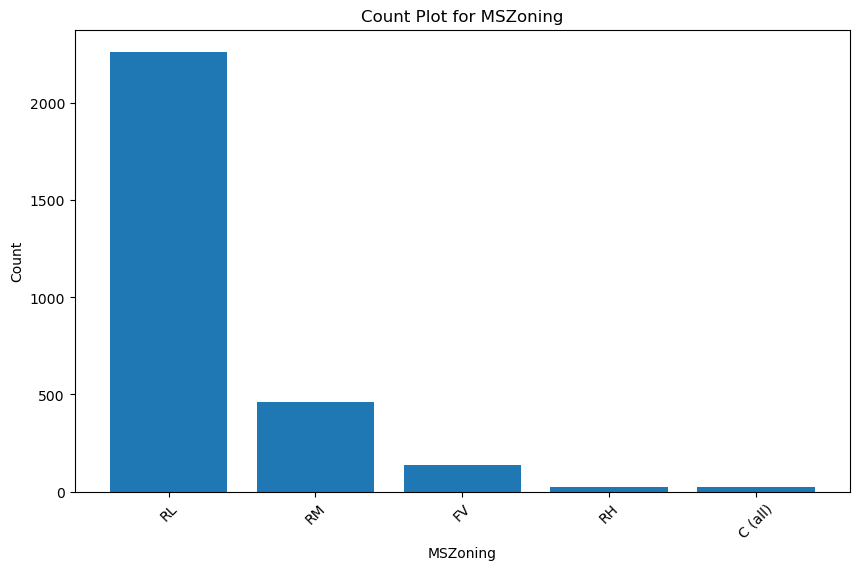


##################################################
################# Street Details #################
        Street  Ratio (%)
Street                   
Pave      2907    99.5889
Grvl        12     0.4111

Street has 2 unique values.
##################################################



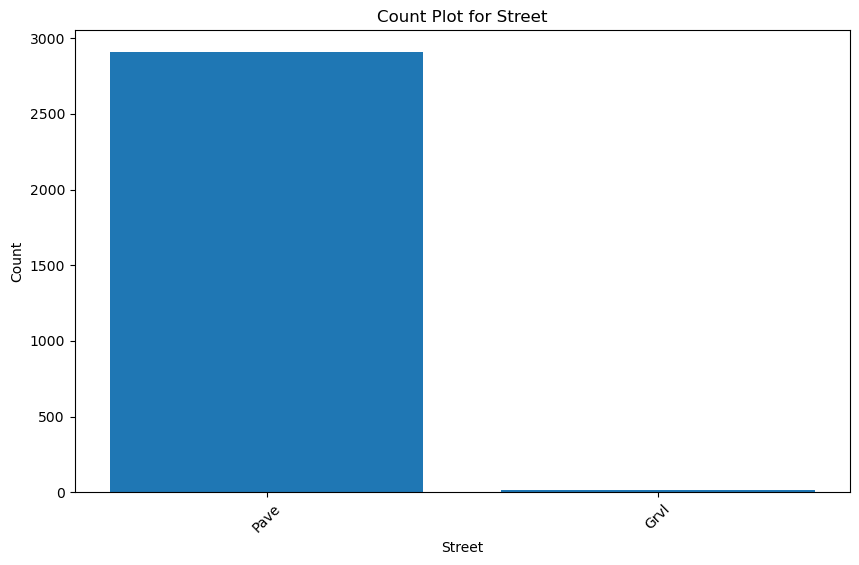


##################################################
################# Alley Details ##################
       Alley  Ratio (%)
Alley                  
Grvl     120   4.110997
Pave      78   2.672148

Alley has 2 unique values.
##################################################



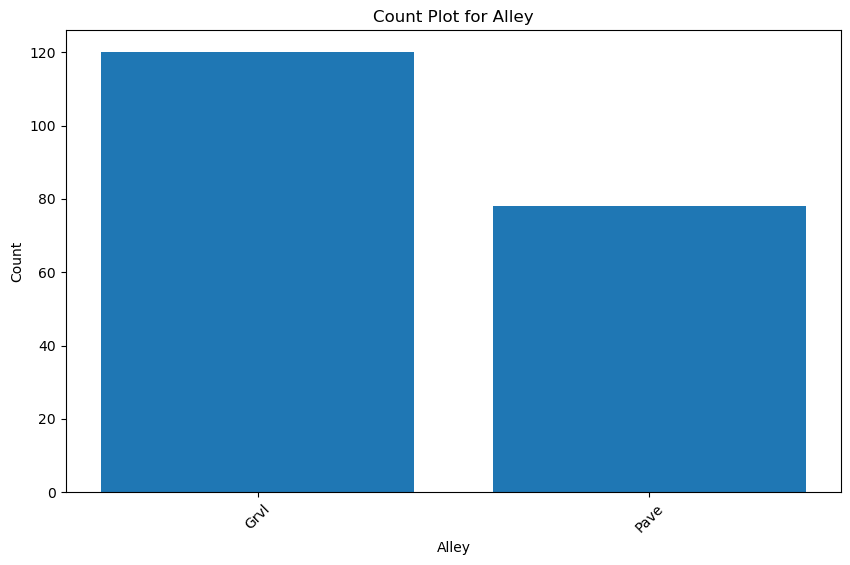


##################################################
################ LotShape Details ################
          LotShape  Ratio (%)
LotShape                     
Reg           1859  63.686194
IR1            968  33.162042
IR2             76   2.603631
IR3             16   0.548133

LotShape has 4 unique values.
##################################################



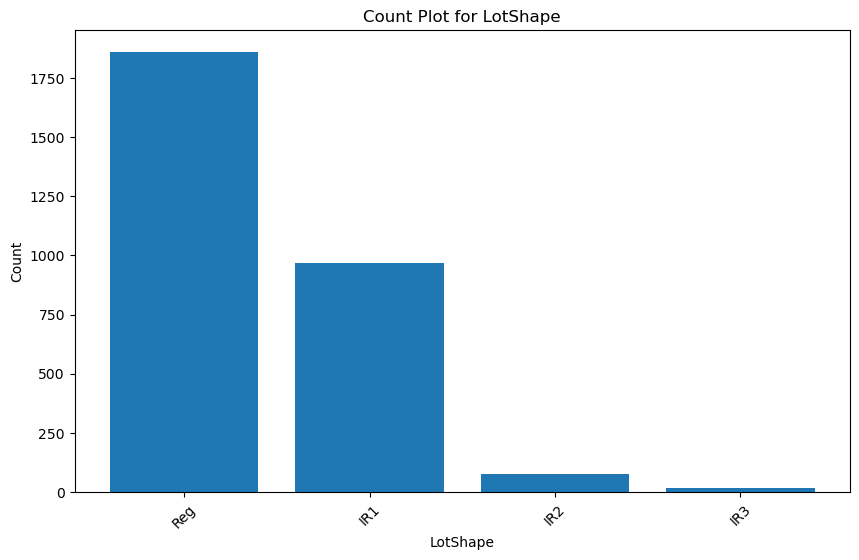


##################################################
############## LandContour Details ###############
             LandContour  Ratio (%)
LandContour                        
Lvl                 2622  89.825283
HLS                  120   4.110997
Bnk                  117   4.008222
Low                   60   2.055498

LandContour has 4 unique values.
##################################################



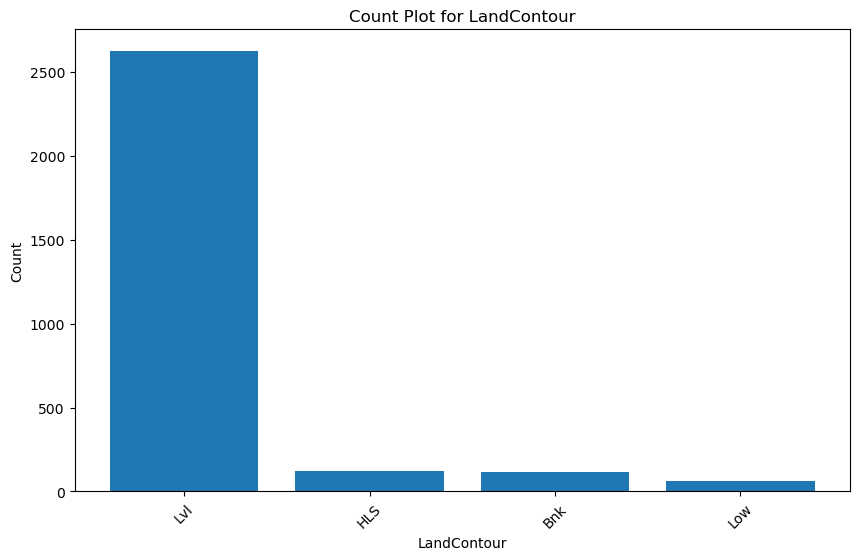


##################################################
############### Utilities Details ################
           Utilities  Ratio (%)
Utilities                      
AllPub          2916  99.897225
NoSeWa             1   0.034258

Utilities has 2 unique values.
##################################################



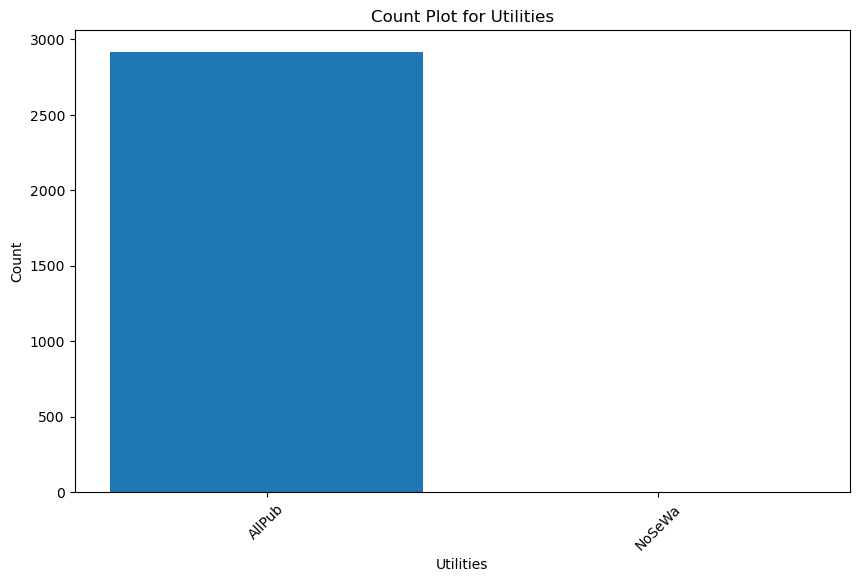


##################################################
############### LotConfig Details ################
           LotConfig  Ratio (%)
LotConfig                      
Inside          2133  73.072970
Corner           511  17.505995
CulDSac          176   6.029462
FR2               85   2.911956
FR3               14   0.479616

LotConfig has 5 unique values.
##################################################



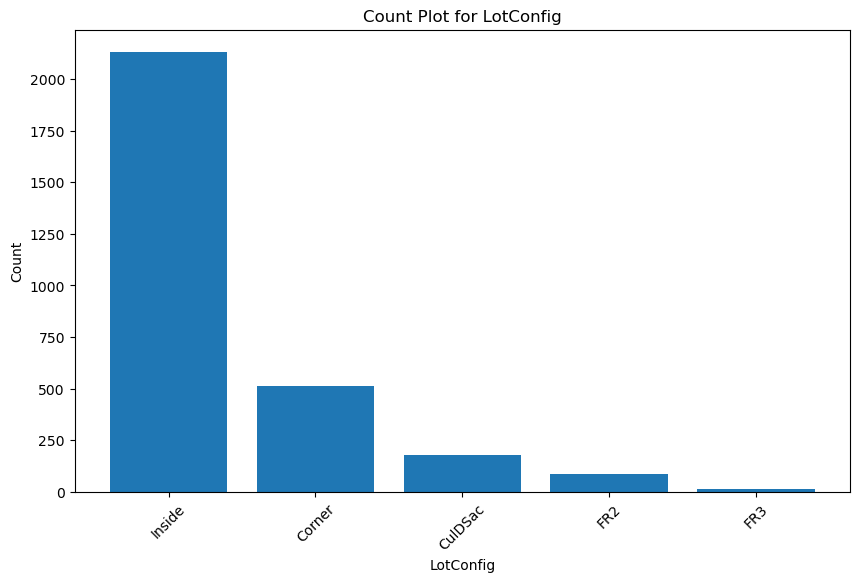


##################################################
############### LandSlope Details ################
           LandSlope  Ratio (%)
LandSlope                      
Gtl             2778  95.169579
Mod              125   4.282288
Sev               16   0.548133

LandSlope has 3 unique values.
##################################################



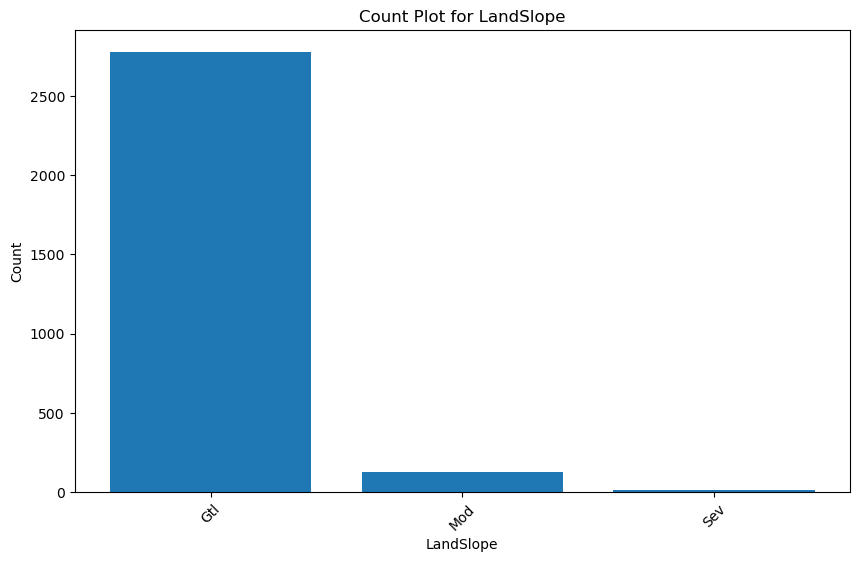


##################################################
############### Condition1 Details ###############
            Condition1  Ratio (%)
Condition1                       
Norm              2511  86.022610
Feedr              164   5.618362
Artery              92   3.151764
RRAn                50   1.712915
PosN                39   1.336074
RRAe                28   0.959233
PosA                20   0.685166
RRNn                 9   0.308325
RRNe                 6   0.205550

Condition1 has 9 unique values.
##################################################



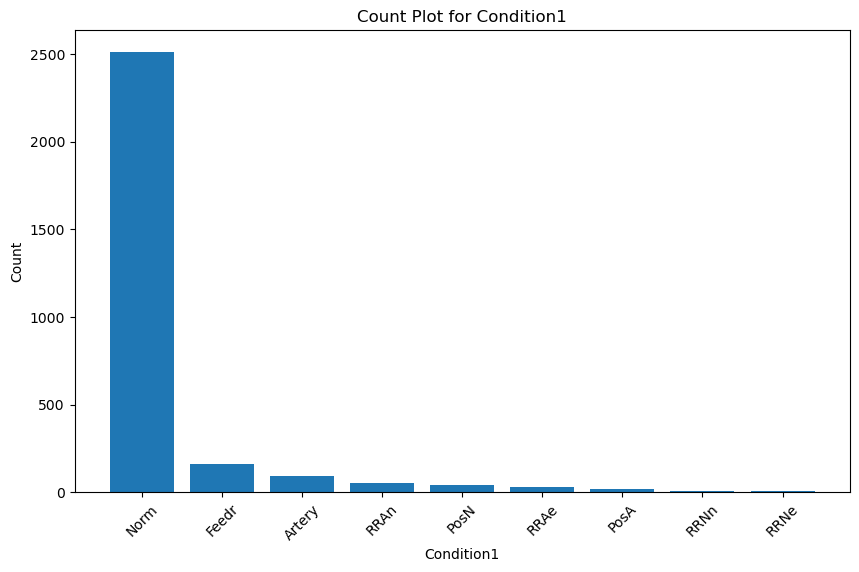


##################################################
############### Condition2 Details ###############
            Condition2  Ratio (%)
Condition2                       
Norm              2889  98.972251
Feedr               13   0.445358
Artery               5   0.171292
PosN                 4   0.137033
PosA                 4   0.137033
RRNn                 2   0.068517
RRAn                 1   0.034258
RRAe                 1   0.034258

Condition2 has 8 unique values.
##################################################



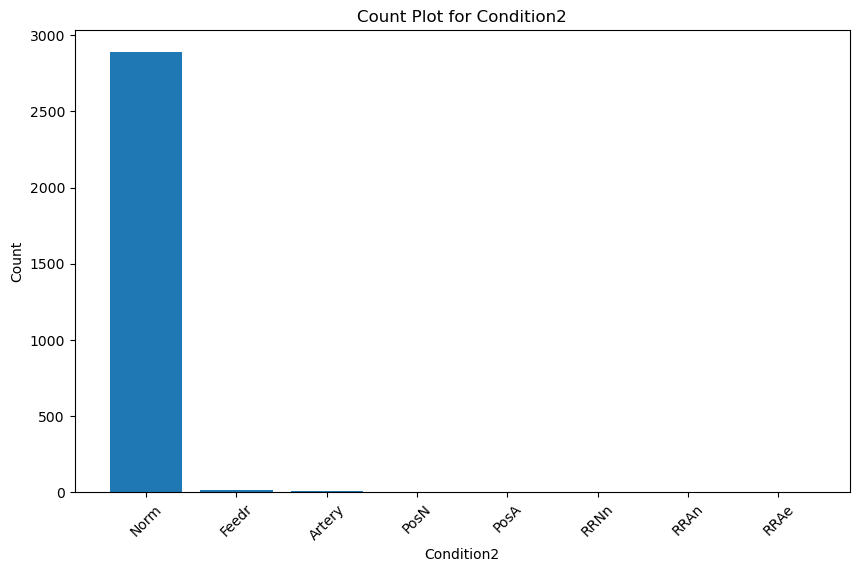


##################################################
################ BldgType Details ################
          BldgType  Ratio (%)
BldgType                     
1Fam          2425  83.076396
TwnhsE         227   7.776636
Duplex         109   3.734156
Twnhs           96   3.288798
2fmCon          62   2.124015

BldgType has 5 unique values.
##################################################



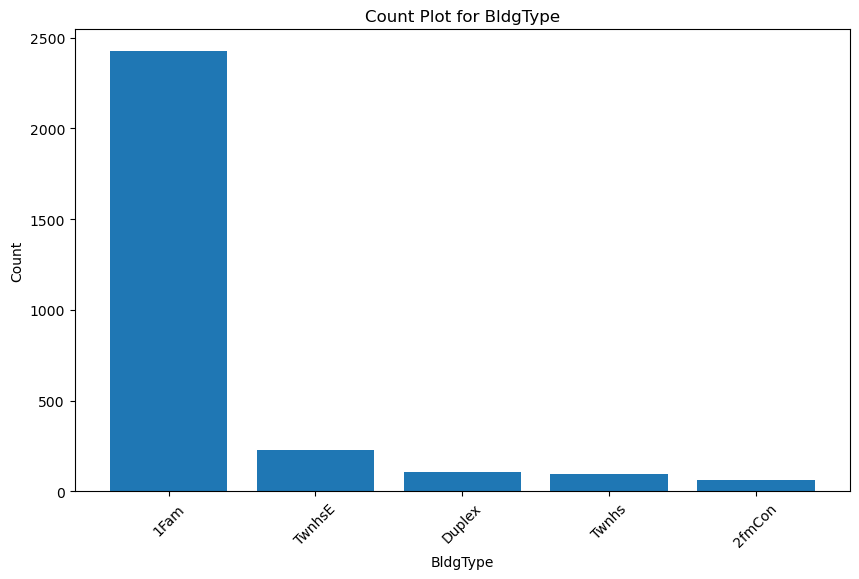


##################################################
############### HouseStyle Details ###############
            HouseStyle  Ratio (%)
HouseStyle                       
1Story            1471  50.393971
2Story             872  29.873244
1.5Fin             314  10.757109
SLvl               128   4.385063
SFoyer              83   2.843440
2.5Unf              24   0.822199
1.5Unf              19   0.650908
2.5Fin               8   0.274066

HouseStyle has 8 unique values.
##################################################



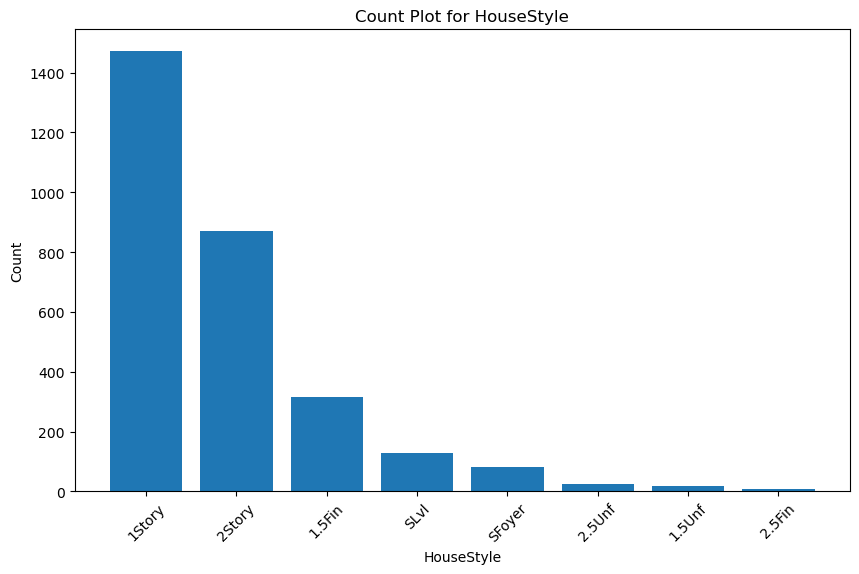


##################################################
############### RoofStyle Details ################
           RoofStyle  Ratio (%)
RoofStyle                      
Gable           2310  79.136691
Hip              551  18.876328
Gambrel           22   0.753683
Flat              20   0.685166
Mansard           11   0.376841
Shed               5   0.171292

RoofStyle has 6 unique values.
##################################################



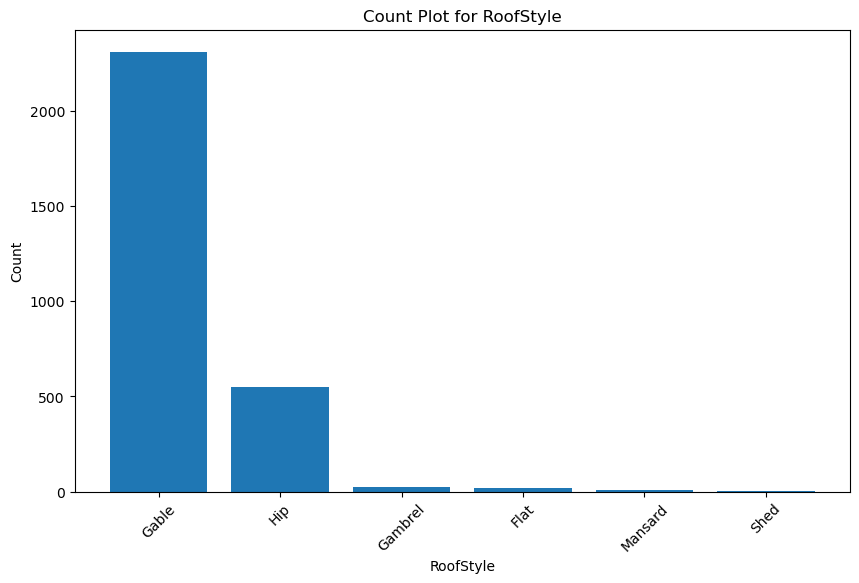


##################################################
################ RoofMatl Details ################
          RoofMatl  Ratio (%)
RoofMatl                     
CompShg       2876  98.526893
Tar&Grv         23   0.787941
WdShake          9   0.308325
WdShngl          7   0.239808
Metal            1   0.034258
Membran          1   0.034258
Roll             1   0.034258
ClyTile          1   0.034258

RoofMatl has 8 unique values.
##################################################



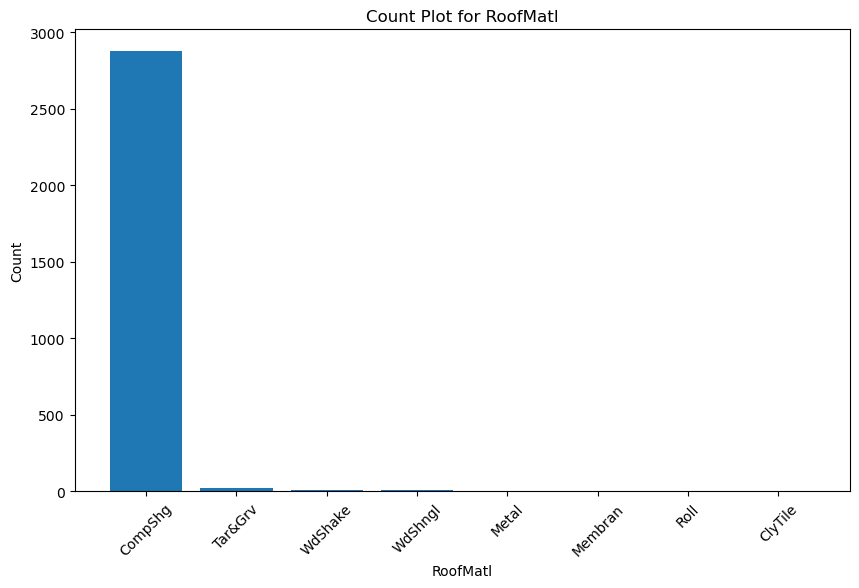


##################################################
############## Exterior1st Details ###############
             Exterior1st  Ratio (%)
Exterior1st                        
VinylSd             1025  35.114765
MetalSd              450  15.416238
HdBoard              442  15.142172
Wd Sdng              411  14.080164
Plywood              221   7.571086
CemntBd              126   4.316547
BrkFace               87   2.980473
WdShing               56   1.918465
AsbShng               44   1.507366
Stucco                43   1.473107
BrkComm                6   0.205550
AsphShn                2   0.068517
Stone                  2   0.068517
CBlock                 2   0.068517
ImStucc                1   0.034258

Exterior1st has 15 unique values.
##################################################



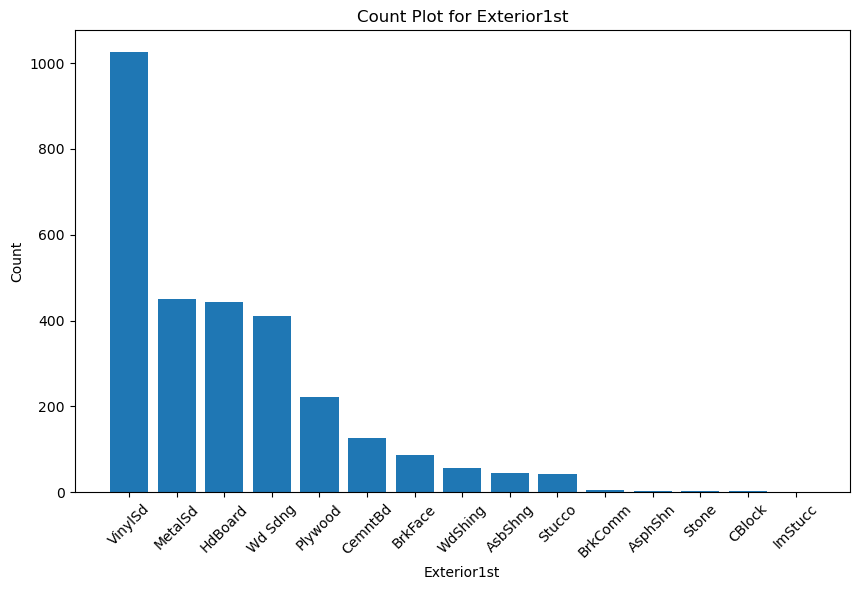


##################################################
############## Exterior2nd Details ###############
             Exterior2nd  Ratio (%)
Exterior2nd                        
VinylSd             1014  34.737924
MetalSd              447  15.313464
HdBoard              406  13.908873
Wd Sdng              391  13.394998
Plywood              270   9.249743
CmentBd              126   4.316547
Wd Shng               81   2.774923
BrkFace               47   1.610140
Stucco                47   1.610140
AsbShng               38   1.301816
Brk Cmn               22   0.753683
ImStucc               15   0.513875
Stone                  6   0.205550
AsphShn                4   0.137033
CBlock                 3   0.102775
Other                  1   0.034258

Exterior2nd has 16 unique values.
##################################################



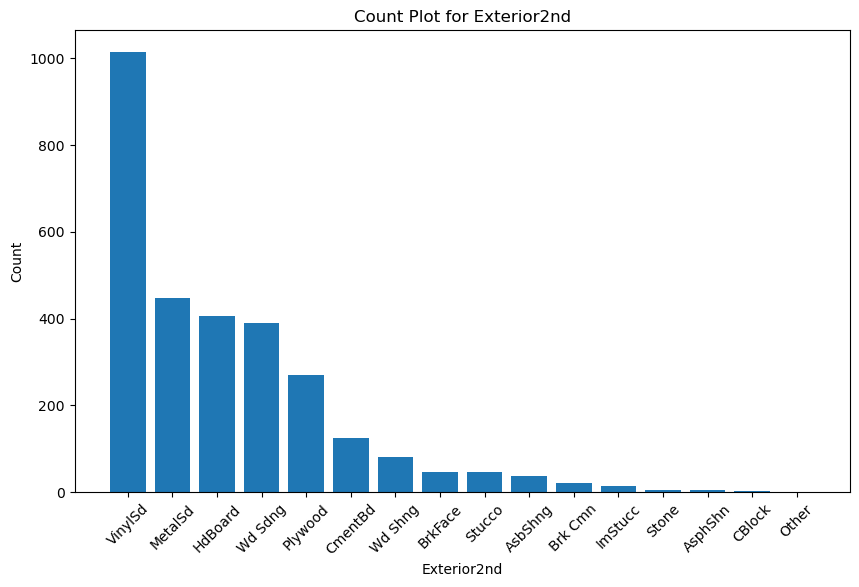


##################################################
############### MasVnrType Details ###############
            MasVnrType  Ratio (%)
MasVnrType                       
BrkFace            879  30.113052
Stone              249   8.530319
BrkCmn              25   0.856458

MasVnrType has 3 unique values.
##################################################



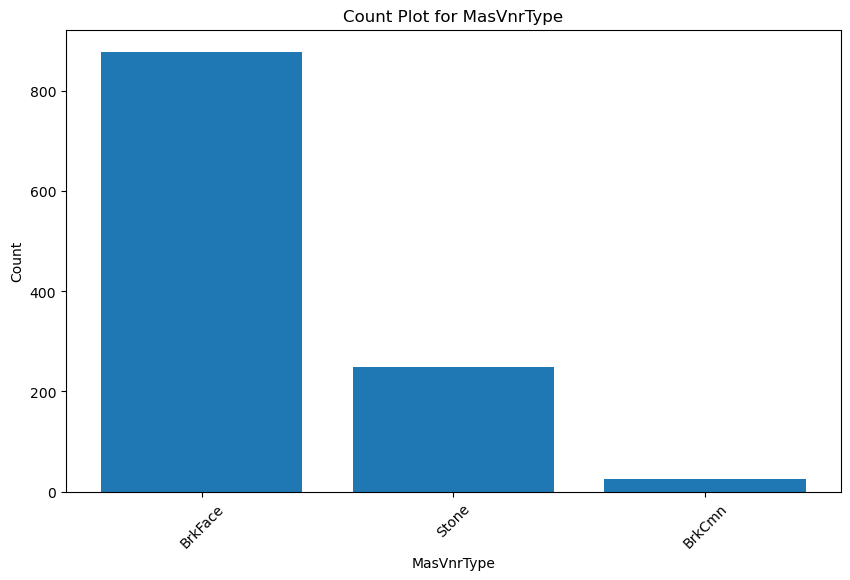


##################################################
############### ExterQual Details ################
           ExterQual  Ratio (%)
ExterQual                      
TA              1798  61.596437
Gd               979  33.538883
Ex               107   3.665639
Fa                35   1.199041

ExterQual has 4 unique values.
##################################################



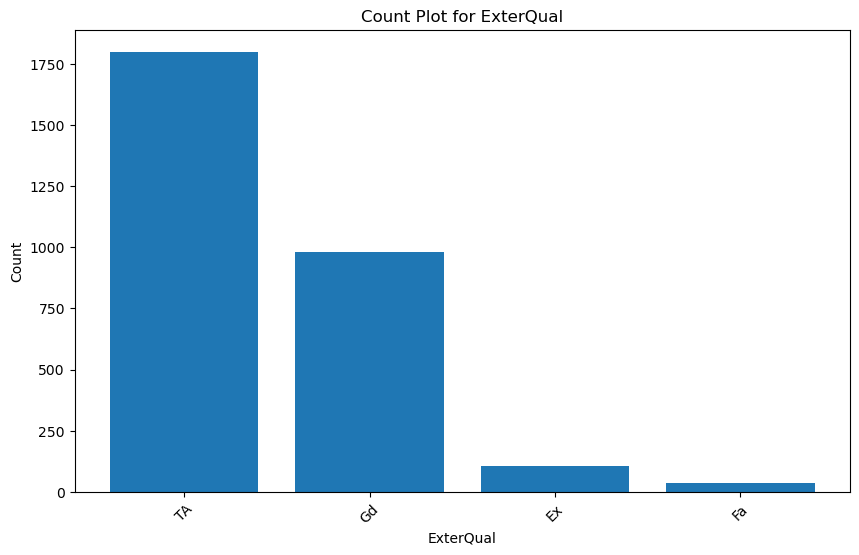


##################################################
############### ExterCond Details ################
           ExterCond  Ratio (%)
ExterCond                      
TA              2538  86.947585
Gd               299  10.243234
Fa                67   2.295307
Ex                12   0.411100
Po                 3   0.102775

ExterCond has 5 unique values.
##################################################



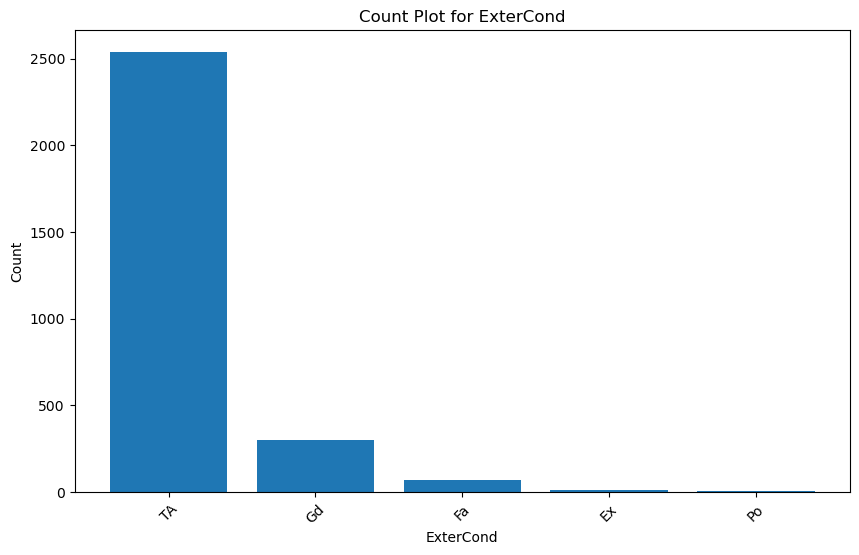


##################################################
############### Foundation Details ###############
            Foundation  Ratio (%)
Foundation                       
PConc             1308  44.809866
CBlock            1235  42.309010
BrkTil             311  10.654334
Slab                49   1.678657
Stone               11   0.376841
Wood                 5   0.171292

Foundation has 6 unique values.
##################################################



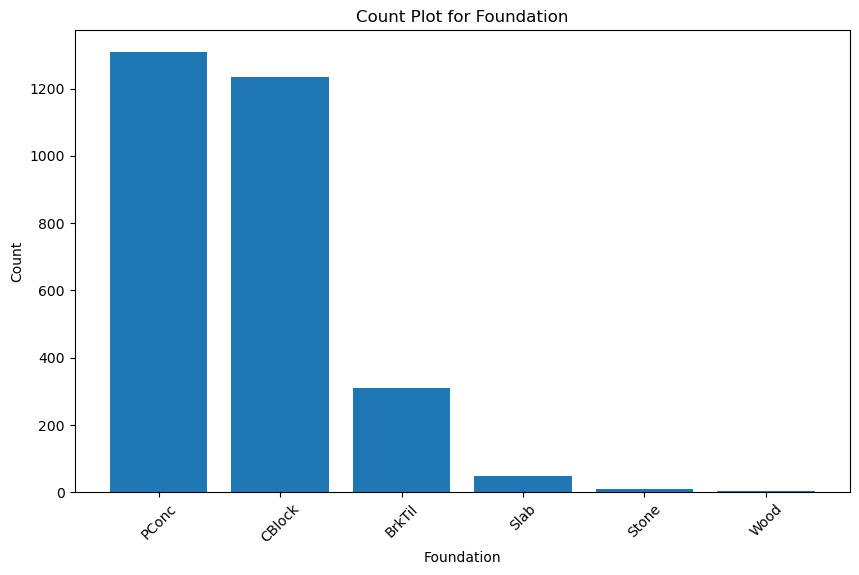


##################################################
################ BsmtQual Details ################
          BsmtQual  Ratio (%)
BsmtQual                     
TA            1283  43.953409
Gd            1209  41.418294
Ex             258   8.838643
Fa              88   3.014731

BsmtQual has 4 unique values.
##################################################



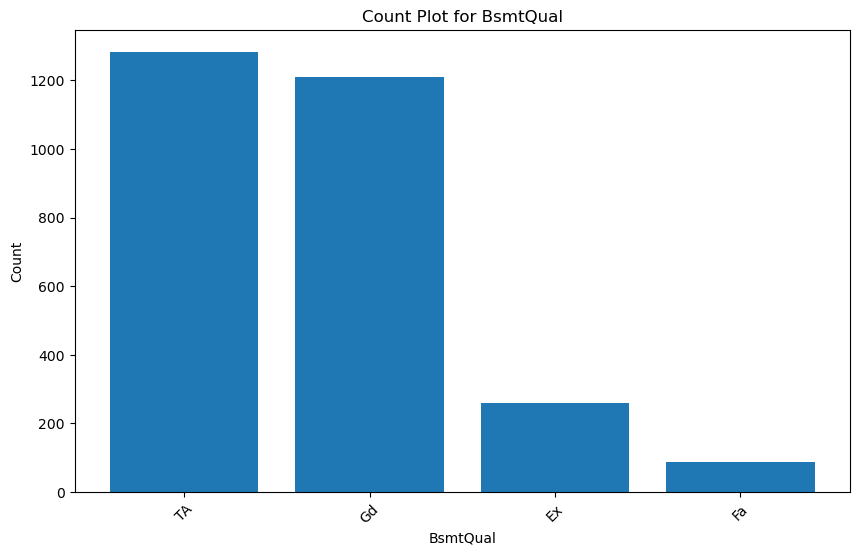


##################################################
################ BsmtCond Details ################
          BsmtCond  Ratio (%)
BsmtCond                     
TA            2606  89.277150
Gd             122   4.179514
Fa             104   3.562864
Po               5   0.171292

BsmtCond has 4 unique values.
##################################################



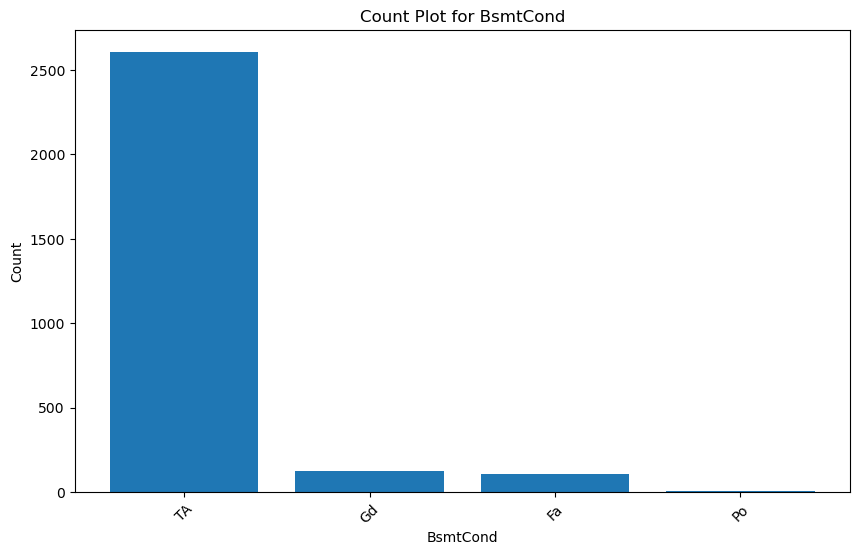


##################################################
############## BsmtExposure Details ##############
              BsmtExposure  Ratio (%)
BsmtExposure                         
No                    1904  65.227818
Av                     418  14.319973
Gd                     276   9.455293
Mn                     239   8.187736

BsmtExposure has 4 unique values.
##################################################



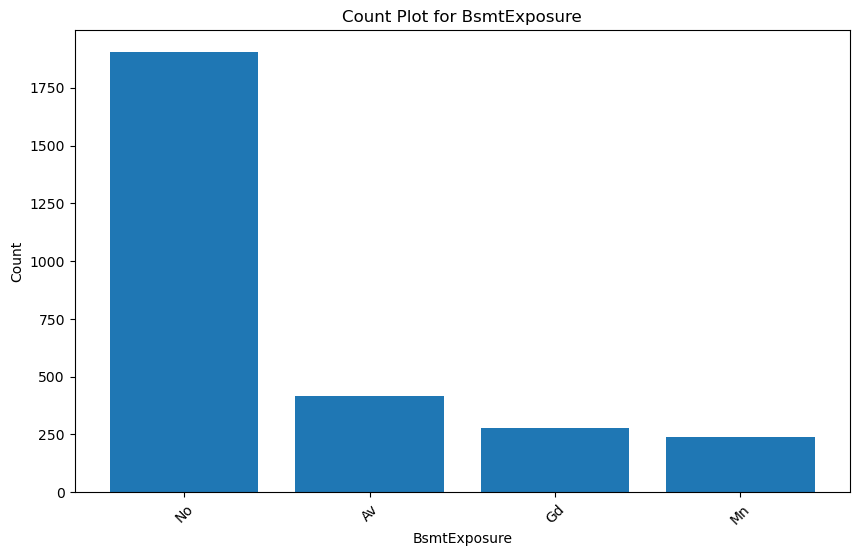


##################################################
############## BsmtFinType1 Details ##############
              BsmtFinType1  Ratio (%)
BsmtFinType1                         
Unf                    851  29.153820
GLQ                    849  29.085303
ALQ                    429  14.696814
Rec                    288   9.866393
BLQ                    269   9.215485
LwQ                    154   5.275779

BsmtFinType1 has 6 unique values.
##################################################



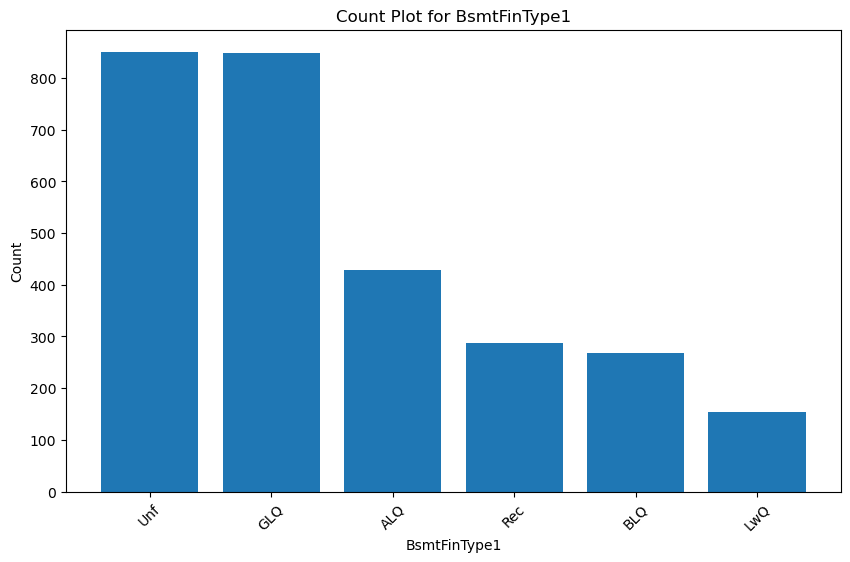


##################################################
############## BsmtFinType2 Details ##############
              BsmtFinType2  Ratio (%)
BsmtFinType2                         
Unf                   2493  85.405961
Rec                    105   3.597122
LwQ                     87   2.980473
BLQ                     68   2.329565
ALQ                     52   1.781432
GLQ                     34   1.164782

BsmtFinType2 has 6 unique values.
##################################################



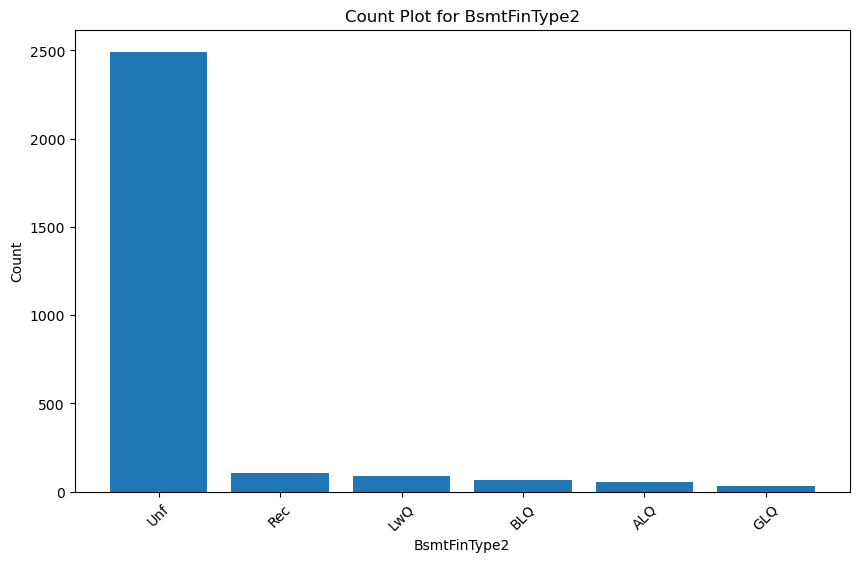


##################################################
################ Heating Details #################
         Heating  Ratio (%)
Heating                    
GasA        2874  98.458376
GasW          27   0.924974
Grav           9   0.308325
Wall           6   0.205550
OthW           2   0.068517
Floor          1   0.034258

Heating has 6 unique values.
##################################################



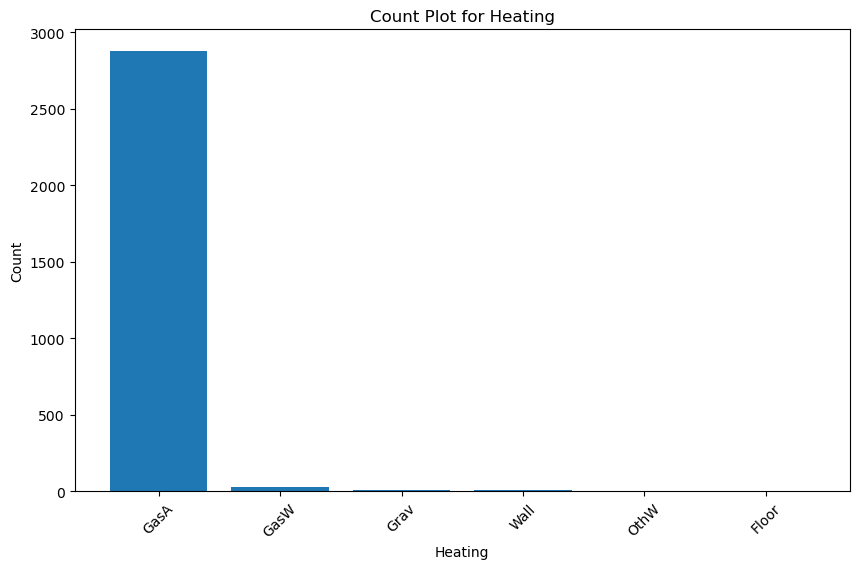


##################################################
############### HeatingQC Details ################
           HeatingQC  Ratio (%)
HeatingQC                      
Ex              1493  51.147653
TA               857  29.359370
Gd               474  16.238438
Fa                92   3.151764
Po                 3   0.102775

HeatingQC has 5 unique values.
##################################################



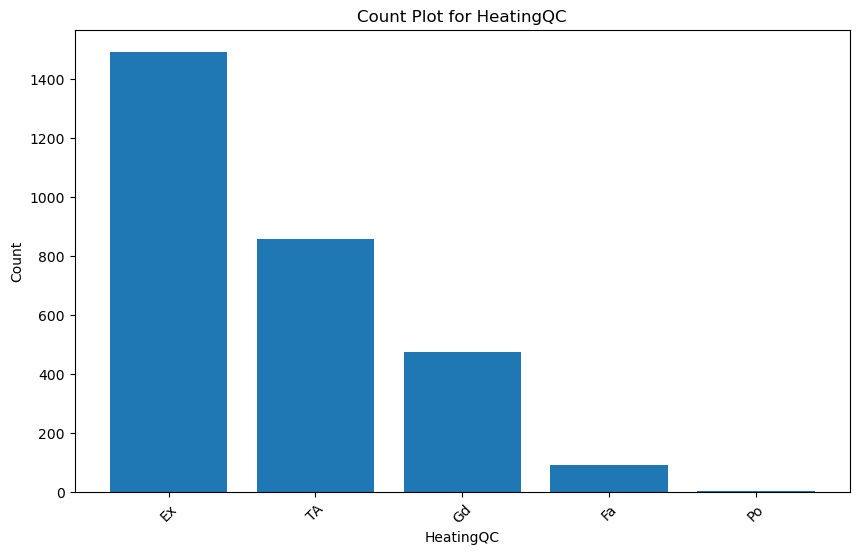


##################################################
############### CentralAir Details ###############
            CentralAir  Ratio (%)
CentralAir                       
Y                 2723  93.285372
N                  196   6.714628

CentralAir has 2 unique values.
##################################################



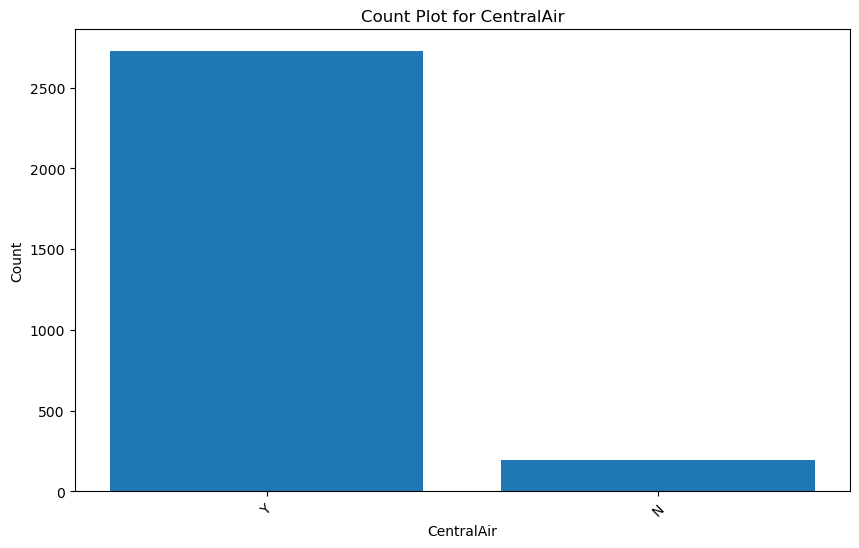


##################################################
############### Electrical Details ###############
            Electrical  Ratio (%)
Electrical                       
SBrkr             2671  91.503940
FuseA              188   6.440562
FuseF               50   1.712915
FuseP                8   0.274066
Mix                  1   0.034258

Electrical has 5 unique values.
##################################################



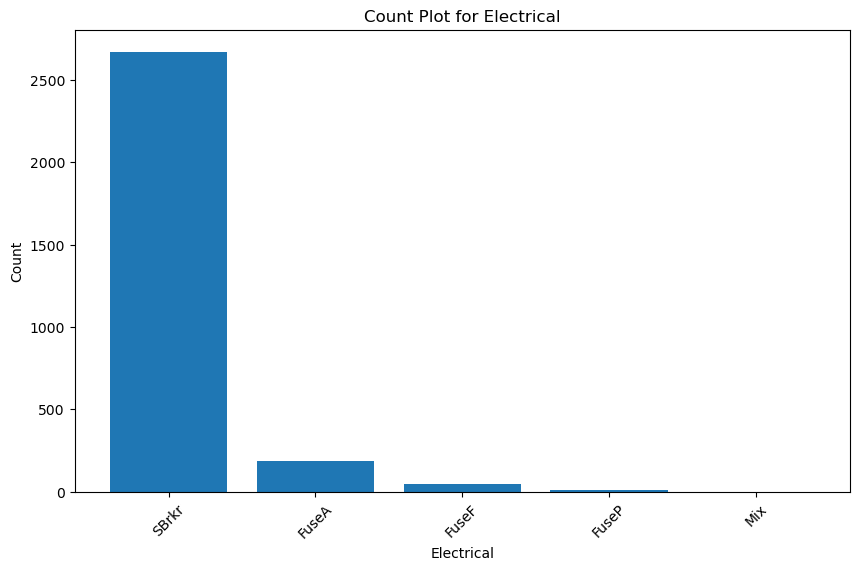


##################################################
############## KitchenQual Details ###############
             KitchenQual  Ratio (%)
KitchenQual                        
TA                  1492  51.113395
Gd                  1151  39.431312
Ex                   205   7.022953
Fa                    70   2.398082

KitchenQual has 4 unique values.
##################################################



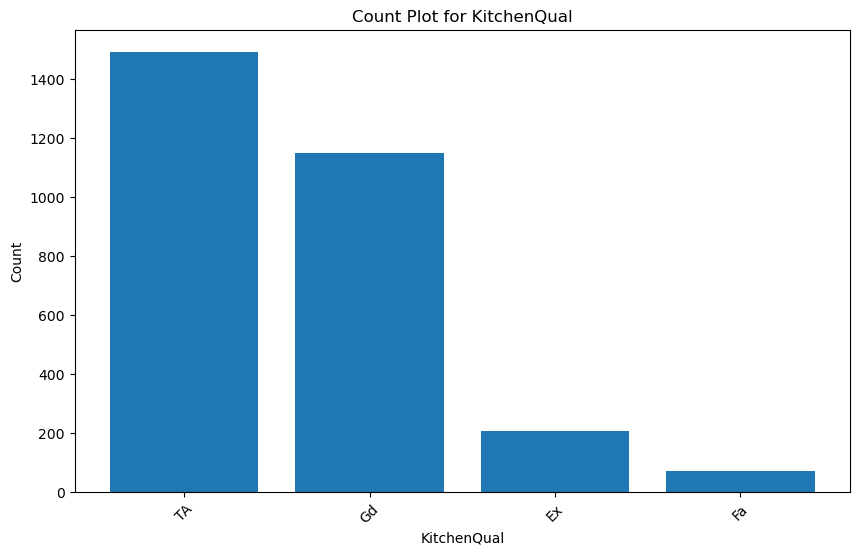


##################################################
############### Functional Details ###############
            Functional  Ratio (%)
Functional                       
Typ               2717  93.079822
Min2                70   2.398082
Min1                65   2.226790
Mod                 35   1.199041
Maj1                19   0.650908
Maj2                 9   0.308325
Sev                  2   0.068517

Functional has 7 unique values.
##################################################



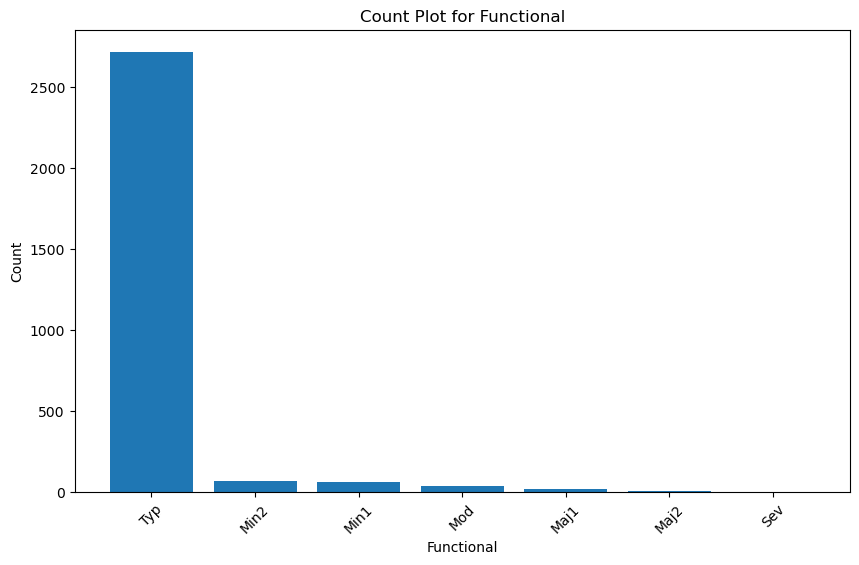


##################################################
############## FireplaceQu Details ###############
             FireplaceQu  Ratio (%)
FireplaceQu                        
Gd                   744  25.488181
TA                   592  20.280918
Fa                    74   2.535115
Po                    46   1.575882
Ex                    43   1.473107

FireplaceQu has 5 unique values.
##################################################



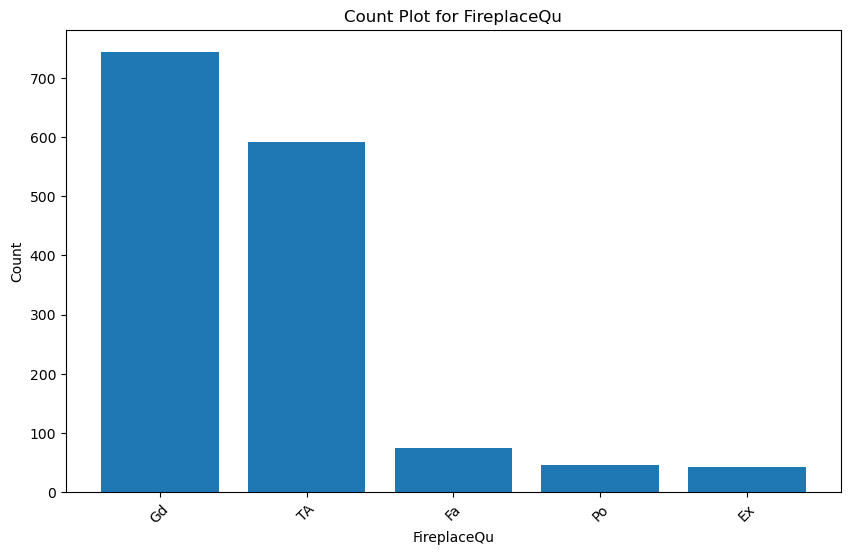


##################################################
############### GarageType Details ###############
            GarageType  Ratio (%)
GarageType                       
Attchd            1723  59.027064
Detchd             779  26.687222
BuiltIn            186   6.372045
Basment             36   1.233299
2Types              23   0.787941
CarPort             15   0.513875

GarageType has 6 unique values.
##################################################



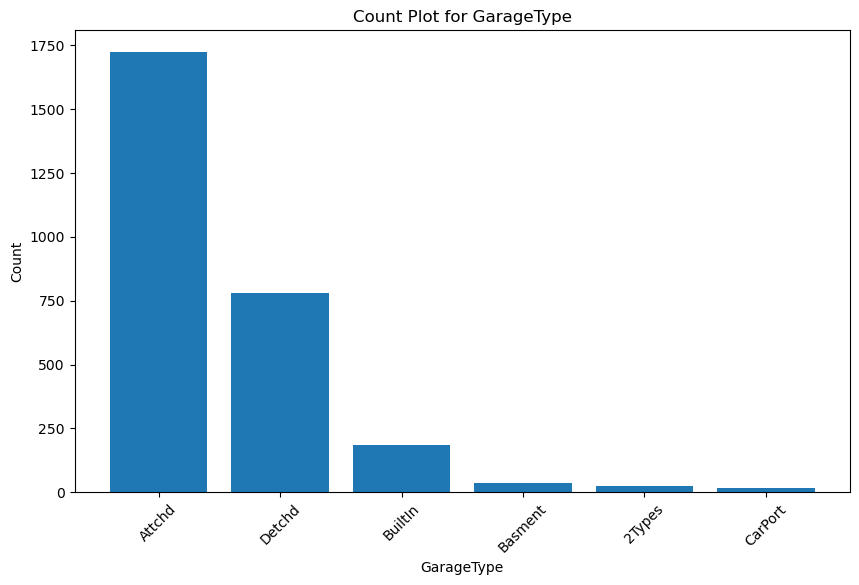


##################################################
############## GarageFinish Details ##############
              GarageFinish  Ratio (%)
GarageFinish                         
Unf                   1230  42.137718
RFn                    811  27.783487
Fin                    719  24.631723

GarageFinish has 3 unique values.
##################################################



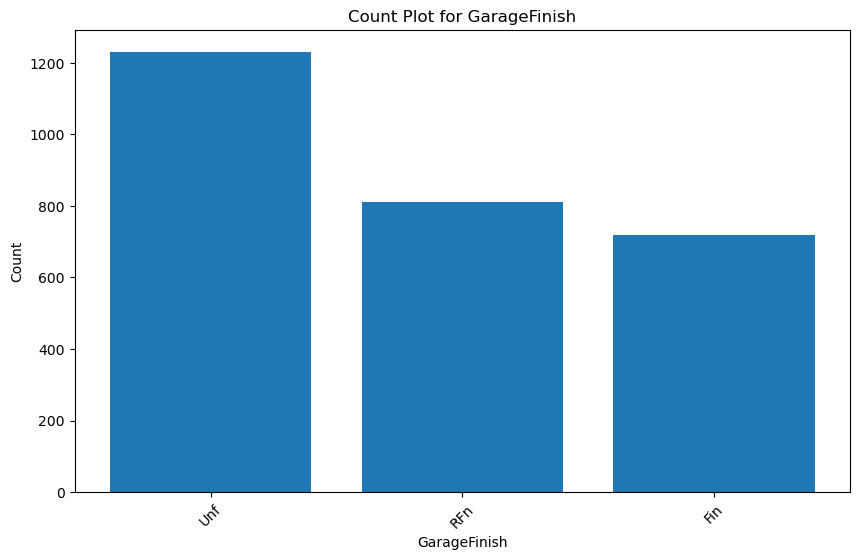


##################################################
############### GarageQual Details ###############
            GarageQual  Ratio (%)
GarageQual                       
TA                2604  89.208633
Fa                 124   4.248030
Gd                  24   0.822199
Po                   5   0.171292
Ex                   3   0.102775

GarageQual has 5 unique values.
##################################################



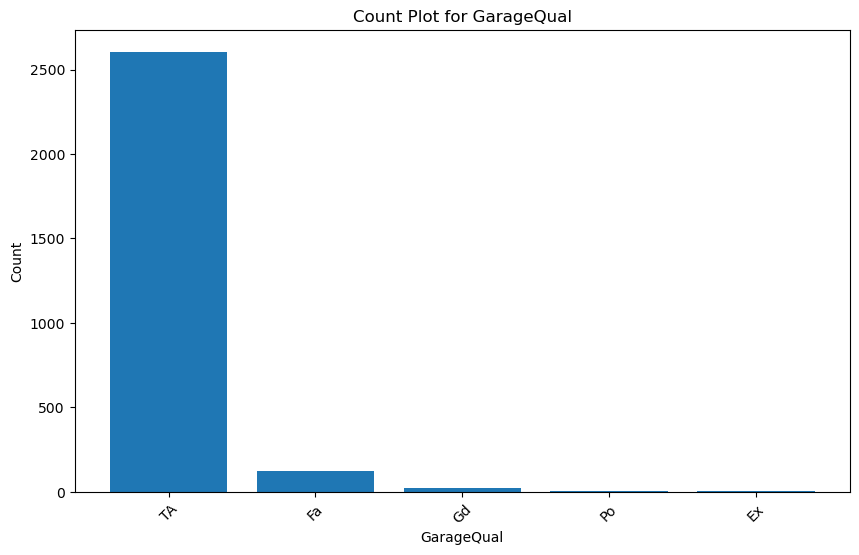


##################################################
############### GarageCond Details ###############
            GarageCond  Ratio (%)
GarageCond                       
TA                2654  90.921548
Fa                  74   2.535115
Gd                  15   0.513875
Po                  14   0.479616
Ex                   3   0.102775

GarageCond has 5 unique values.
##################################################



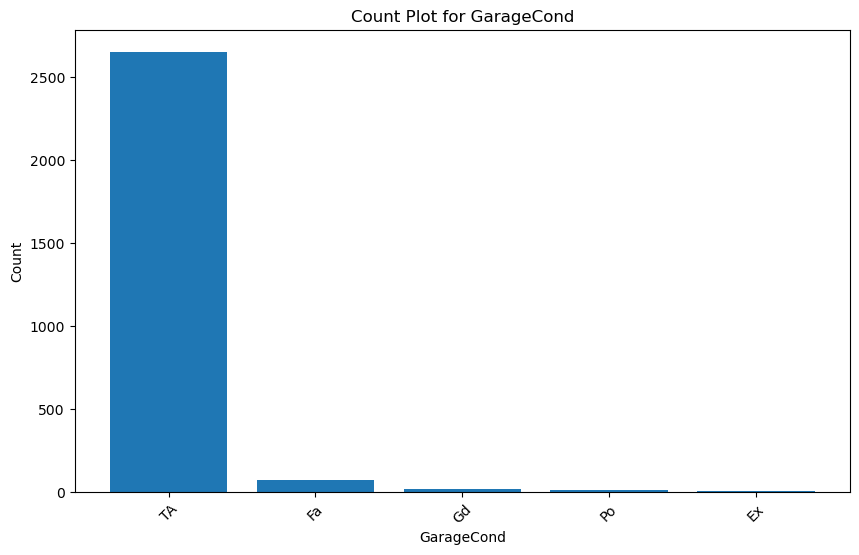


##################################################
############### PavedDrive Details ###############
            PavedDrive  Ratio (%)
PavedDrive                       
Y                 2641  90.476190
N                  216   7.399794
P                   62   2.124015

PavedDrive has 3 unique values.
##################################################



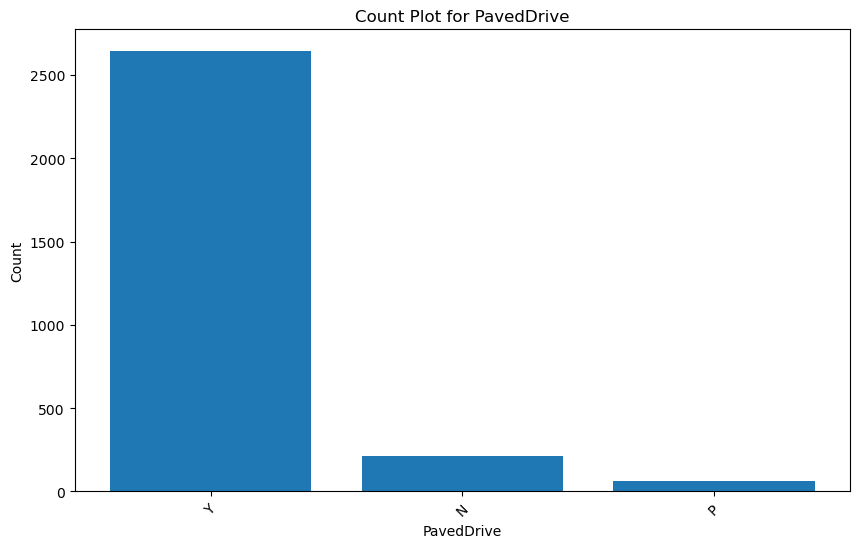


##################################################
################# PoolQC Details #################
        PoolQC  Ratio (%)
PoolQC                   
Ex           4   0.137033
Gd           4   0.137033
Fa           2   0.068517

PoolQC has 3 unique values.
##################################################



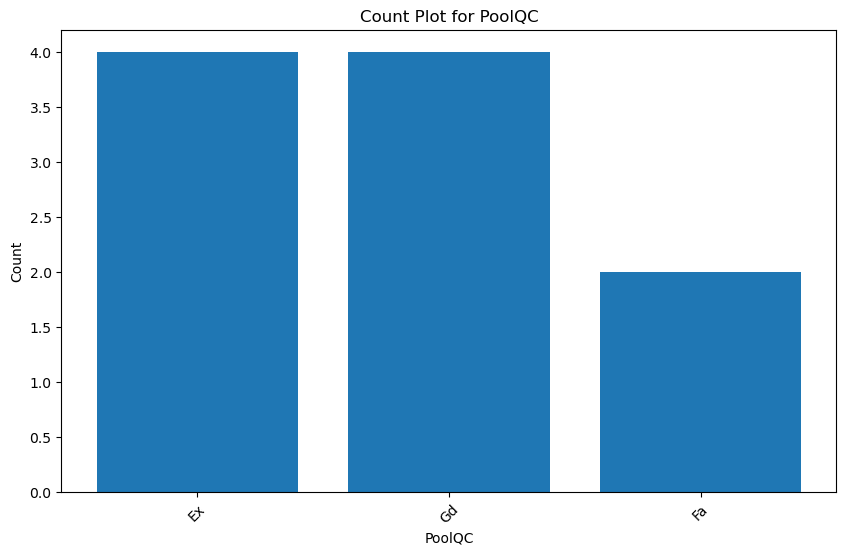


##################################################
################# Fence Details ##################
       Fence  Ratio (%)
Fence                  
MnPrv    329  11.270983
GdPrv    118   4.042480
GdWo     112   3.836930
MnWw      12   0.411100

Fence has 4 unique values.
##################################################



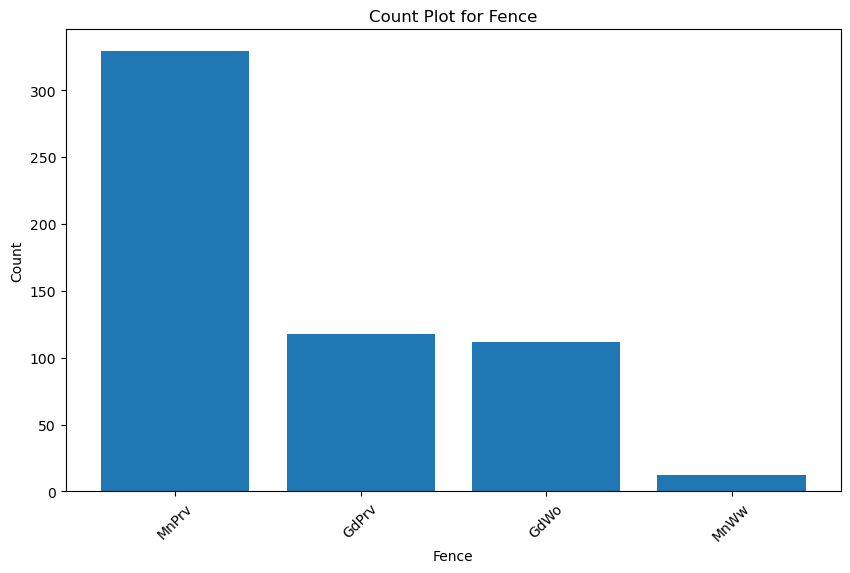


##################################################
############## MiscFeature Details ###############
             MiscFeature  Ratio (%)
MiscFeature                        
Shed                  95   3.254539
Gar2                   5   0.171292
Othr                   4   0.137033
TenC                   1   0.034258

MiscFeature has 4 unique values.
##################################################



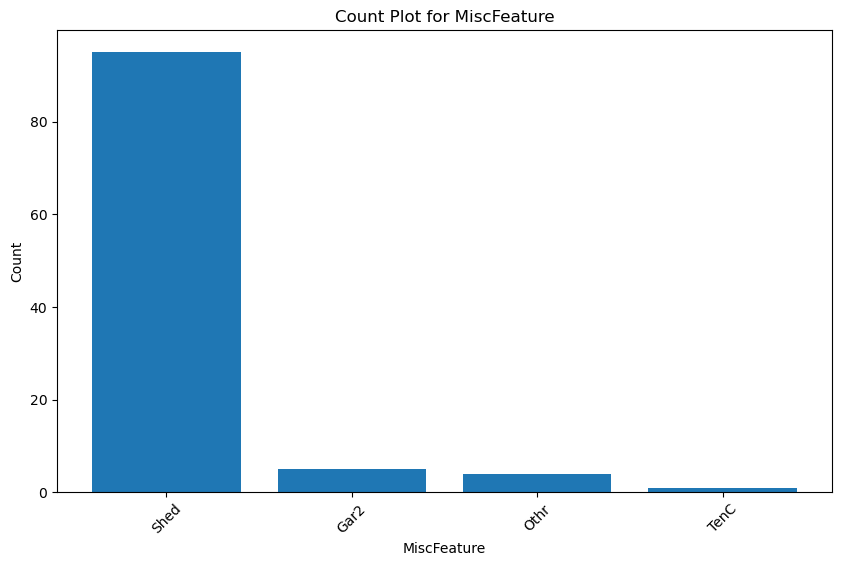


##################################################
################ SaleType Details ################
          SaleType  Ratio (%)
SaleType                     
WD            2525  86.502227
New            239   8.187736
COD             87   2.980473
ConLD           26   0.890716
CWD             12   0.411100
ConLI            9   0.308325
ConLw            8   0.274066
Oth              7   0.239808
Con              5   0.171292

SaleType has 9 unique values.
##################################################



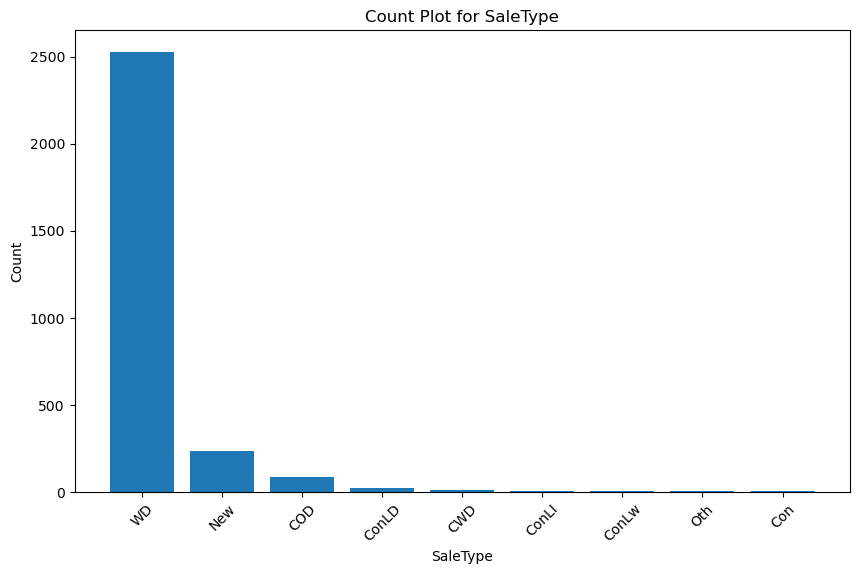


##################################################
############# SaleCondition Details ##############
               SaleCondition  Ratio (%)
SaleCondition                          
Normal                  2402  82.288455
Partial                  245   8.393285
Abnorml                  190   6.509078
Family                    46   1.575882
Alloca                    24   0.822199
AdjLand                   12   0.411100

SaleCondition has 6 unique values.
##################################################



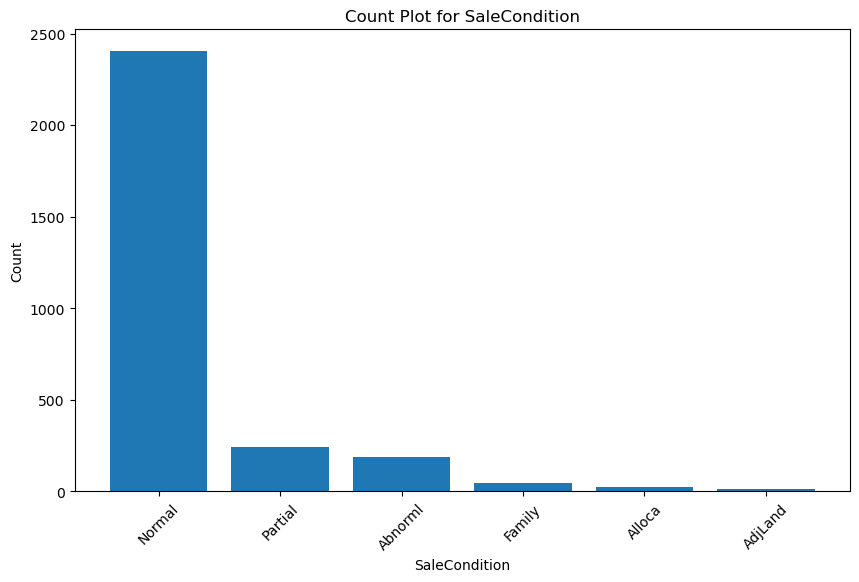


##################################################
############## OverallCond Details ###############
             OverallCond  Ratio (%)
OverallCond                        
5                   1645  56.354916
6                    531  18.191161
7                    390  13.360740
8                    144   4.933196
4                    101   3.460089
3                     50   1.712915
9                     41   1.404591
2                     10   0.342583
1                      7   0.239808

OverallCond has 9 unique values.
##################################################



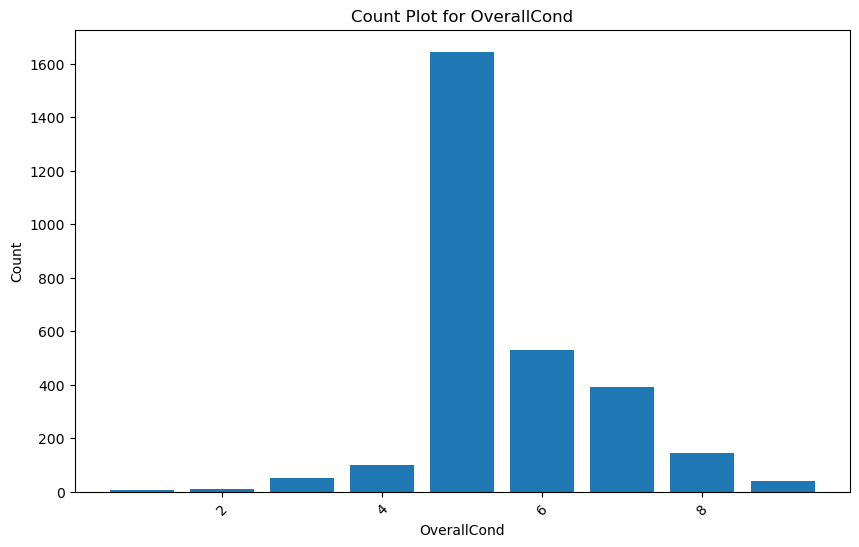


##################################################
############## BsmtFullBath Details ##############
              BsmtFullBath  Ratio (%)
BsmtFullBath                         
0.0                   1705  58.410415
1.0                   1172  40.150737
2.0                     38   1.301816
3.0                      2   0.068517

BsmtFullBath has 4 unique values.
##################################################



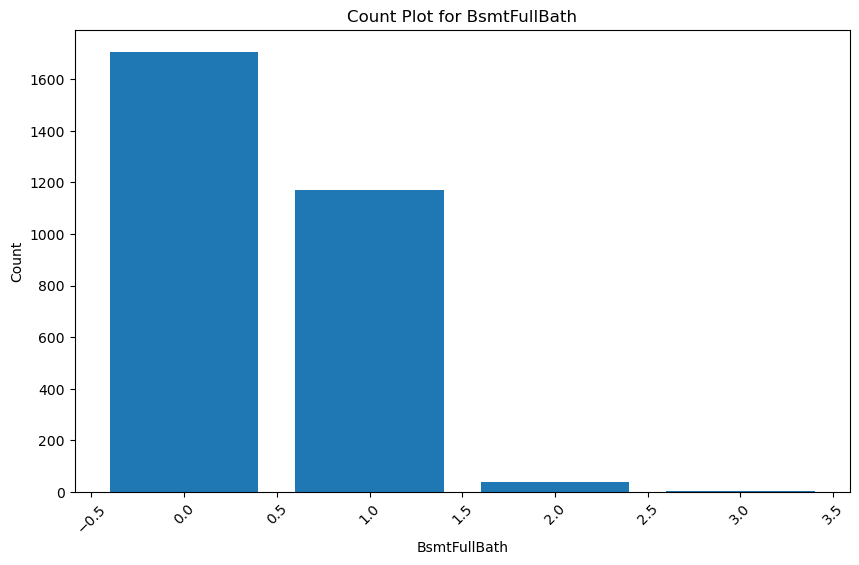


##################################################
############## BsmtHalfBath Details ##############
              BsmtHalfBath  Ratio (%)
BsmtHalfBath                         
0.0                   2742  93.936280
1.0                    171   5.858171
2.0                      4   0.137033

BsmtHalfBath has 3 unique values.
##################################################



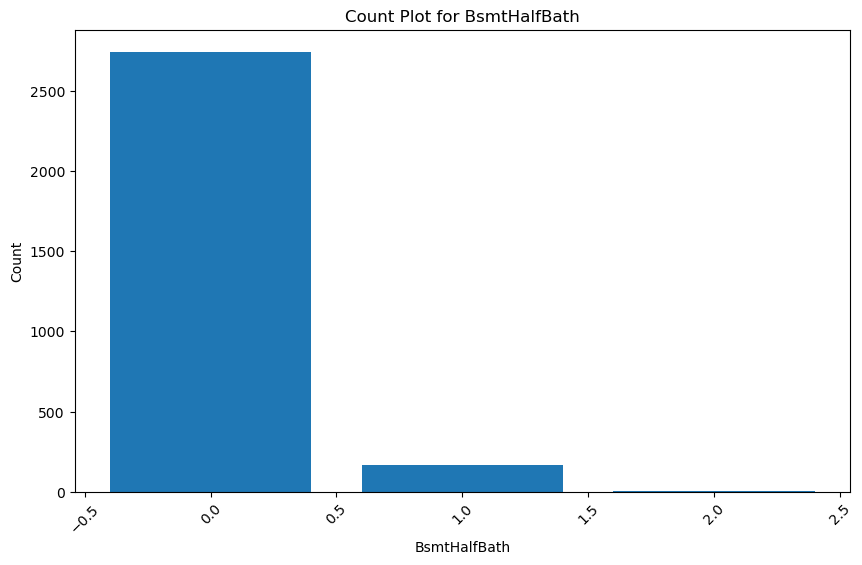


##################################################
################ FullBath Details ################
          FullBath  Ratio (%)
FullBath                     
2             1530  52.415211
1             1309  44.844125
3               64   2.192532
0               12   0.411100
4                4   0.137033

FullBath has 5 unique values.
##################################################



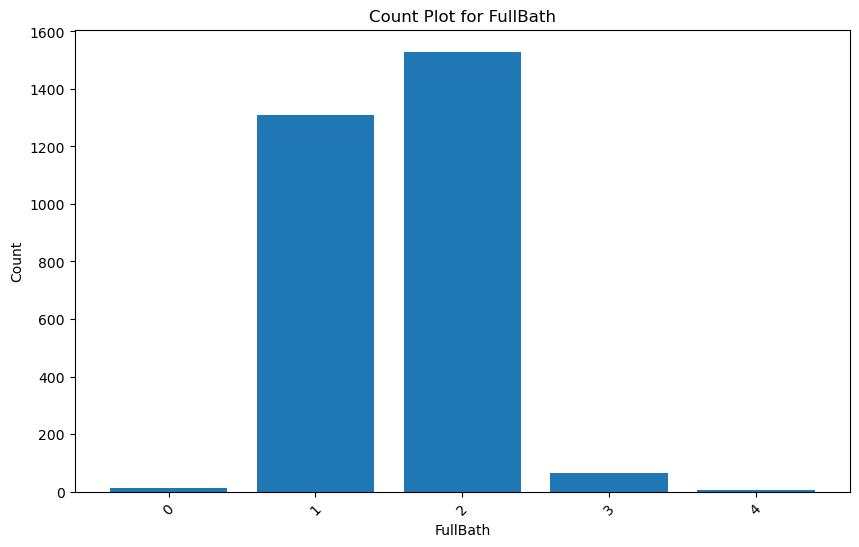


##################################################
################ HalfBath Details ################
          HalfBath  Ratio (%)
HalfBath                     
0             1834  62.829736
1             1060  36.313806
2               25   0.856458

HalfBath has 3 unique values.
##################################################



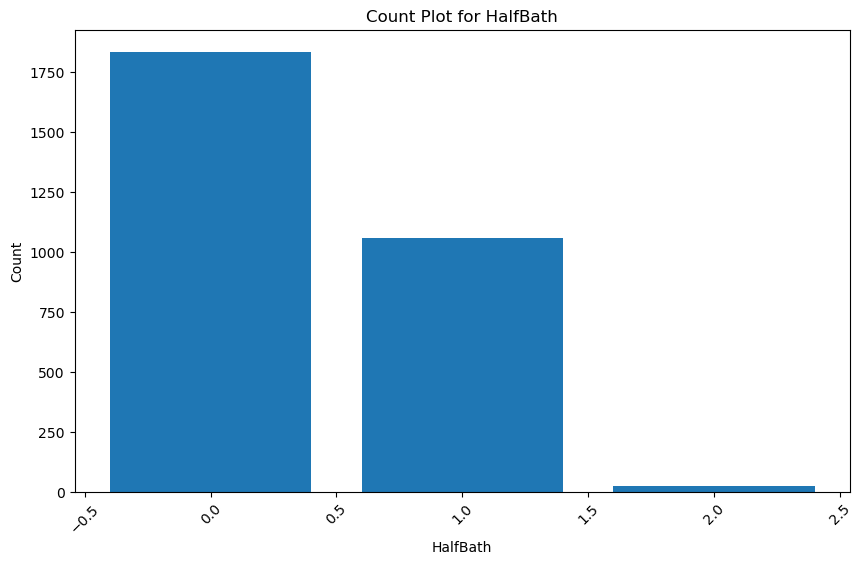


##################################################
############## BedroomAbvGr Details ##############
              BedroomAbvGr  Ratio (%)
BedroomAbvGr                         
3                     1596  54.676259
2                      742  25.419664
4                      400  13.703323
1                      103   3.528606
5                       48   1.644399
6                       21   0.719424
0                        8   0.274066
8                        1   0.034258

BedroomAbvGr has 8 unique values.
##################################################



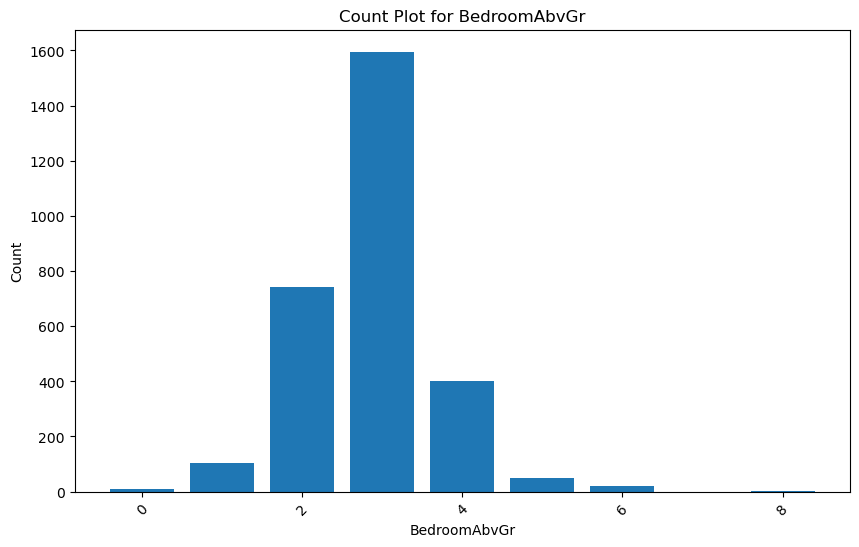


##################################################
############## KitchenAbvGr Details ##############
              KitchenAbvGr  Ratio (%)
KitchenAbvGr                         
1                     2785  95.409387
2                      129   4.419322
0                        3   0.102775
3                        2   0.068517

KitchenAbvGr has 4 unique values.
##################################################



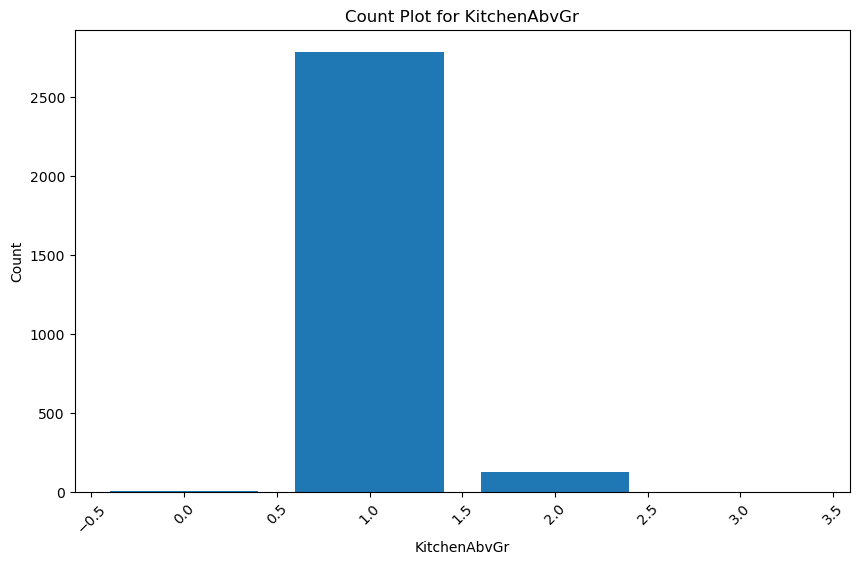


##################################################
############### Fireplaces Details ###############
            Fireplaces  Ratio (%)
Fireplaces                       
0                 1420  48.646797
1                 1268  43.439534
2                  219   7.502569
3                   11   0.376841
4                    1   0.034258

Fireplaces has 5 unique values.
##################################################



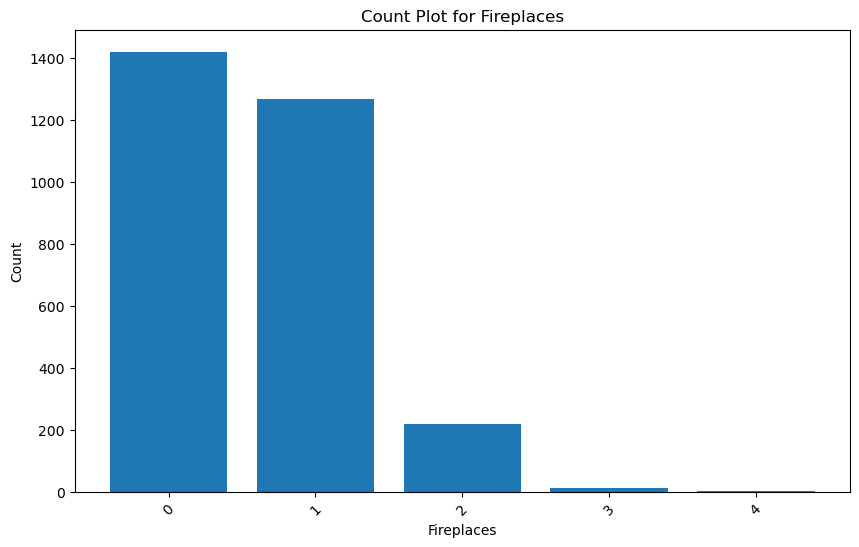


##################################################
############### GarageCars Details ###############
            GarageCars  Ratio (%)
GarageCars                       
2.0               1594  54.607742
1.0                776  26.584447
3.0                374  12.812607
0.0                157   5.378554
4.0                 16   0.548133
5.0                  1   0.034258

GarageCars has 6 unique values.
##################################################



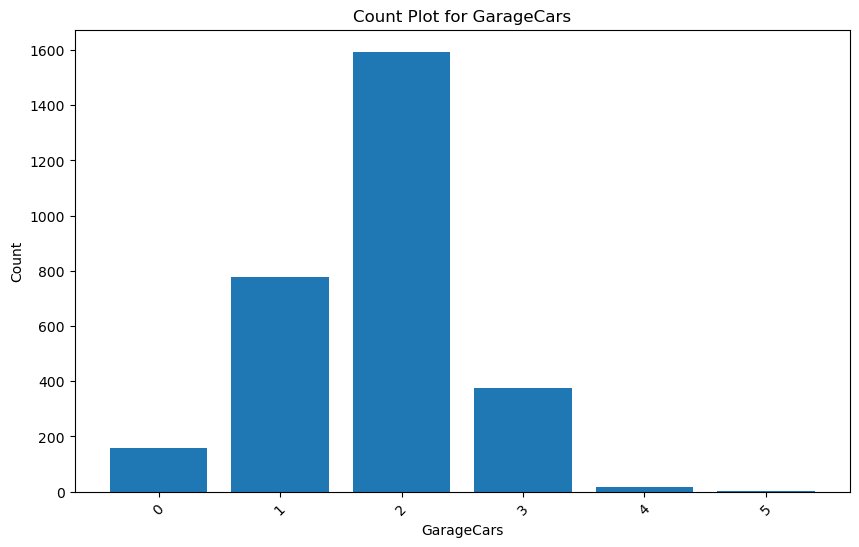


##################################################
############## Neighborhood Details ##############
              Neighborhood  Ratio (%)
Neighborhood                         
NAmes                  443  15.176430
CollgCr                267   9.146968
OldTown                239   8.187736
Edwards                194   6.646112
Somerst                182   6.235012
NridgHt                166   5.686879
Gilbert                165   5.652621
Sawyer                 151   5.173004
NWAmes                 131   4.487838
SawyerW                125   4.282288
Mitchel                114   3.905447
BrkSide                108   3.699897
Crawfor                103   3.528606
IDOTRR                  93   3.186023
Timber                  72   2.466598
NoRidge                 71   2.432340
StoneBr                 51   1.747174
SWISU                   48   1.644399
ClearCr                 44   1.507366
MeadowV                 37   1.267557
BrDale                  30   1.027749
Blmngtn                

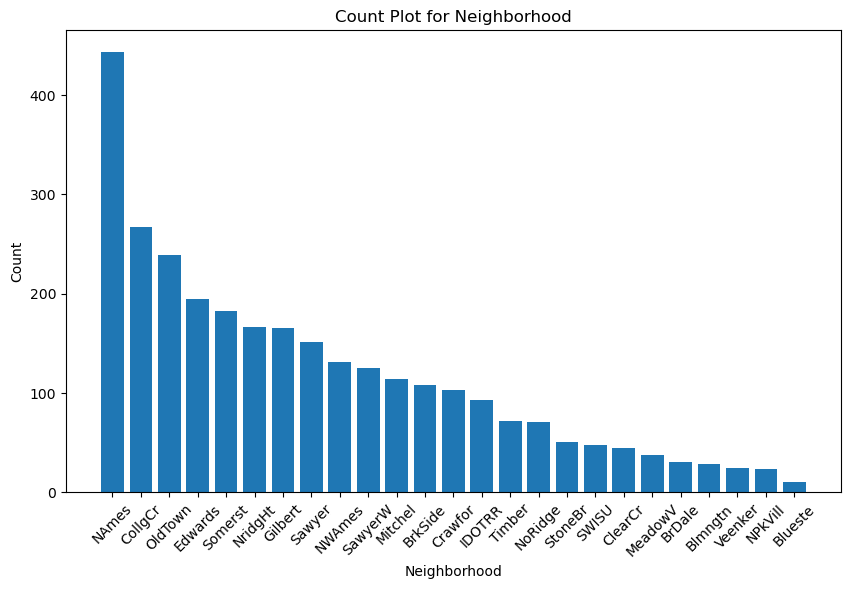


##################################################
############### MSSubClass Details ###############
            MSSubClass  Ratio (%)
MSSubClass                       
20                1079  36.964714
60                 575  19.698527
50                 287   9.832134
120                182   6.235012
30                 139   4.761905
70                 128   4.385063
160                128   4.385063
80                 118   4.042480
90                 109   3.734156
190                 61   2.089757
85                  48   1.644399
75                  23   0.787941
45                  18   0.616650
180                 17   0.582391
40                   6   0.205550
150                  1   0.034258

MSSubClass has 16 unique values.
##################################################



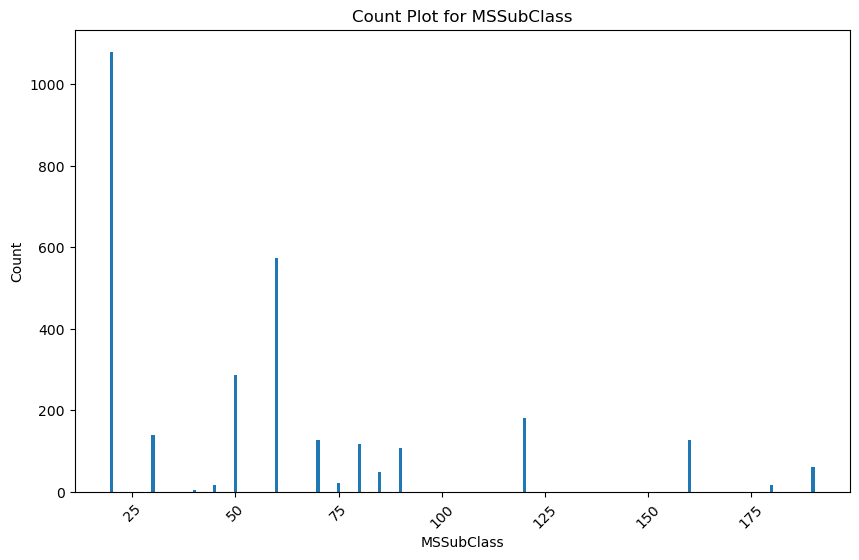


##################################################
############## OverallQual Details ###############
             OverallQual  Ratio (%)
OverallQual                        
5                    825  28.263104
6                    731  25.042823
7                    600  20.554985
8                    342  11.716341
4                    226   7.742378
9                    107   3.665639
3                     40   1.370332
10                    31   1.062008
2                     13   0.445358
1                      4   0.137033

OverallQual has 10 unique values.
##################################################



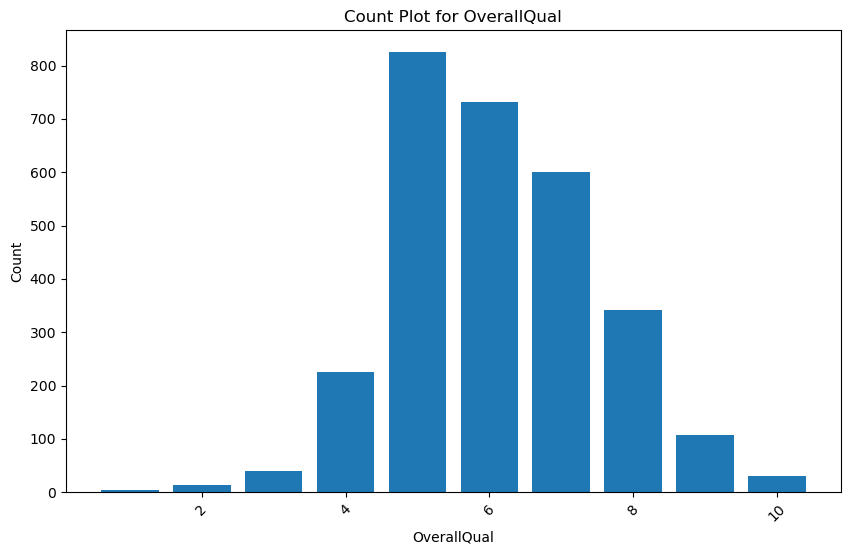

In [64]:
for col in cat_cols:
    cat_details(df, col, plot=True)

## 4. Numerical Variable

In [67]:
def num_details(dataframe, col_name, plot=False, quantiles=[0.05, 0.10, 0.20, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]):
    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show(block=True)
    
    # Calculate the length of the summary line
    summary_length = len(col_name) + len(" Details ")
    border_length = max(50, summary_length + 4)
    
    # Create border lines
    top_border = '#' * border_length
    middle_border = f"{'#' * 10} {col_name} Details {'#' * 10}".center(border_length, '#')
    bottom_border = '#' * border_length
    
    # Print summary
    print(f"\n{top_border}")
    print(middle_border)
    print(dataframe[col_name].describe(percentiles=quantiles).T, end="\n\n")
    print(f"{bottom_border}\n")

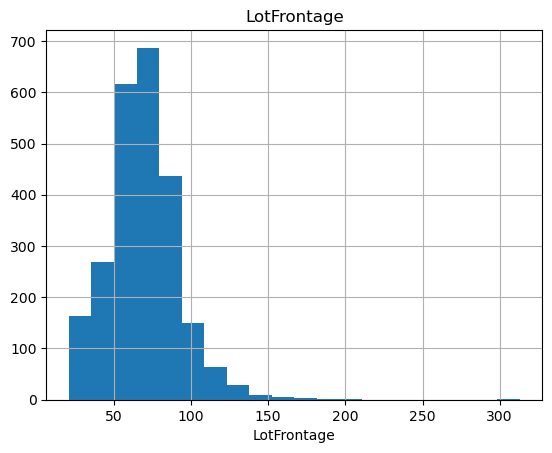


##################################################
############## LotFrontage Details ###############
count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
5%         32.000000
10%        43.000000
20%        53.000000
50%        68.000000
60%        73.000000
80%        84.000000
90%        95.000000
95%       107.000000
99%       135.680000
max       313.000000
Name: LotFrontage, dtype: float64

##################################################



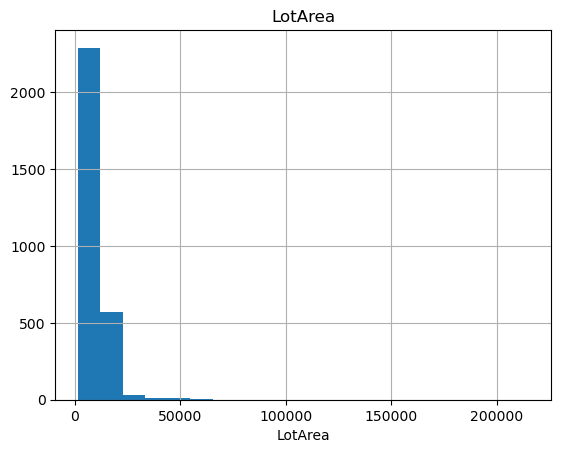


##################################################
################ LotArea Details #################
count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
5%         3182.000000
10%        4922.400000
20%        7007.600000
50%        9453.000000
60%       10151.600000
80%       12203.800000
90%       14300.600000
95%       17142.900000
99%       33038.640000
max      215245.000000
Name: LotArea, dtype: float64

##################################################



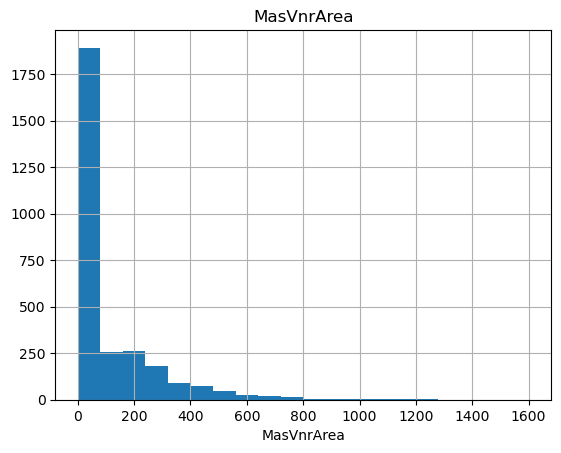


##################################################
############### MasVnrArea Details ###############
count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%       202.000000
90%       325.500000
95%       466.500000
99%       771.050000
max      1600.000000
Name: MasVnrArea, dtype: float64

##################################################



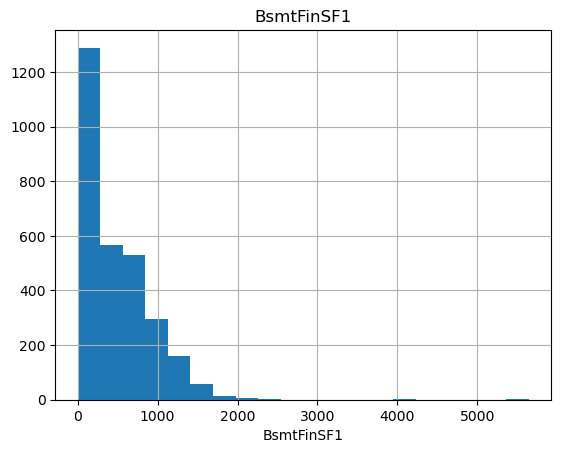


##################################################
############### BsmtFinSF1 Details ###############
count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%       368.500000
60%       515.200000
80%       812.000000
90%      1056.900000
95%      1274.000000
99%      1635.320000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

##################################################



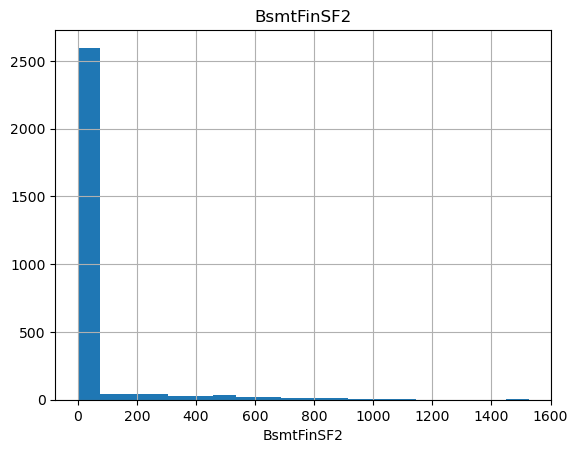


##################################################
############### BsmtFinSF2 Details ###############
count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%       125.600000
95%       435.000000
99%       874.660000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

##################################################



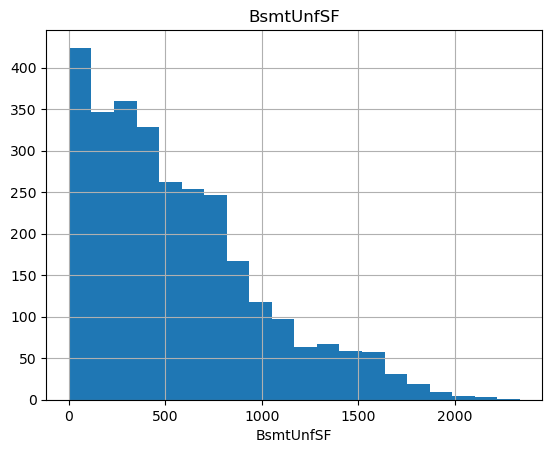


##################################################
############### BsmtUnfSF Details ################
count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
5%          0.000000
10%        56.000000
20%       174.000000
50%       467.000000
60%       595.000000
80%       892.600000
90%      1212.600000
95%      1474.900000
99%      1776.490000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

##################################################



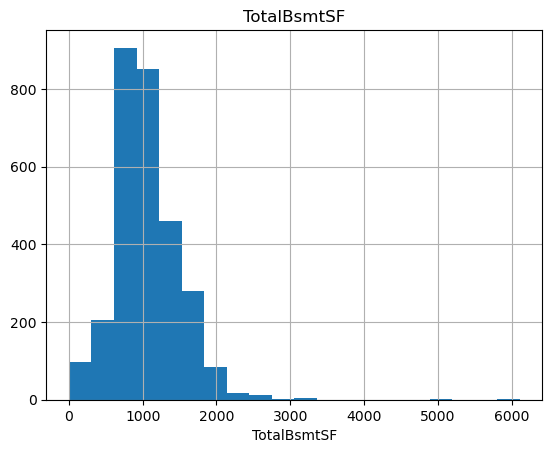


##################################################
############## TotalBsmtSF Details ###############
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
5%        455.250000
10%       600.000000
20%       741.000000
50%       989.500000
60%      1089.200000
80%      1392.000000
90%      1614.000000
95%      1776.150000
99%      2198.300000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

##################################################



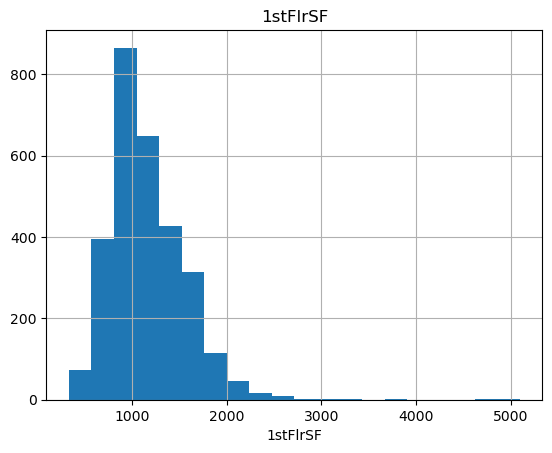


##################################################
################ 1stFlrSF Details ################
count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
5%        665.900000
10%       744.800000
20%       847.000000
50%      1082.000000
60%      1180.000000
80%      1483.400000
90%      1675.000000
95%      1830.100000
99%      2288.020000
max      5095.000000
Name: 1stFlrSF, dtype: float64

##################################################



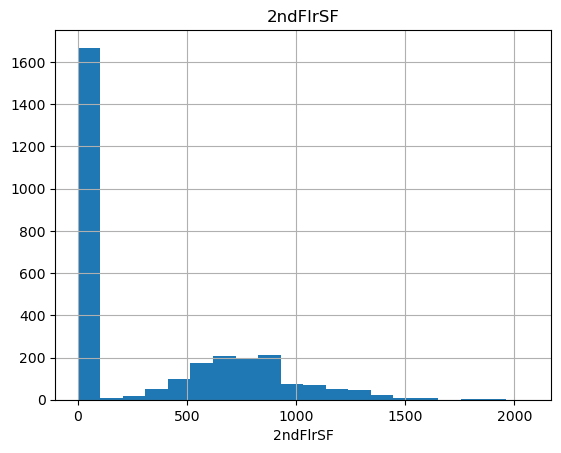


##################################################
################ 2ndFlrSF Details ################
count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%       427.400000
80%       770.800000
90%       925.000000
95%      1131.200000
99%      1400.200000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

##################################################



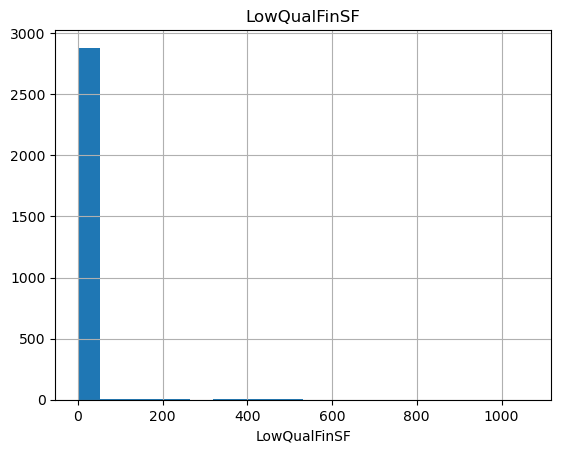


##################################################
############## LowQualFinSF Details ##############
count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       153.840000
max      1064.000000
Name: LowQualFinSF, dtype: float64

##################################################



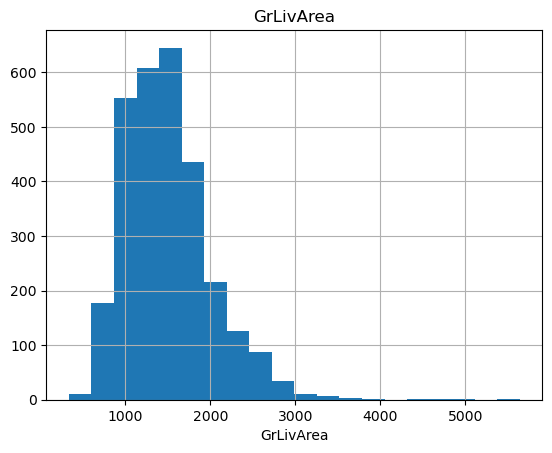


##################################################
############### GrLivArea Details ################
count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
5%        861.000000
10%       923.800000
20%      1064.600000
50%      1444.000000
60%      1560.000000
80%      1838.400000
90%      2153.200000
95%      2464.200000
99%      2935.720000
max      5642.000000
Name: GrLivArea, dtype: float64

##################################################



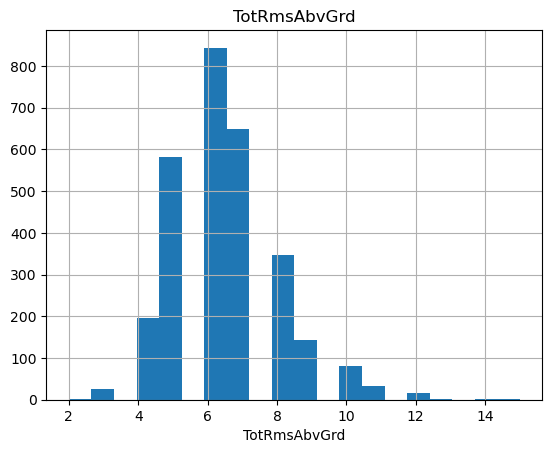


##################################################
############## TotRmsAbvGrd Details ##############
count    2919.000000
mean        6.451524
std         1.569379
min         2.000000
5%          4.000000
10%         5.000000
20%         5.000000
50%         6.000000
60%         7.000000
80%         8.000000
90%         8.000000
95%         9.000000
99%        11.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64

##################################################



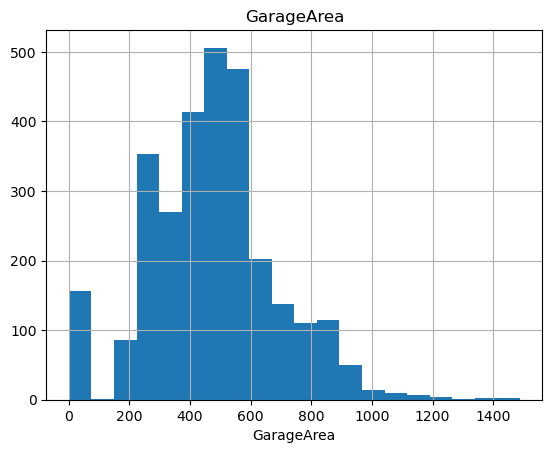


##################################################
############### GarageArea Details ###############
count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
5%          0.000000
10%       240.000000
20%       296.000000
50%       480.000000
60%       513.000000
80%       621.000000
90%       758.000000
95%       856.150000
99%      1019.490000
max      1488.000000
Name: GarageArea, dtype: float64

##################################################



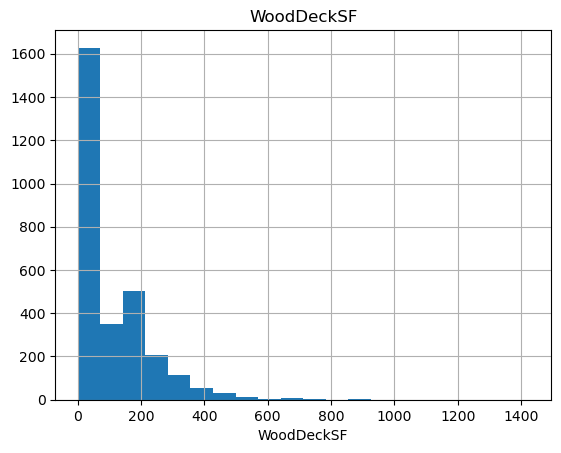


##################################################
############### WoodDeckSF Details ###############
count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%       100.000000
80%       192.000000
90%       257.000000
95%       328.000000
99%       500.820000
max      1424.000000
Name: WoodDeckSF, dtype: float64

##################################################



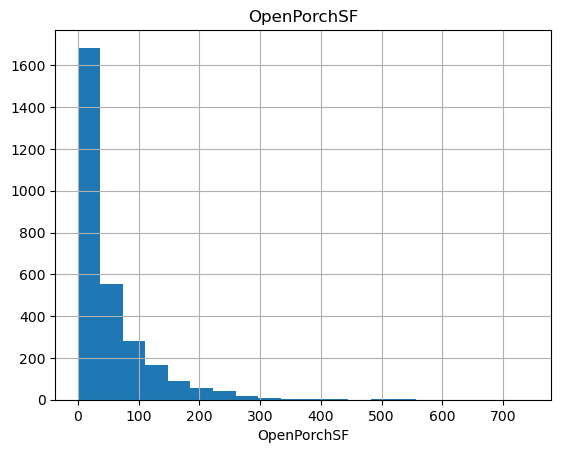


##################################################
############## OpenPorchSF Details ###############
count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%        26.000000
60%        40.000000
80%        85.000000
90%       131.200000
95%       183.100000
99%       284.460000
max       742.000000
Name: OpenPorchSF, dtype: float64

##################################################



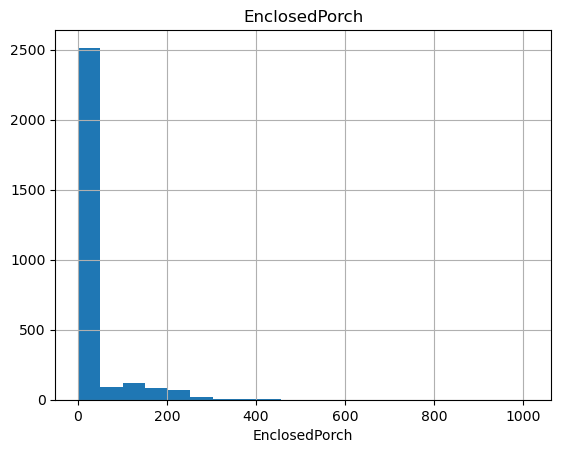


##################################################
############# EnclosedPorch Details ##############
count    2919.000000
mean       23.098321
std        64.244246
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%       112.000000
95%       176.000000
99%       264.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64

##################################################



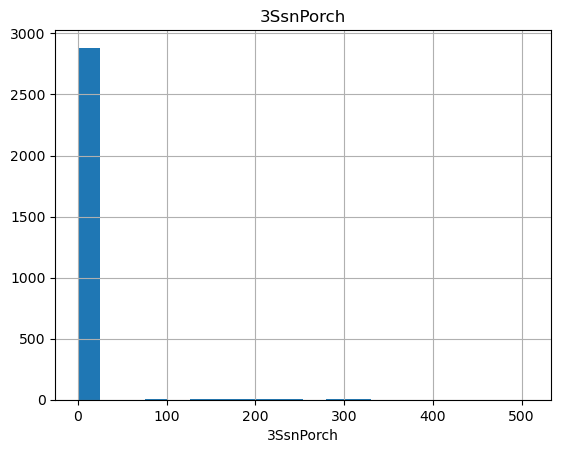


##################################################
############### 3SsnPorch Details ################
count    2919.000000
mean        2.602261
std        25.188169
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       144.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

##################################################



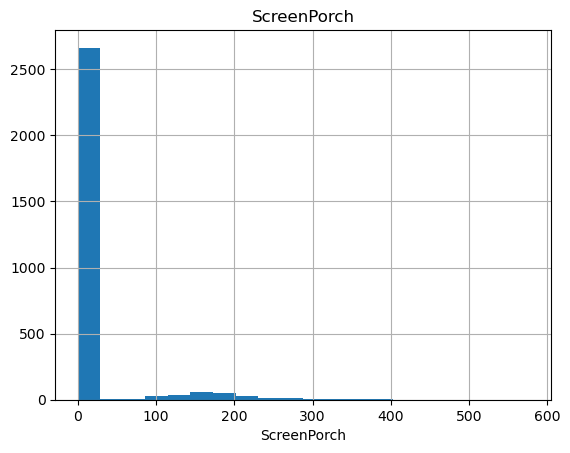


##################################################
############## ScreenPorch Details ###############
count    2919.000000
mean       16.062350
std        56.184365
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%         0.000000
95%       161.000000
99%       259.820000
max       576.000000
Name: ScreenPorch, dtype: float64

##################################################



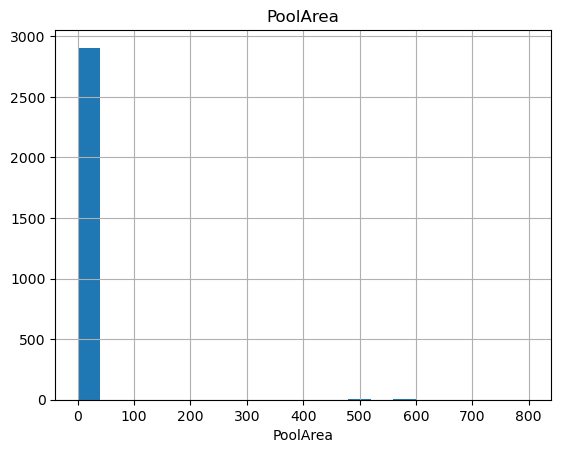


##################################################
################ PoolArea Details ################
count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
50%         0.000000
60%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

##################################################



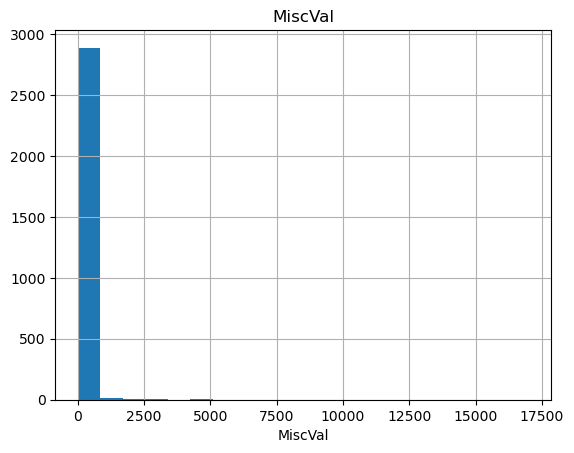


##################################################
################ MiscVal Details #################
count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
50%          0.000000
60%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%        982.000000
max      17000.000000
Name: MiscVal, dtype: float64

##################################################



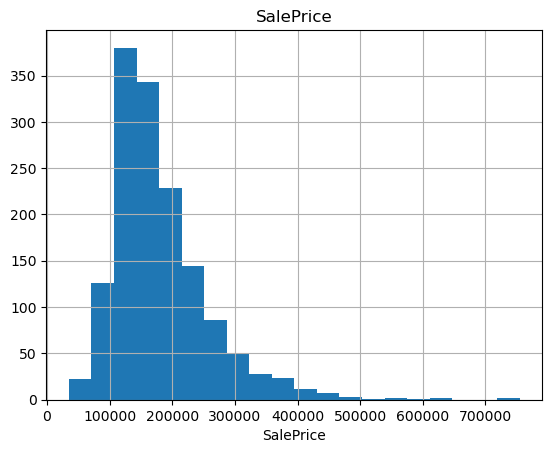


##################################################
############### SalePrice Details ################
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
50%      163000.000000
60%      179280.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

##################################################



In [69]:
for col in num_cols:
    num_details(df, col , plot=True)

## 5. Target Variable

In [72]:
def target_details_with_cat(dataframe, target, categorical_col):
    for col in categorical_col:
        print(f"{'#' * 10} {col} Details {'#' * 10}".center(50, '#'))
        print(pd.DataFrame({f"{target}_Mean": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [74]:
target_details_with_cat(df, "SalePrice", cat_cols)

################ MSZoning Details ################
          SalePrice_Mean
MSZoning                
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275


################# Street Details #################
        SalePrice_Mean
Street                
Grvl     130190.500000
Pave     181130.538514


################# Alley Details ##################
       SalePrice_Mean
Alley                
Grvl    122219.080000
Pave    168000.585366


################ LotShape Details ################
          SalePrice_Mean
LotShape                
IR1        206101.665289
IR2        239833.365854
IR3        216036.500000
Reg        164754.818378


############## LandContour Details ###############
             SalePrice_Mean
LandContour                
Bnk           143104.079365
HLS           231533.940000
Low           203661.111111
Lvl           180183.746758


############### Utilities Details ################
           

In [76]:
def plot_continuous_target(df, target, numeric_cols):
    for col in numeric_cols:
        print(f"{'#' * 10} {col} Details {'#' * 10}".center(50, '#'))
        plt.figure(figsize=(10, 5))
        sns.regplot(x=df[col], y=df[target], line_kws={"color": "red"})
        plt.title(f'{target} vs {col}')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.grid(True)
        plt.show()

############## LotFrontage Details ###############


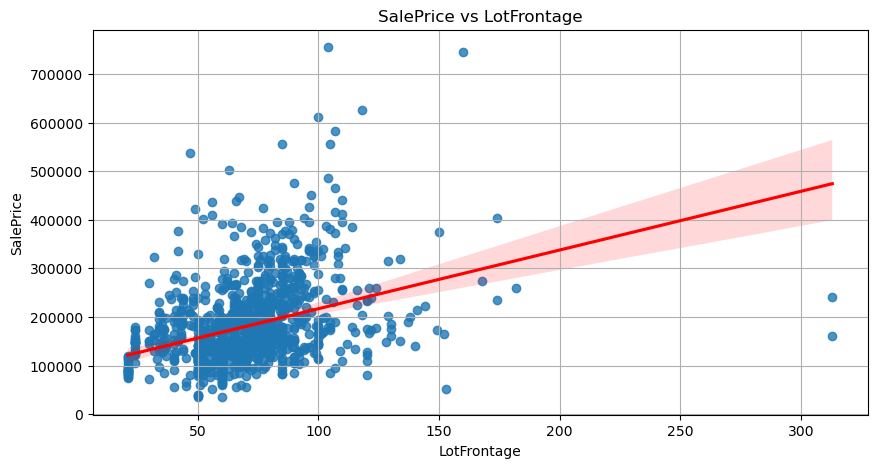

################ LotArea Details #################


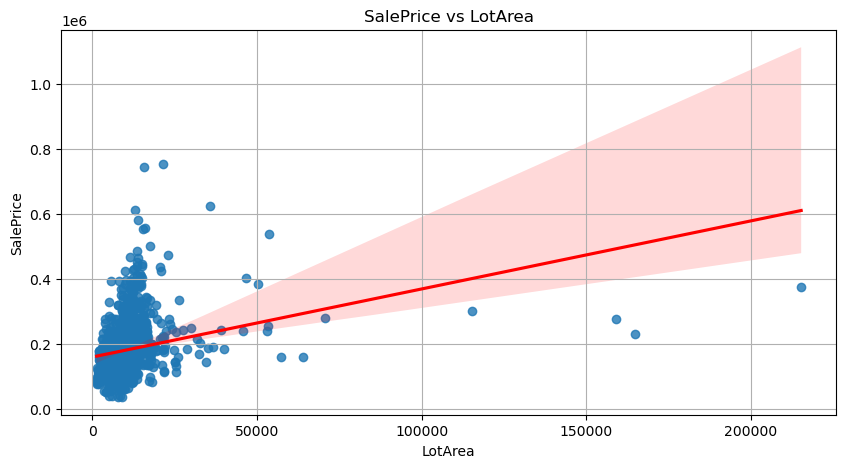

############### MasVnrArea Details ###############


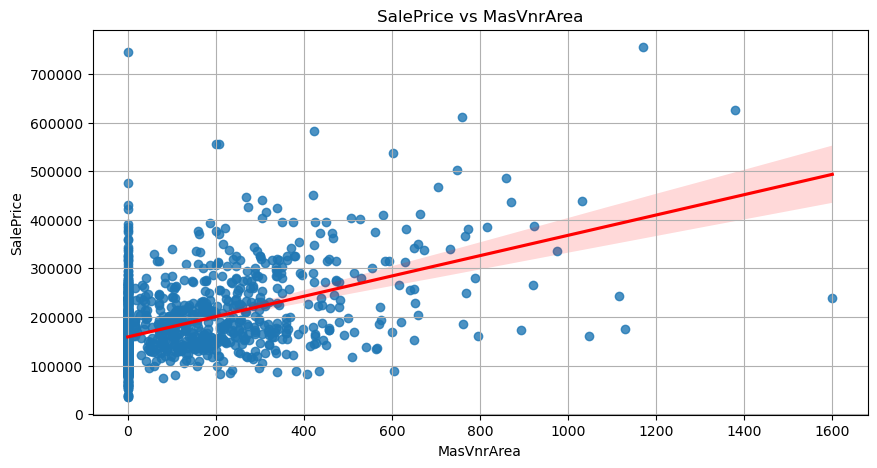

############### BsmtFinSF1 Details ###############


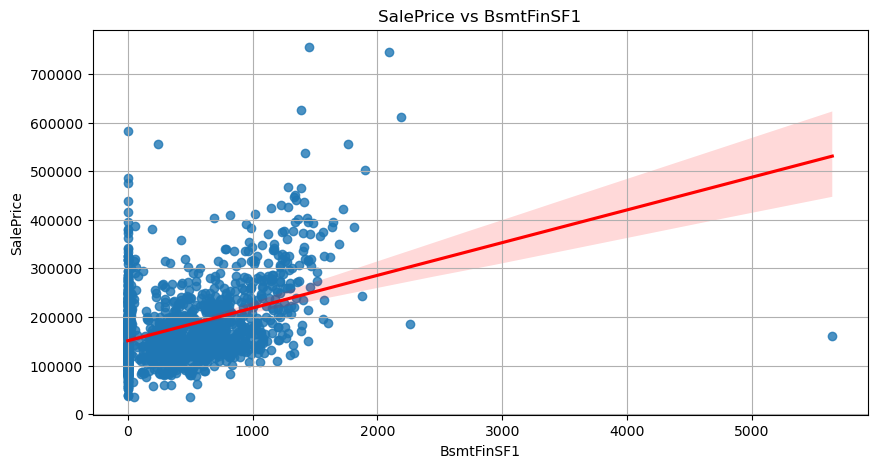

############### BsmtFinSF2 Details ###############


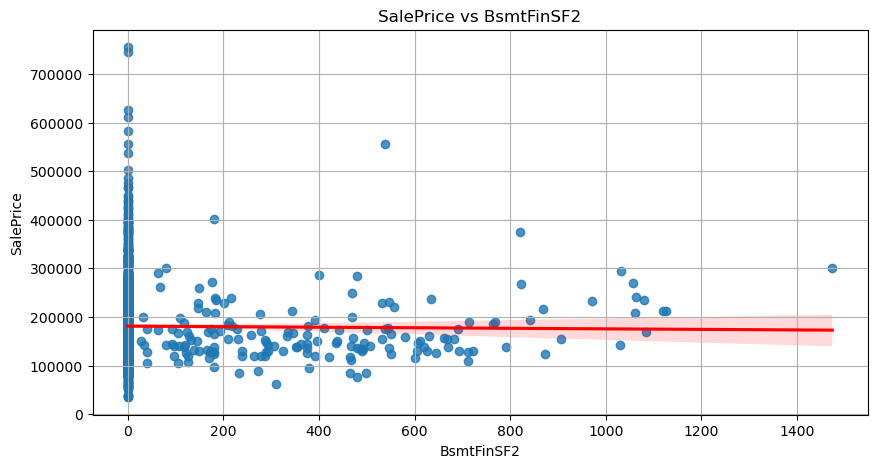

############### BsmtUnfSF Details ################


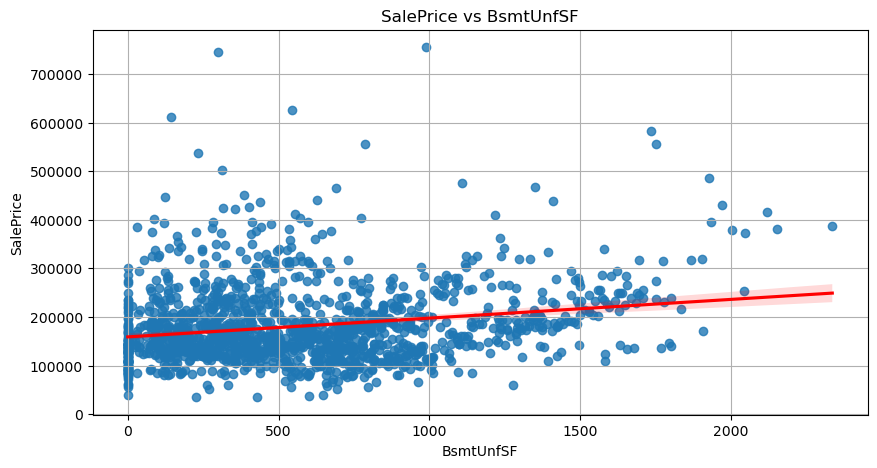

############## TotalBsmtSF Details ###############


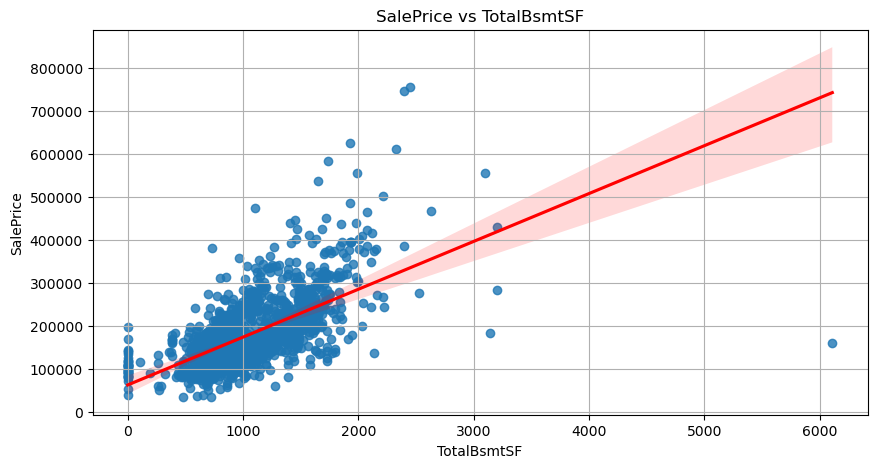

################ 1stFlrSF Details ################


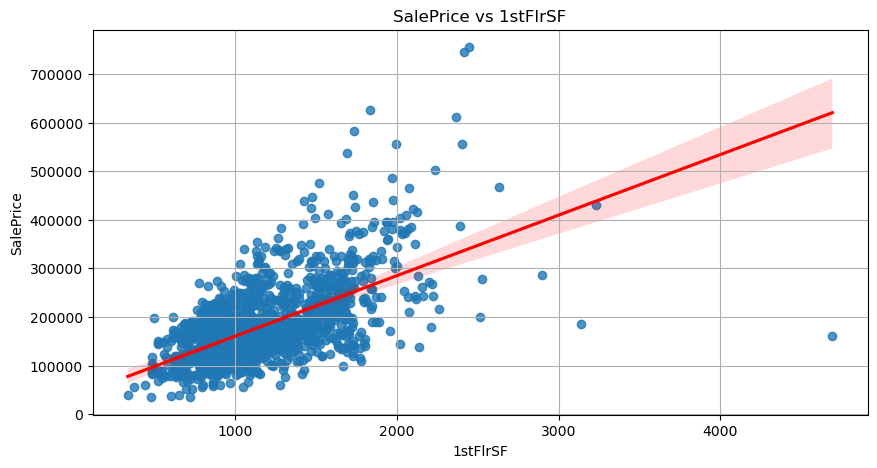

################ 2ndFlrSF Details ################


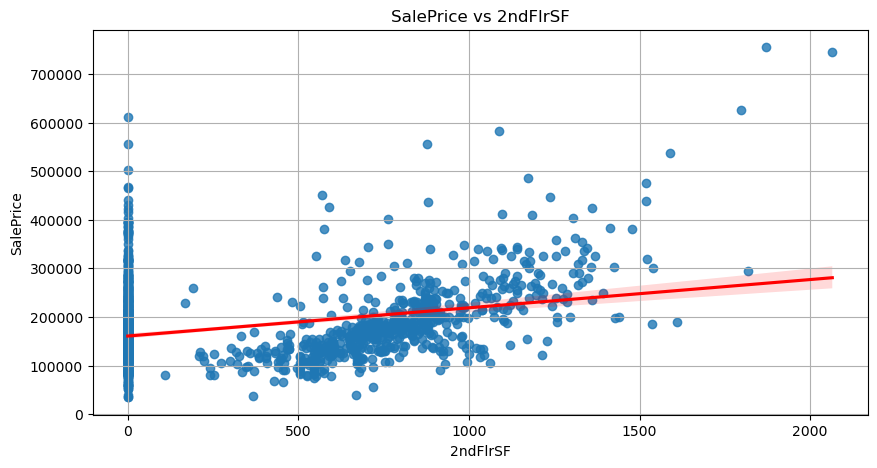

############## LowQualFinSF Details ##############


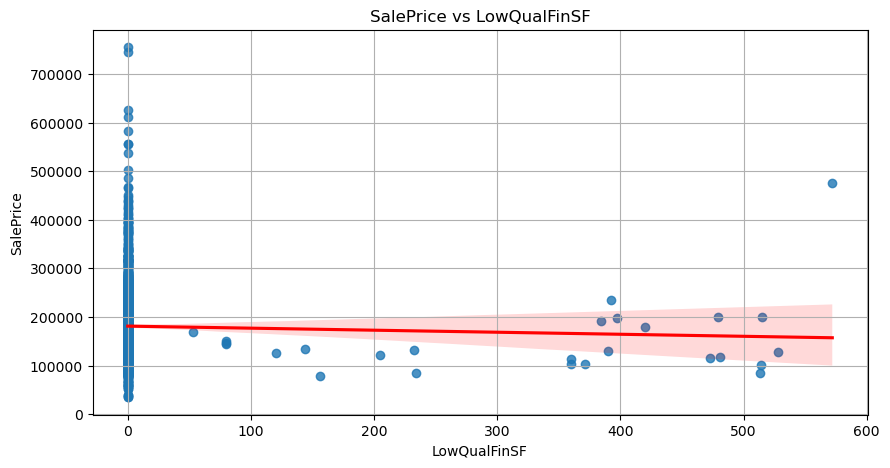

############### GrLivArea Details ################


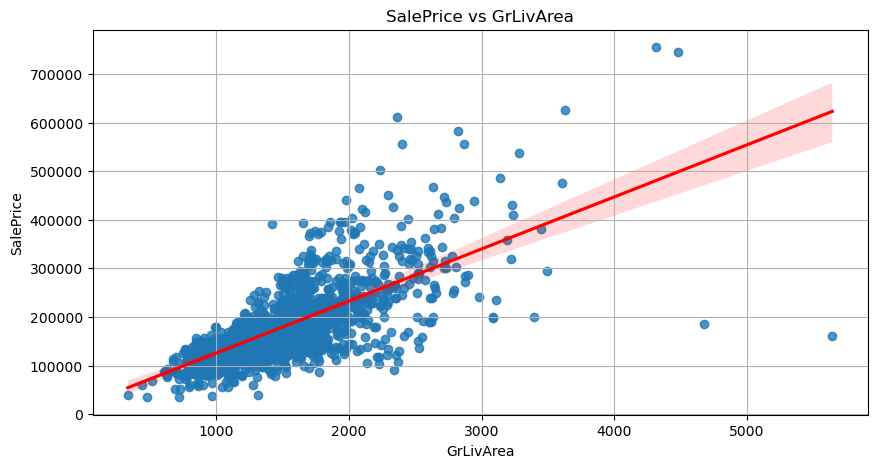

############## TotRmsAbvGrd Details ##############


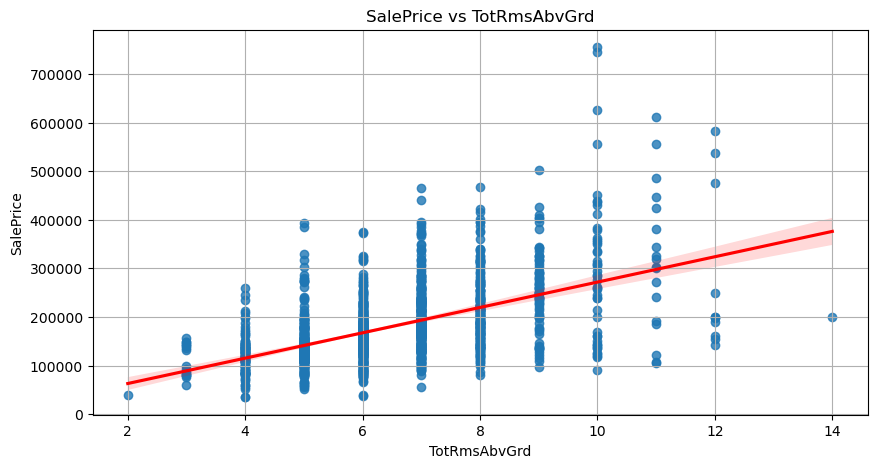

############### GarageArea Details ###############


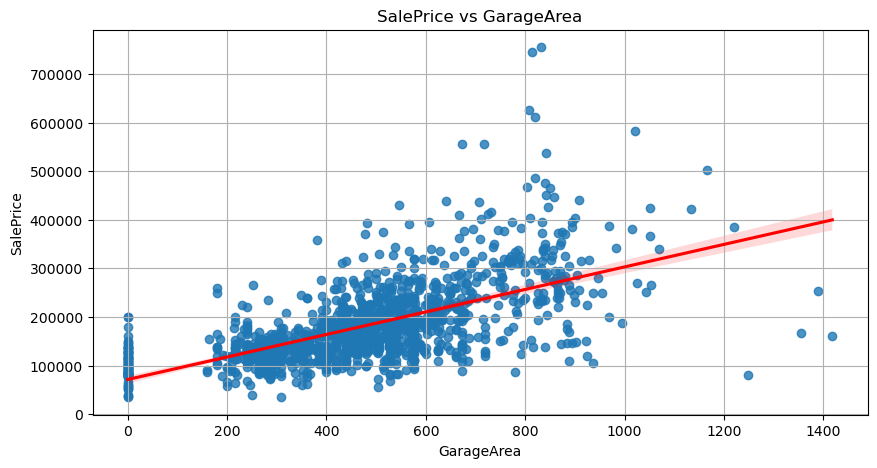

############### WoodDeckSF Details ###############


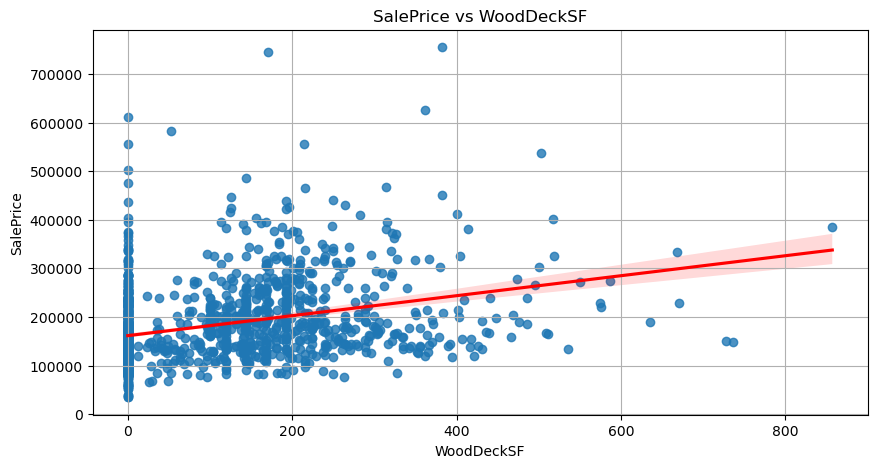

############## OpenPorchSF Details ###############


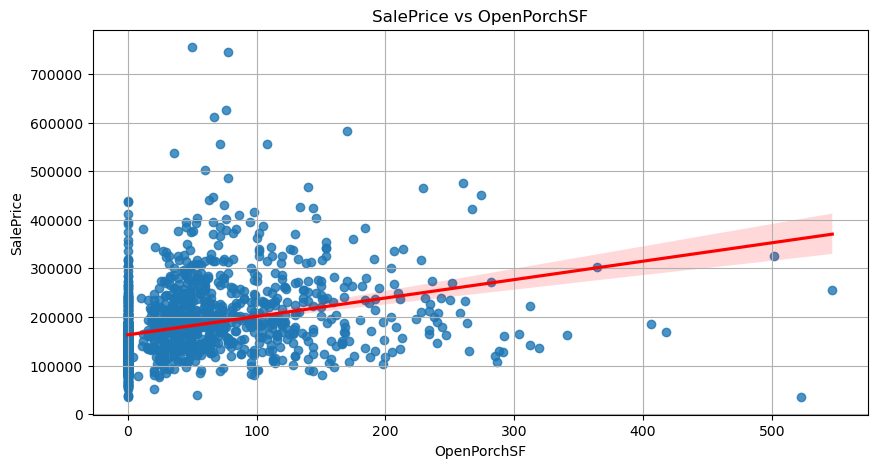

############# EnclosedPorch Details ##############


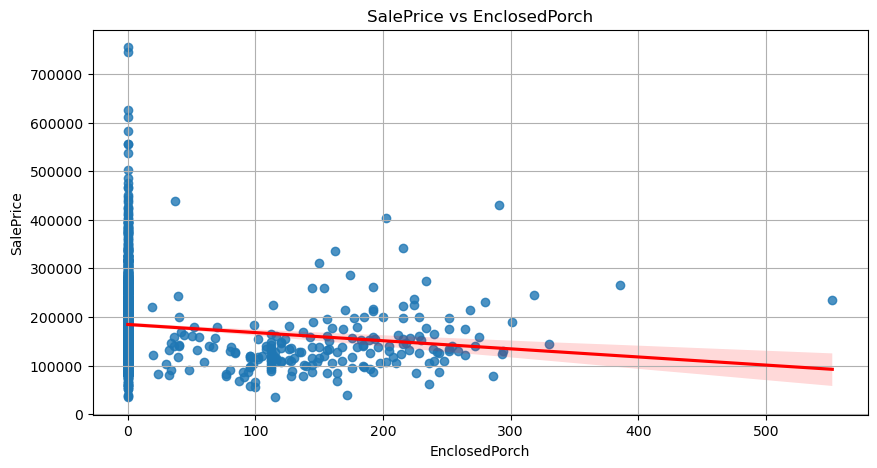

############### 3SsnPorch Details ################


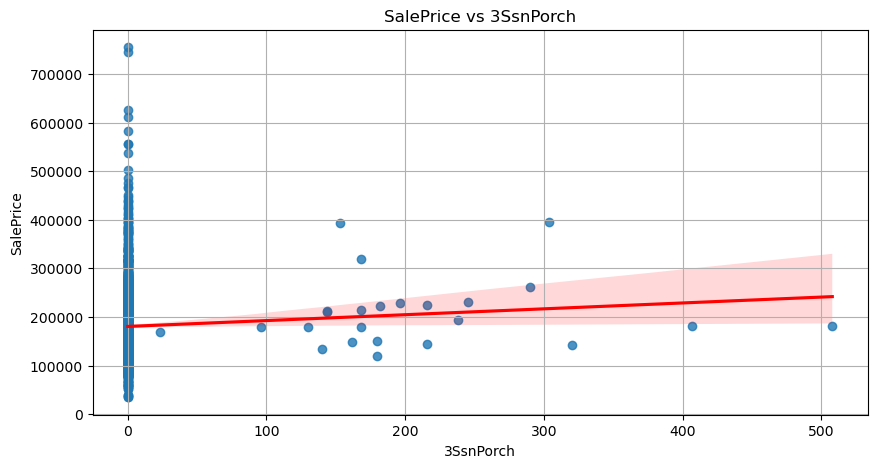

############## ScreenPorch Details ###############


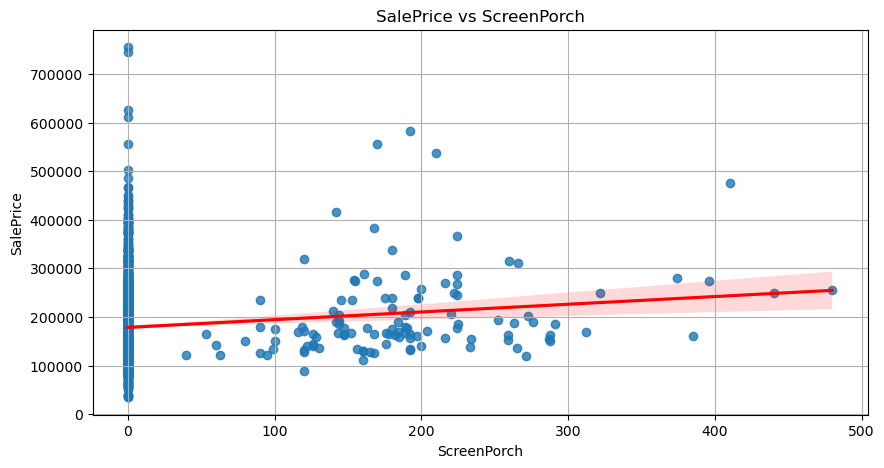

################ PoolArea Details ################


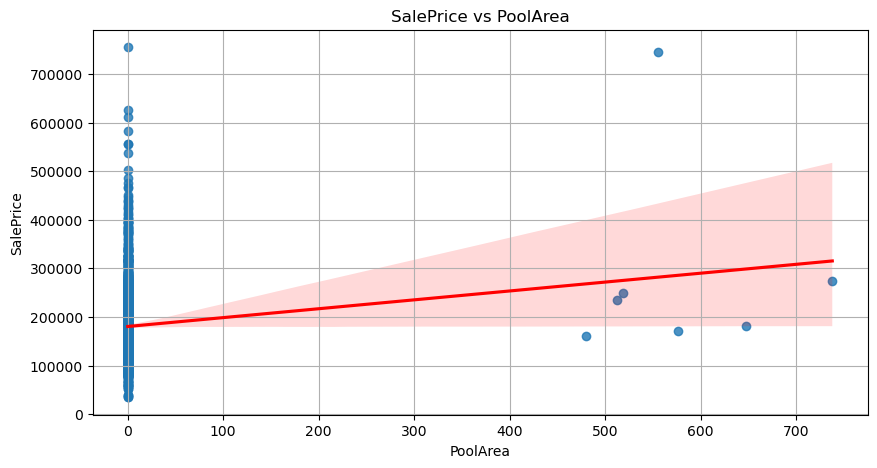

################ MiscVal Details #################


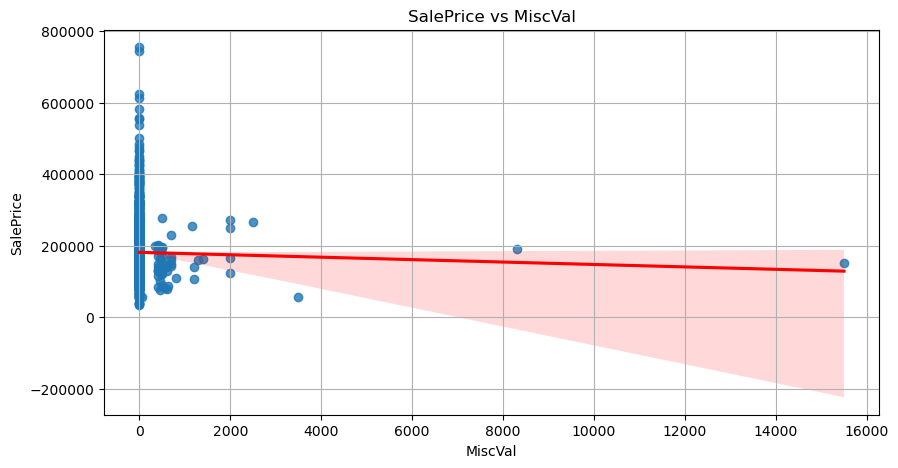

############### SalePrice Details ################


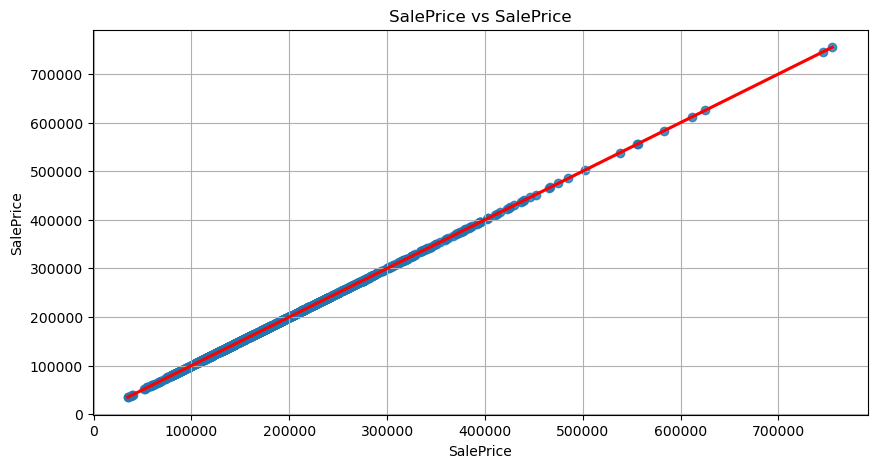

In [78]:
plot_continuous_target(df, "SalePrice", num_cols)

In [80]:
def plot_date_target(df, year_columns, month_columns, target):
    # Convert year and month columns to datetime format
    for col in year_columns:
        df[col] = pd.to_datetime(df[col], format='%Y').dt.year
        
    for col in month_columns:
        df[col] = pd.to_datetime(df[col], format='%m').dt.month

    # Visualization for yearly data
    if year_columns:
        for col in year_columns:
            yearly_avg = df.groupby(col)[target].mean().reset_index()
            plt.figure(figsize=(10, 5))
            plt.plot(yearly_avg[col], yearly_avg[target], marker='o', linestyle='-')
            plt.title(f'Average {target} by Year')
            plt.xlabel('Year')
            plt.ylabel(f'Average {target}')
            plt.grid(True)
            plt.show()
            
    # Visualization for monthly data
    if month_columns:
        for col in month_columns:
            monthly_avg = df.groupby(col)[target].mean().reset_index()
            plt.figure(figsize=(10, 5))
            plt.plot(monthly_avg[col], monthly_avg[target], marker='o', linestyle='-')
            plt.title(f'Average {target} by Month')
            plt.xlabel('Month')
            plt.ylabel(f'Average {target}')
            plt.grid(True)
            plt.show()

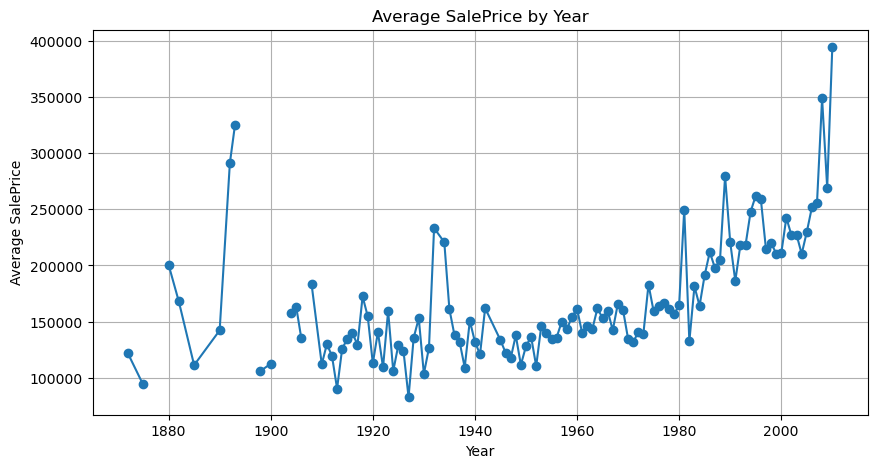

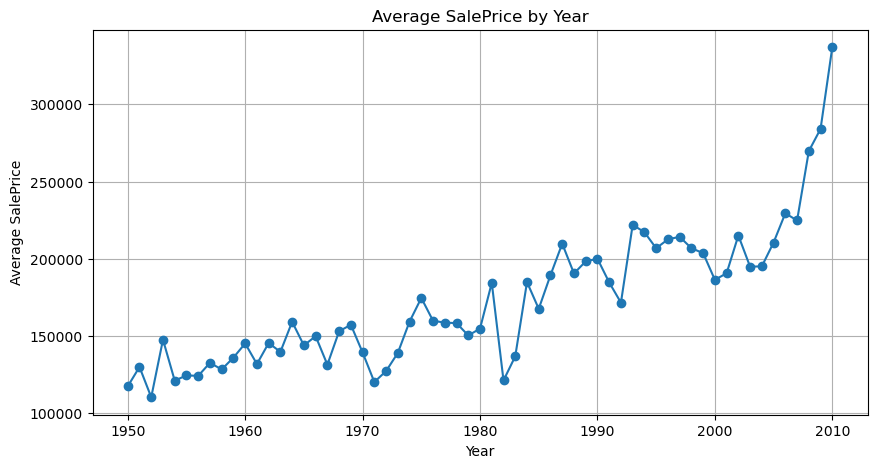

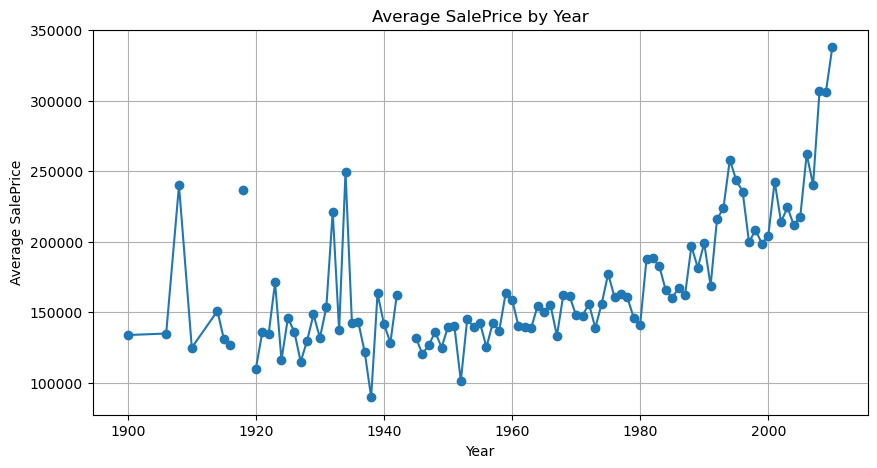

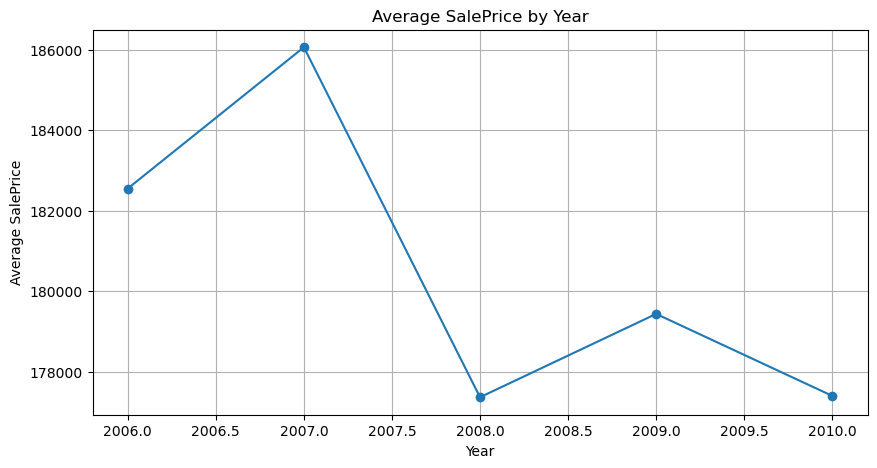

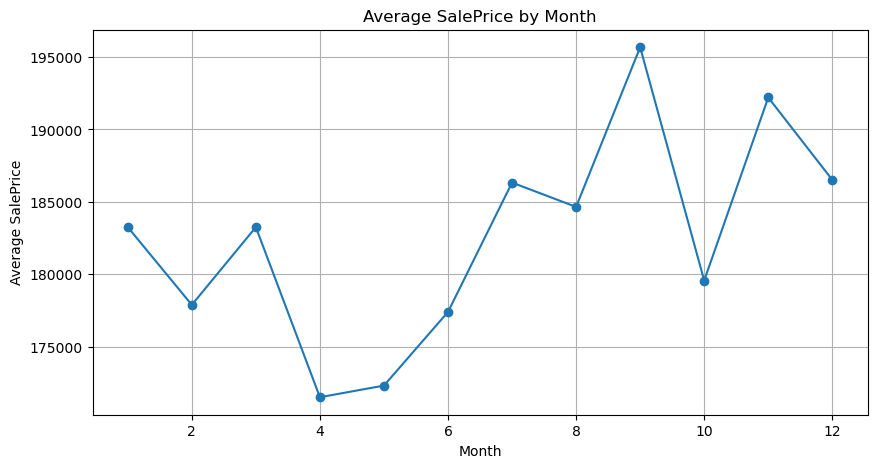

In [82]:
plot_date_target(df,['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'],['MoSold'],"SalePrice")

## 6. Outliers

################## LotFrontage Details ##################


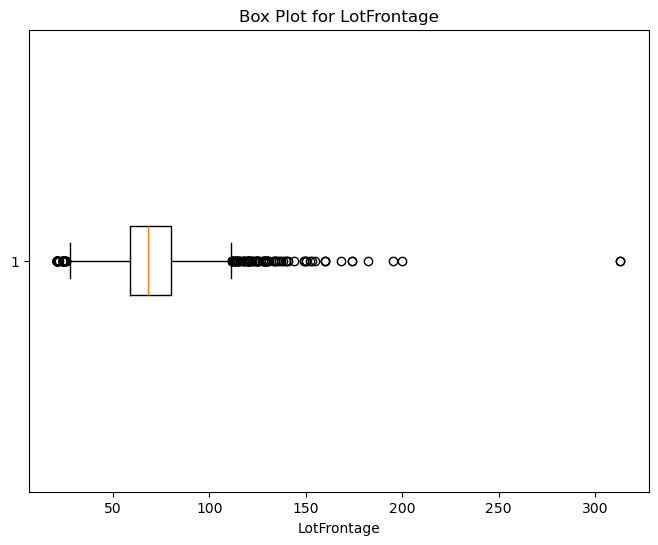

#################### LotArea Details ####################


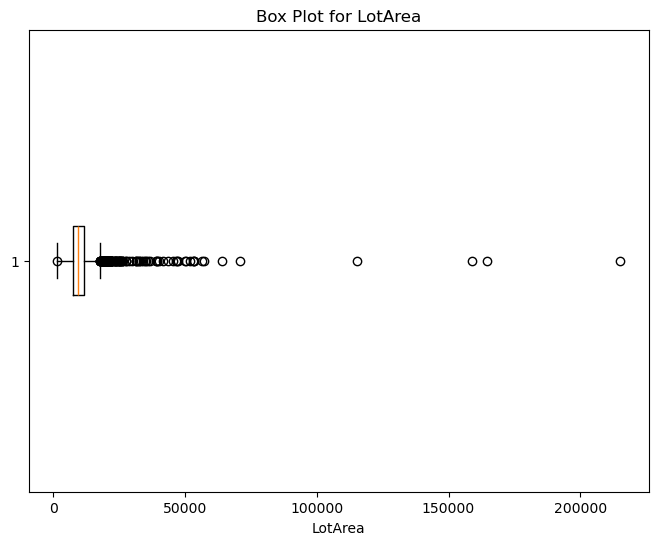

################### MasVnrArea Details ##################


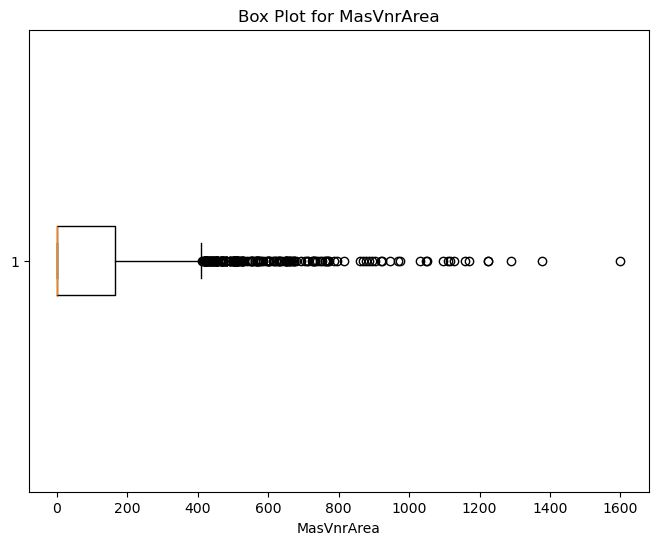

################### BsmtFinSF1 Details ##################


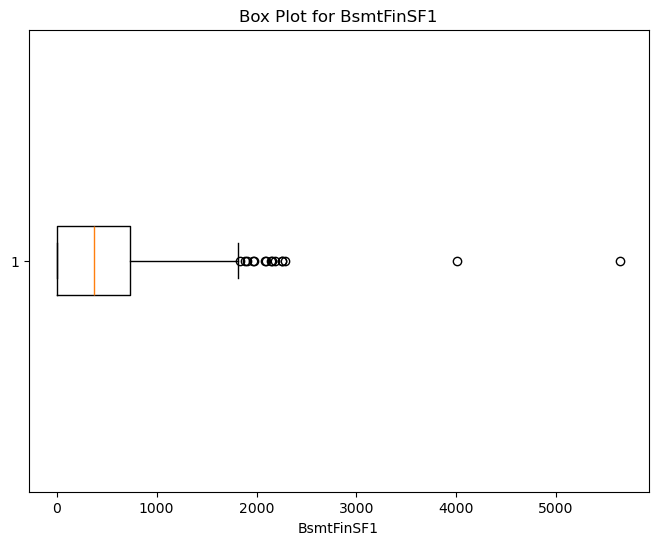

################### BsmtFinSF2 Details ##################


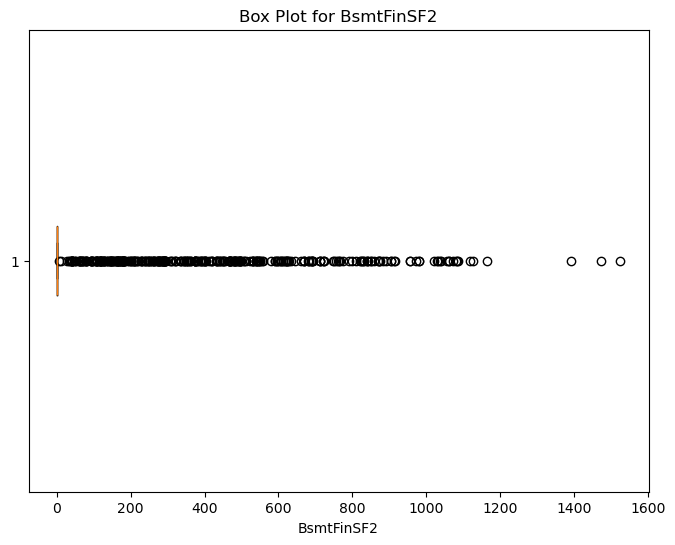

################### BsmtUnfSF Details ###################


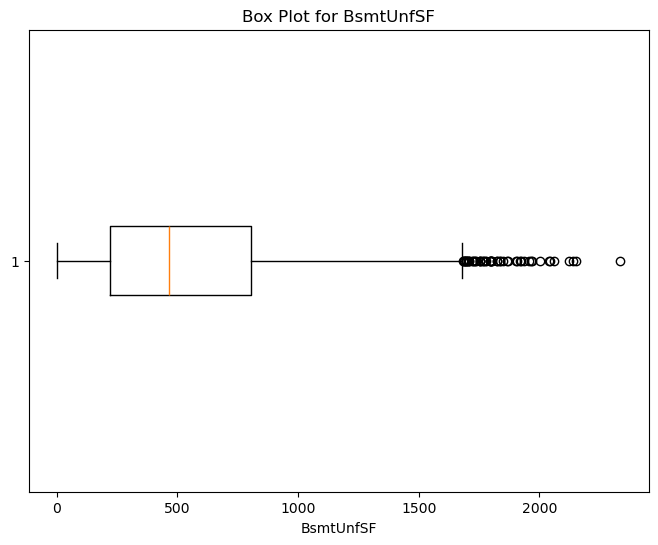

################## TotalBsmtSF Details ##################


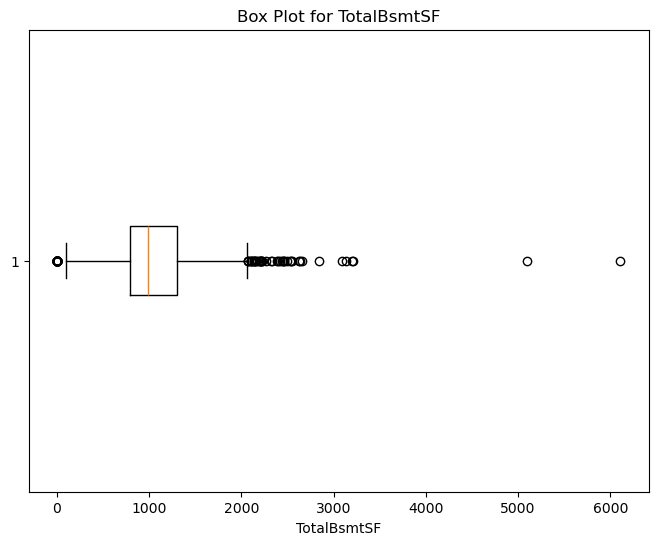

#################### 1stFlrSF Details ###################


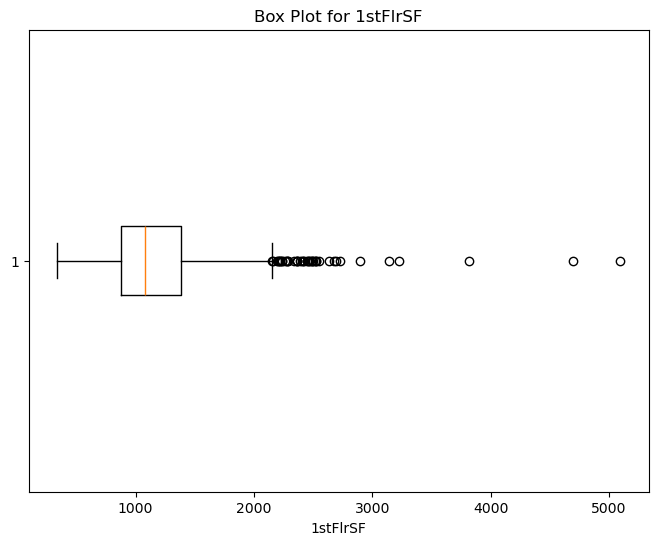

#################### 2ndFlrSF Details ###################


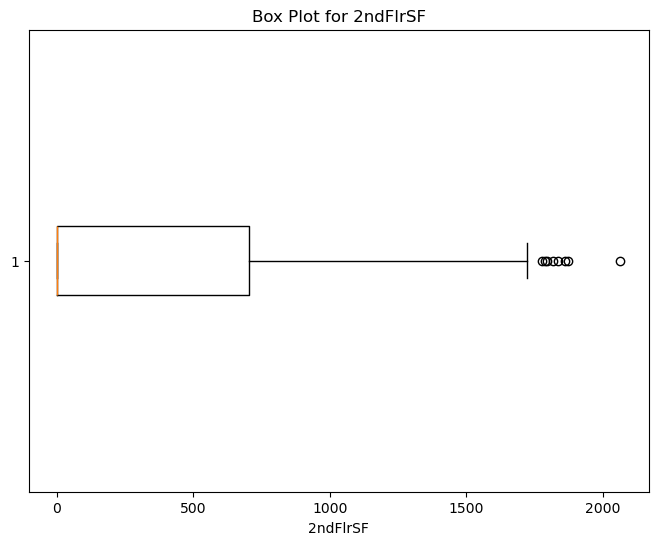

################## LowQualFinSF Details #################


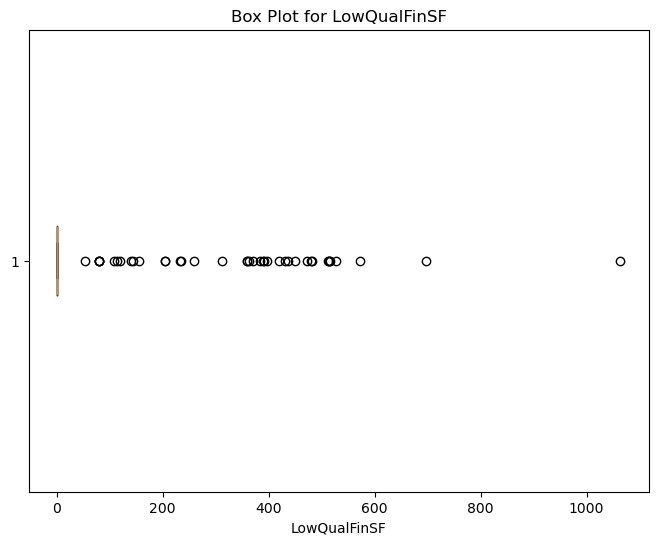

################### GrLivArea Details ###################


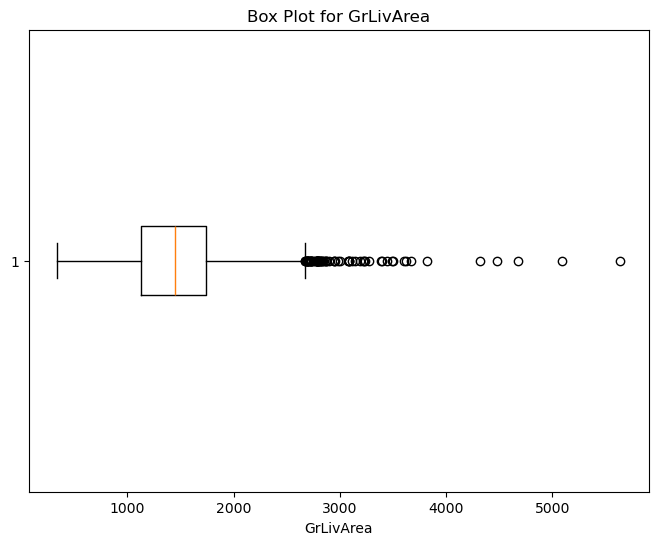

################## TotRmsAbvGrd Details #################


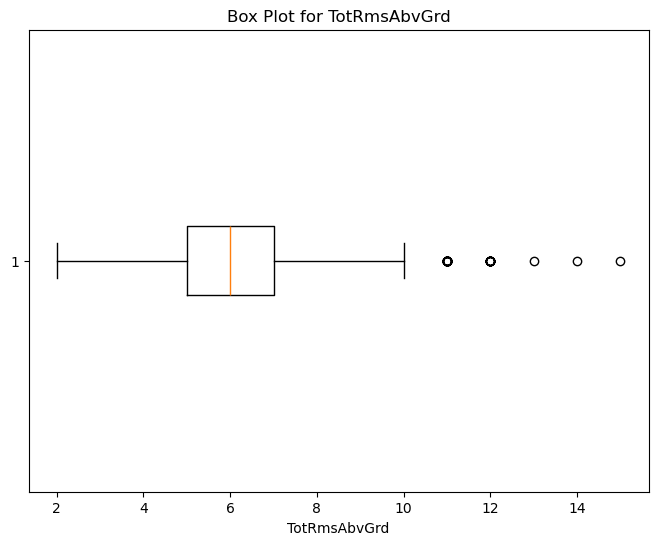

################### GarageArea Details ##################


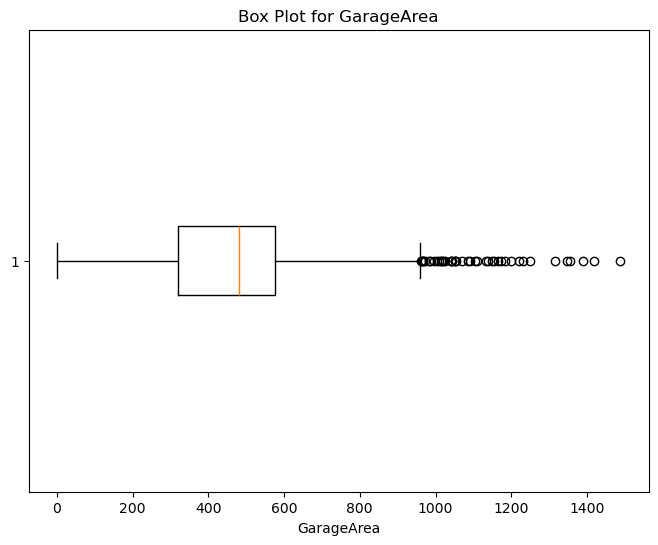

################### WoodDeckSF Details ##################


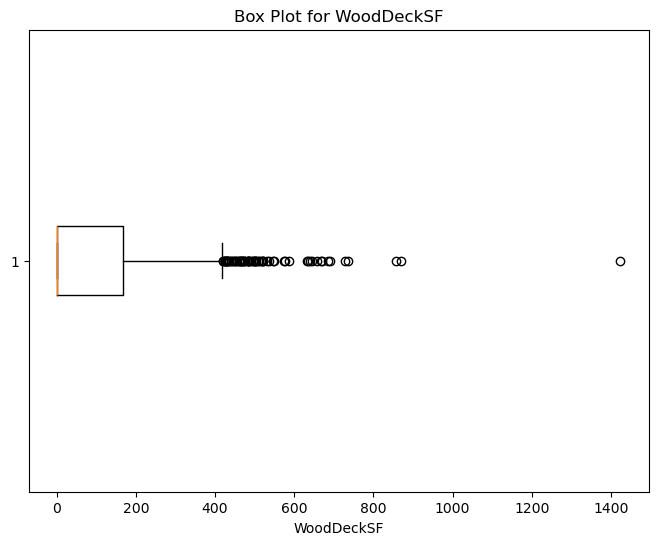

################## OpenPorchSF Details ##################


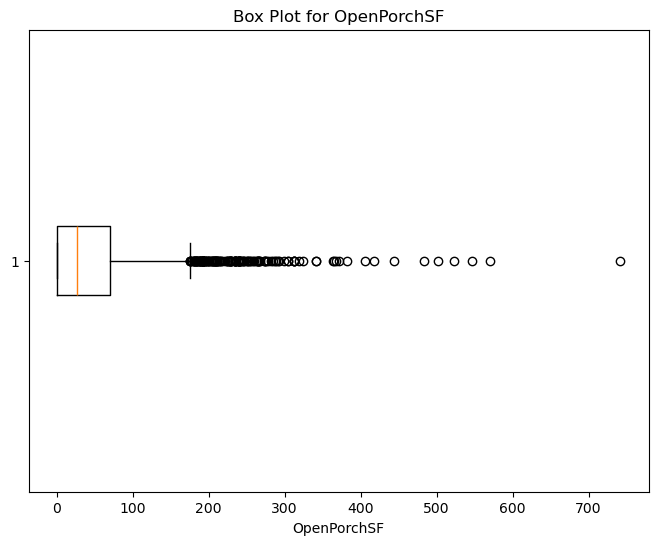

################# EnclosedPorch Details #################


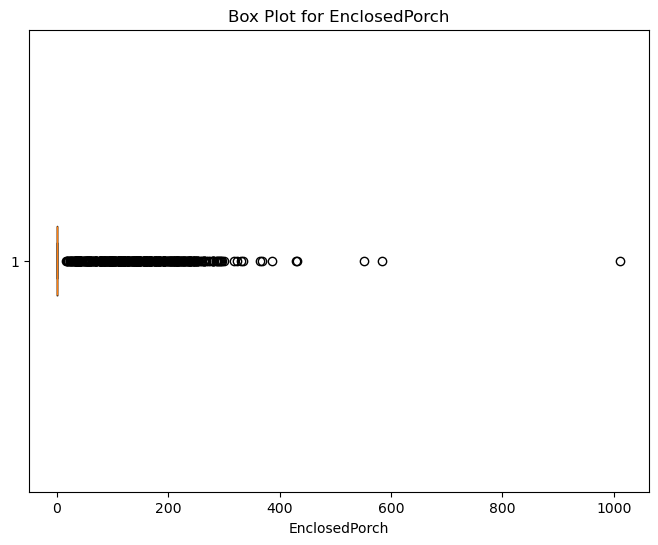

################### 3SsnPorch Details ###################


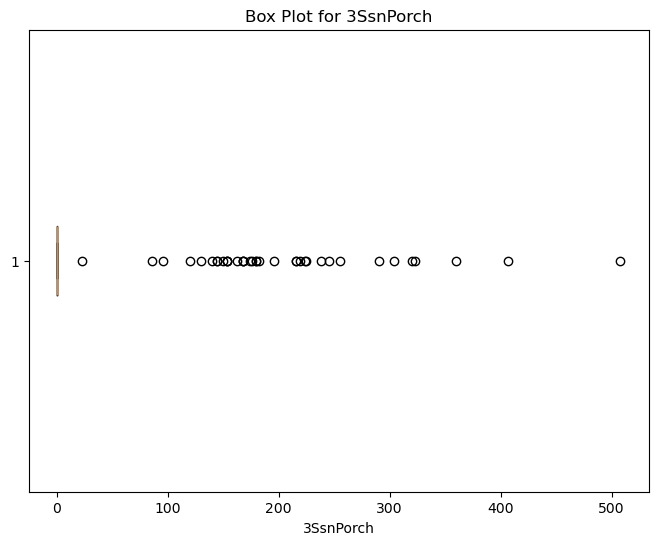

################## ScreenPorch Details ##################


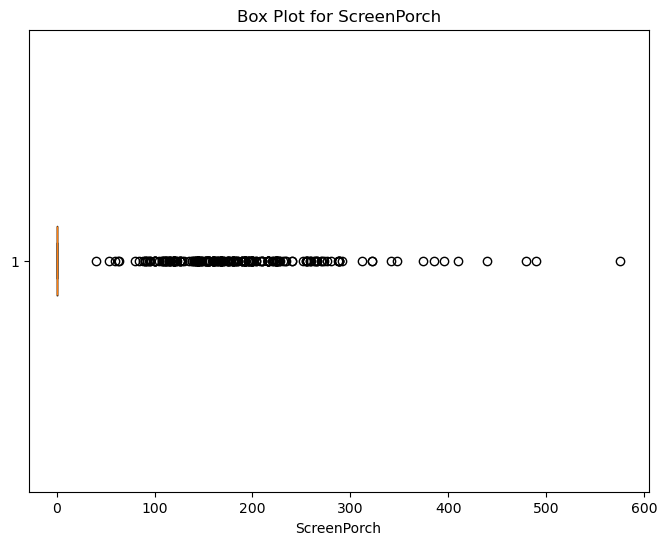

#################### PoolArea Details ###################


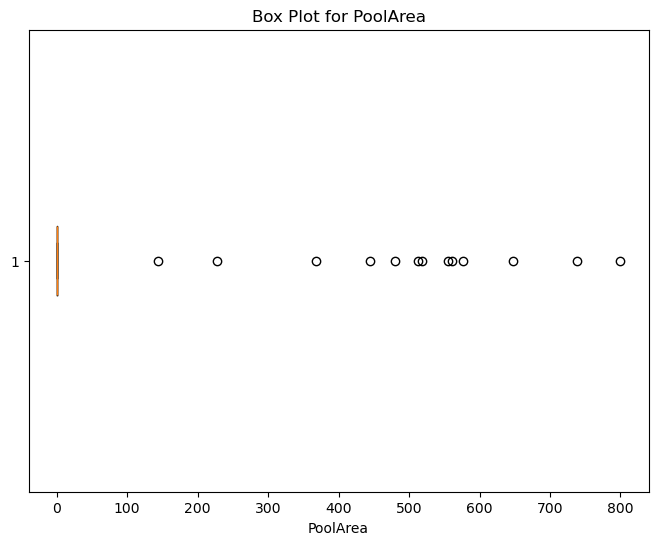

#################### MiscVal Details ####################


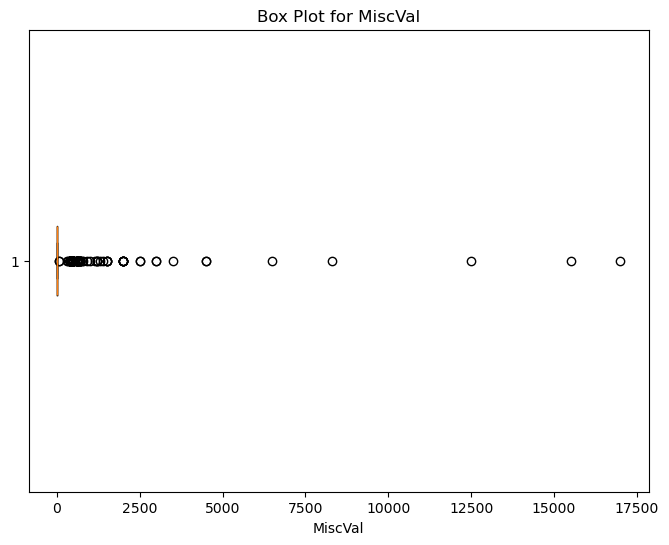

################### SalePrice Details ###################


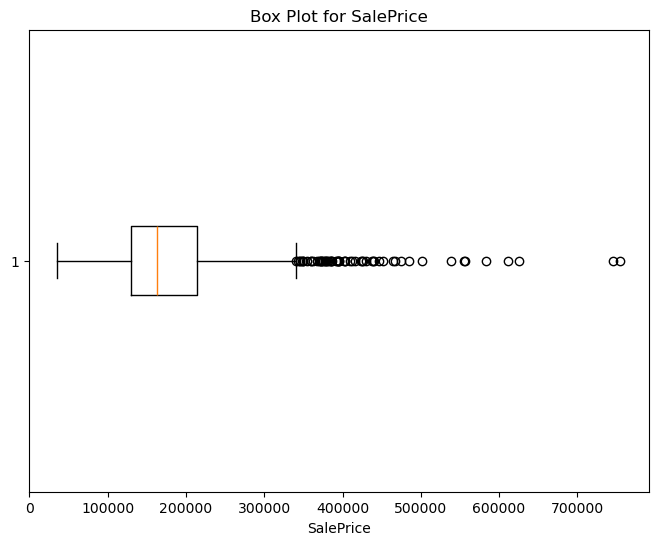

In [85]:
for col in num_cols:
    print(f"{'#' * 10} {col} Details {'#' * 10}".center(57, '#'))
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col].dropna(), vert=False) 
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.show()

In [87]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    # Calculate quartiles
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    
    # Calculate interquartile range
    interquantile_range = quartile3 - quartile1
    
    # Calculate outlier thresholds
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

In [89]:
def check_outlier(dataframe, col_name):
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        low, up = outlier_thresholds(dataframe, col_name)
        return (dataframe[col_name] > up) | (dataframe[col_name] < low)
    else:
        return pd.Series(False, index=dataframe.index)

In [91]:
check_outlier(df, num_cols)

0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Length: 2919, dtype: bool

In [93]:
def check_all_columns_outliers(dataframe,num_cols):
    results = {}
    
    for col in num_cols:
        results[col] = check_outlier(dataframe, col).any() if pd.api.types.is_numeric_dtype(dataframe[col]) else False
    
    return results

In [95]:
check_all_columns_outliers(df, num_cols)

{'LotFrontage': True,
 'LotArea': True,
 'MasVnrArea': False,
 'BsmtFinSF1': True,
 'BsmtFinSF2': False,
 'BsmtUnfSF': False,
 'TotalBsmtSF': True,
 '1stFlrSF': True,
 '2ndFlrSF': False,
 'LowQualFinSF': True,
 'GrLivArea': False,
 'TotRmsAbvGrd': False,
 'GarageArea': False,
 'WoodDeckSF': True,
 'OpenPorchSF': True,
 'EnclosedPorch': True,
 '3SsnPorch': True,
 'ScreenPorch': False,
 'PoolArea': True,
 'MiscVal': True,
 'SalePrice': False}

In [97]:
def show_column_names_with_outliers_info(dataframe, col_list):
    print(f"{'#' * 10} Numeric Columns Outlier Thresholds: Low & Up Limit {'#' * 10}".center(100, '#'))
    for col in col_list:
        low, up = outlier_thresholds(dataframe, col)
        print(f"{col} : low: {low}, up: {up}", end="\n")
    print(end="\n\n")

    # Categorize columns based on outlier presence
    no_outliers = []
    have_outliers = []
    for col, has_outliers in check_all_columns_outliers(dataframe, col_list).items():
        if has_outliers:
            have_outliers.append(col)
        else:
            no_outliers.append(col)

    # Print columns with outliers
    print(f"{'#' * 10} Numeric Columns Have Outliers {'#' * 10}".center(100, '#'))
    print(have_outliers)
    print(f"count_columns: {len(have_outliers)}", end="\n\n")

    # Print columns without outliers
    print(f"{'#' * 10} Numeric Columns Have NOT Outliers {'#' * 10}".center(100, '#'))
    print(no_outliers)
    print(f"count_columns: {len(no_outliers)}", end="\n\n")

    return have_outliers, no_outliers

In [99]:
have_outliers, no_outliers = show_column_names_with_outliers_info(df, num_cols)

######################## Numeric Columns Outlier Thresholds: Low & Up Limit ########################
LotFrontage : low: -151.01999999999975, up: 307.6999999999996
LotArea : low: -45357.96000000011, up: 80076.60000000018
MasVnrArea : low: -1156.5750000000003, up: 1927.6250000000005
BsmtFinSF1 : low: -2452.9799999999996, up: 4088.2999999999993
BsmtFinSF2 : low: -1311.9899999999998, up: 2186.6499999999996
BsmtUnfSF : low: -2664.7349999999997, up: 4441.224999999999
TotalBsmtSF : low: -3297.449999999999, up: 5495.749999999998
1stFlrSF : low: -2132.0300000000025, up: 4940.050000000005
2ndFlrSF : low: -2100.3000000000025, up: 3500.500000000004
LowQualFinSF : low: -230.76000000000295, up: 384.6000000000049
GrLivArea : low: -2715.030000000011, up: 6326.170000000018
TotRmsAbvGrd : low: -6.5, up: 21.5
GarageArea : low: -1529.2349999999997, up: 2548.7249999999995
WoodDeckSF : low: -751.2300000000002, up: 1252.0500000000004
OpenPorchSF : low: -426.69000000000074, up: 711.1500000000012
EnclosedPorch

## 7. Correlation

In [102]:
corr = df[num_cols].corr()
corr

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.489896    0.221079    0.219408    0.047431   
LotArea           0.489896  1.000000    0.125596    0.194031    0.084059   
MasVnrArea        0.221079  0.125596    1.000000    0.303490   -0.015645   
BsmtFinSF1        0.219408  0.194031    0.303490    1.000000   -0.055045   
BsmtFinSF2        0.047431  0.084059   -0.015645   -0.055045    1.000000   
BsmtUnfSF         0.113714  0.021362    0.090163   -0.477404   -0.238241   
TotalBsmtSF       0.354822  0.254138    0.397240    0.536467    0.089410   
1stFlrSF          0.458247  0.332460    0.395834    0.458092    0.084330   
2ndFlrSF          0.026545  0.031515    0.121014   -0.162301   -0.097744   
LowQualFinSF      0.004894  0.000554   -0.057912   -0.066028   -0.004923   
GrLivArea         0.382462  0.284519    0.402994    0.211669   -0.017872   
TotRmsAbvGrd      0.349513  0.213802    0.278228    0.052141   -0.048423   
GarageArea        0.359786  0.213251    0.374061    0.310449    0.003139   
WoodDeckSF        0.122070  0.158045    0.166200    0.223492    0.098399   
OpenPorchSF       0.164896  0.104797    0.144650    0.124163   -0.005876   
EnclosedPorch     0.011509  0.020974   -0.111499   -0.099712    0.032740   
3SsnPorch         0.028289  0.015995    0.013612    0.050908   -0.023279   
ScreenPorch       0.075858  0.054375    0.065209    0.096823    0.063302   
PoolArea          0.174119  0.093708    0.004512    0.084462    0.044524   
MiscVal           0.044272  0.069029    0.044811    0.093295   -0.005139   
SalePrice         0.351799  0.263843    0.477493    0.386420   -0.011378   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
LotFrontage     0.113714     0.354822  0.458247  0.026545      0.004894  ...   
LotArea         0.021362     0.254138  0.332460  0.031515      0.000554  ...   
MasVnrArea      0.090163     0.397240  0.395834  0.121014     -0.057912  ...   
BsmtFinSF1     -0.477404     0.536467  0.458092 -0.162301     -0.066028  ...   
BsmtFinSF2     -0.238241     0.089410  0.084330 -0.097744     -0.004923  ...   
BsmtUnfSF       1.000000     0.412285  0.296600 -0.000376      0.046913  ...   
TotalBsmtSF     0.412285     1.000000  0.801670 -0.205665     -0.023359  ...   
1stFlrSF        0.296600     0.801670  1.000000 -0.249823     -0.012704  ...   
2ndFlrSF       -0.000376    -0.205665 -0.249823  1.000000      0.017803  ...   
LowQualFinSF    0.046913    -0.023359 -0.012704  0.017803      1.000000  ...   
GrLivArea       0.233988     0.445276  0.562538  0.655085      0.096916  ...   
TotRmsAbvGrd    0.247505     0.282126  0.391782  0.584586      0.102059  ...   
GarageArea      0.164409     0.486067  0.492011  0.128570     -0.053551  ...   
WoodDeckSF     -0.039302     0.229600  0.227347  0.089922     -0.015622  ...   
OpenPorchSF     0.119764     0.245521  0.238502  0.185387     -0.000692  ...   
EnclosedPorch   0.005006    -0.085510 -0.065796  0.054645      0.087212  ...   
3SsnPorch      -0.005810     0.037892  0.044086 -0.032458     -0.004545  ...   
ScreenPorch    -0.049158     0.075363  0.098381  0.011070      0.006835  ...   
PoolArea       -0.032273     0.072216  0.121900  0.044503      0.035177  ...   
MiscVal        -0.010492     0.084002  0.093062 -0.005299     -0.005973  ...   
SalePrice       0.214479     0.613581  0.605852  0.319334     -0.025606  ...   

               TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  \
LotFrontage        0.349513    0.359786    0.122070     0.164896   
LotArea            0.213802    0.213251    0.158045     0.104797   
MasVnrArea         0.278228    0.374061    0.166200     0.144650   
BsmtFinSF1         0.052141    0.310449    0.223492     0.124163   
BsmtFinSF2        -0.048423    0.003139    0.098399    -0.005876   
BsmtUnfSF          0.247505    0.164409   -0.039302     0.119764   
TotalBsmtSF        0.282126    0.486067    0.229600     0.245521   
1stFlrSF           0.391782    0.4920

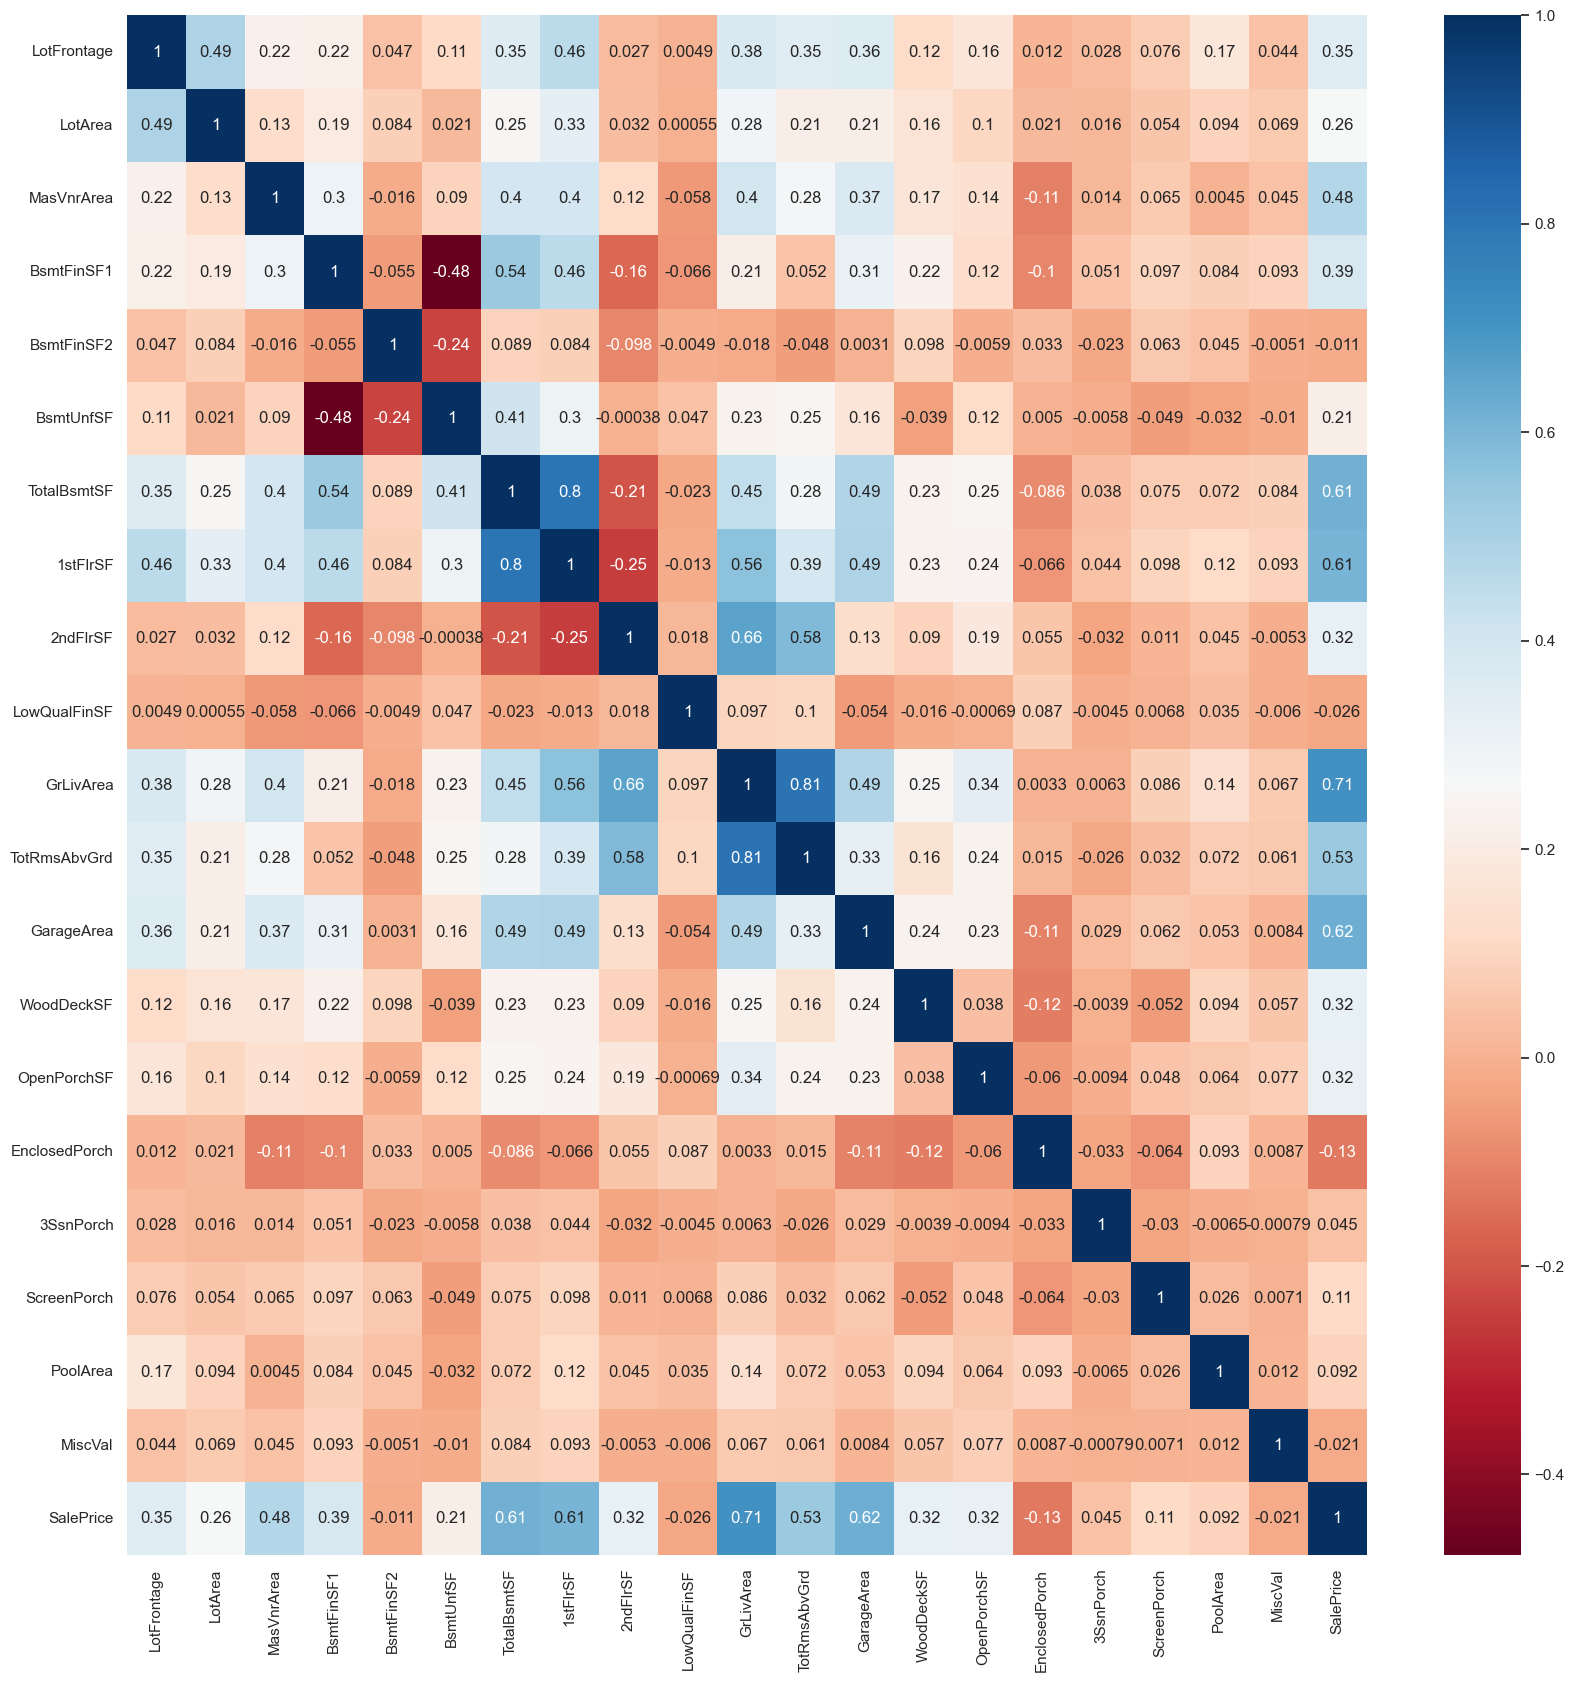

In [104]:
sns.set(rc = {"figure.figsize":(20, 20)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

In [106]:
def high_correlated_cols(dataframe, plot= False, corr_th = 0.90):
    corr = dataframe.corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any (upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        sns.set(rc = {"figure.figsize":(20, 20)})
        sns.heatmap(corr_matrix, cmap="RdBu", annot=True)
        plt.show()
        
    return drop_list

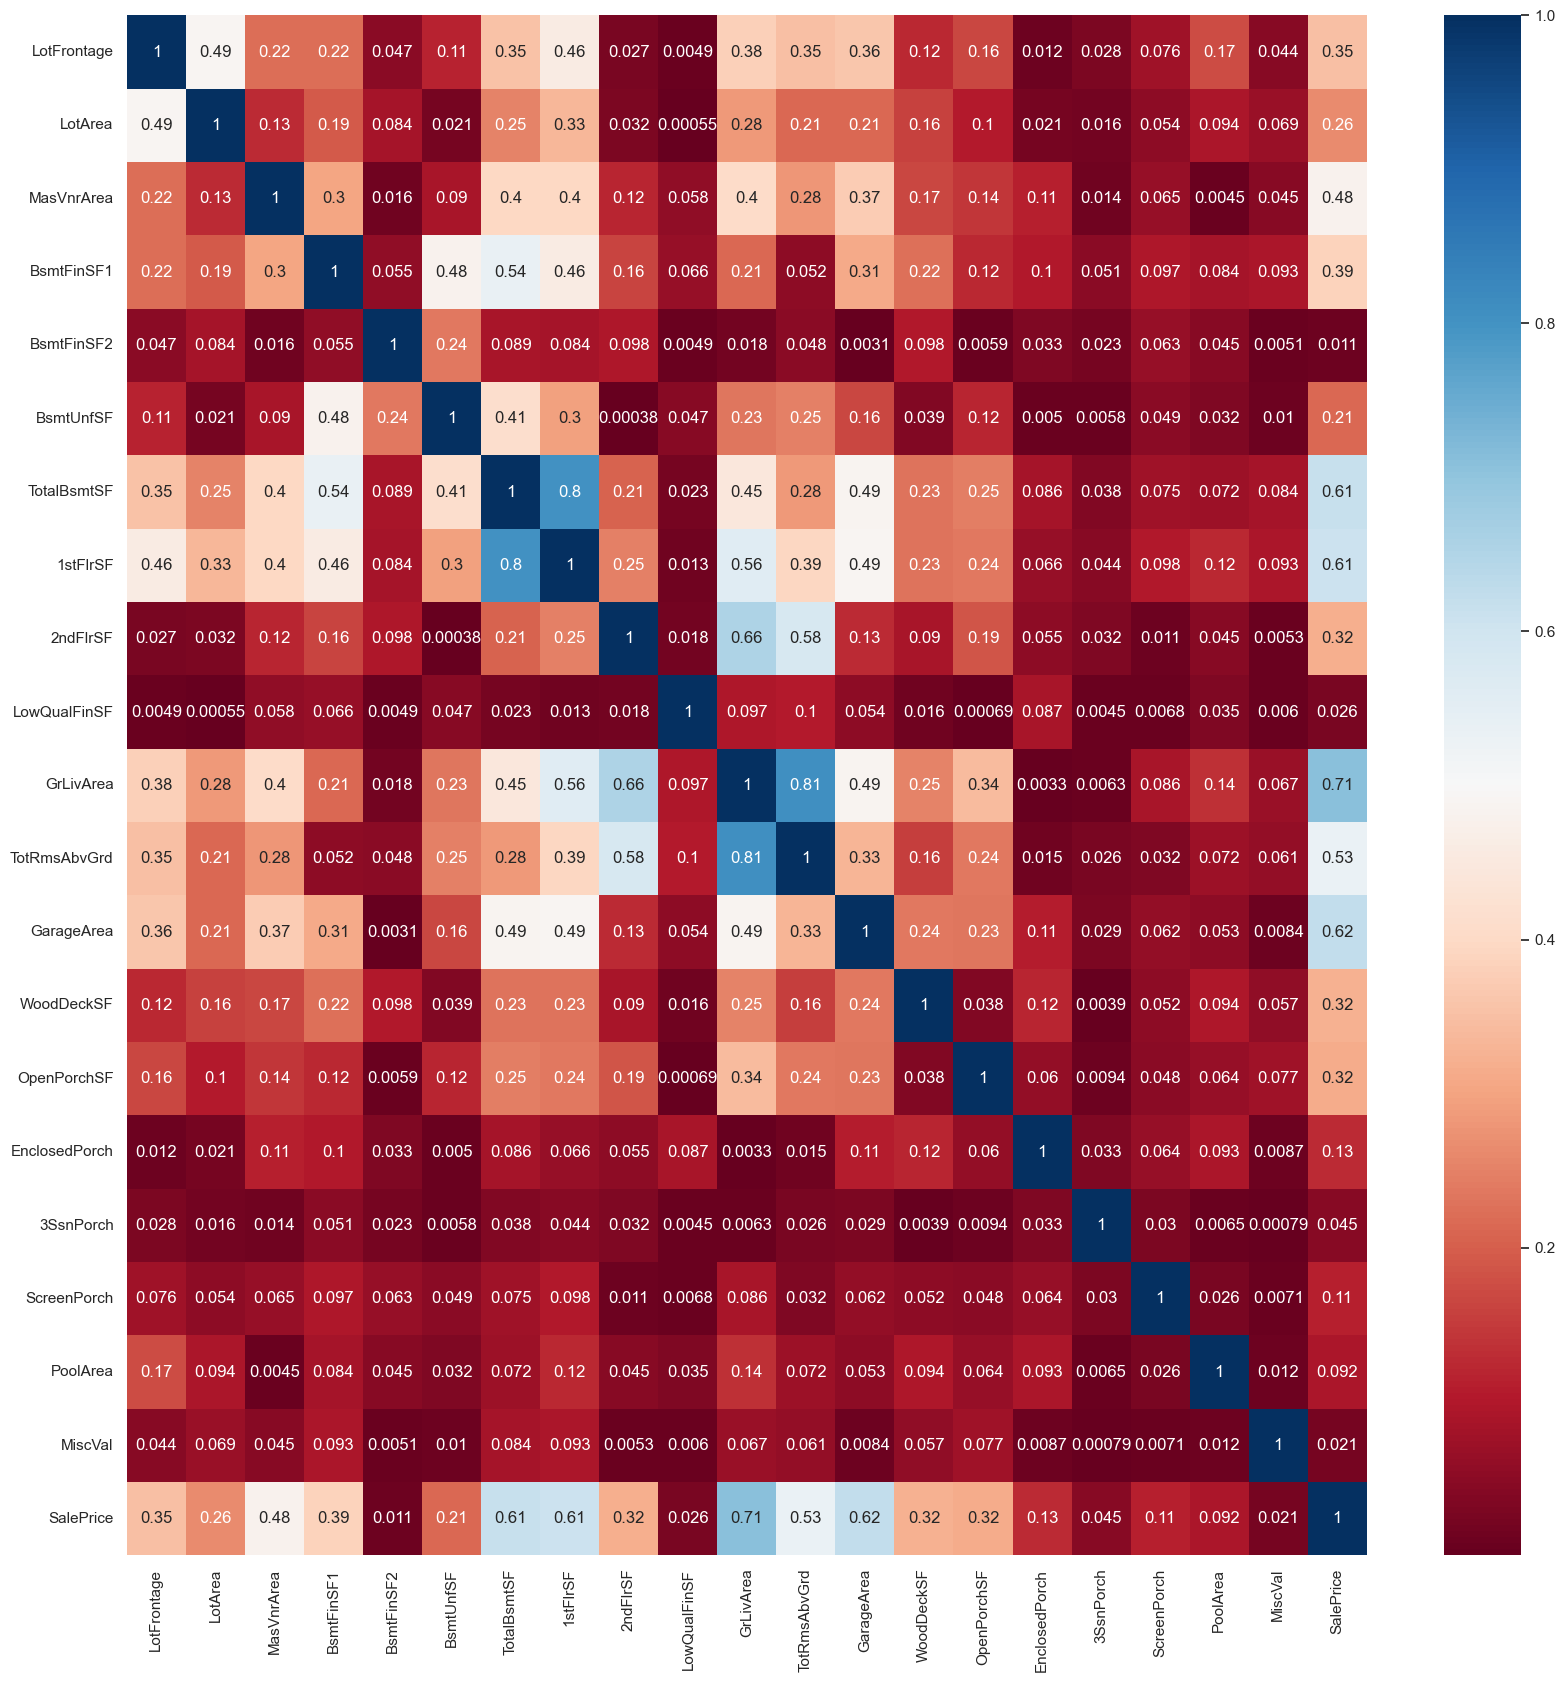

[]

In [110]:
high_correlated_cols(df[num_cols],plot=True)

## 8. Missing Values

In [113]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns

In [115]:
no_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [117]:
for col in no_cols:
    df[col].fillna("No", inplace=True)

/var/folders/c7/1v5wlgds2rjfw4_ldh17bj3h0000gn/T/ipykernel_20704/2725996772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("No", inplace=True)


In [119]:
missing_values_table(df)

              n_miss  ratio
MasVnrType      1766  60.50
SalePrice       1459  49.98
LotFrontage      486  16.65
GarageYrBlt      159   5.45
MasVnrArea        23   0.79
MSZoning           4   0.14
BsmtFullBath       2   0.07
BsmtHalfBath       2   0.07
Functional         2   0.07
Utilities          2   0.07
Exterior2nd        1   0.03
BsmtFinSF1         1   0.03
BsmtFinSF2         1   0.03
BsmtUnfSF          1   0.03
Exterior1st        1   0.03
Electrical         1   0.03
KitchenQual        1   0.03
GarageCars         1   0.03
GarageArea         1   0.03
SaleType           1   0.03
TotalBsmtSF        1   0.03


In [121]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
    temp_target = data[target]
    print("# Before")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)
    
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
    
    data[target] = temp_target
    print("# After \nImputation method is 'MODE' for categorical variables!")
    print("Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    
    return data

In [123]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

# Before
MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64 


# After 
Imputation method is 'MODE' for categorical variables!
Imputation method is 'MEDIAN' for numeric variables! 

MSZoning           0
LotFrontage        0
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Electrical         0
BsmtFullBath       0
BsmtHalfBath       0
KitchenQual        0
Functional         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SaleType        

/var/folders/c7/1v5wlgds2rjfw4_ldh17bj3h0000gn/T/ipykernel_20704/750791399.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)


## 9. Outlier Suppression

In [126]:
def replace_with_thresholds(dataframe,variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low), variable] = low
    dataframe.loc[(dataframe[variable] > up), variable] = up

In [128]:
df[have_outliers].dtypes

LotFrontage      float64
LotArea            int64
BsmtFinSF1       float64
TotalBsmtSF      float64
1stFlrSF           int64
LowQualFinSF       int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
PoolArea           int64
MiscVal            int64
dtype: object

In [130]:
for col in have_outliers:
    if col not in ["SalePrice"]:
        replace_with_thresholds(df, col)

/var/folders/c7/1v5wlgds2rjfw4_ldh17bj3h0000gn/T/ipykernel_20704/3109005092.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-45357.96000000011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low), variable] = low
/var/folders/c7/1v5wlgds2rjfw4_ldh17bj3h0000gn/T/ipykernel_20704/3109005092.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2132.0300000000025' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low), variable] = low
/var/folders/c7/1v5wlgds2rjfw4_ldh17bj3h0000gn/T/ipykernel_20704/3109005092.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-230.76000000000295' has dtype

## 10. Encoding for Base Model

In [133]:
df_base = df.copy()

In [135]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"Count": dataframe[col].value_counts(), "Ratio": dataframe[col].value_counts() / len(dataframe), "Target_mean": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [137]:
rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
          Count     Ratio    Target_mean
MSZoning                                
C (all)      25  0.008565   74528.000000
FV          139  0.047619  214014.061538
RH           26  0.008907  131558.375000
RL         2269  0.777321  191004.994787
RM          460  0.157588  126316.830275


Street : 2
        Count     Ratio    Target_mean
Street                                
Grvl       12  0.004111  130190.500000
Pave     2907  0.995889  181130.538514


Alley : 3
       Count     Ratio    Target_mean
Alley                                
Grvl     120  0.041110  122219.080000
No      2721  0.932169  183452.131483
Pave      78  0.026721  168000.585366


LotShape : 4
          Count     Ratio    Target_mean
LotShape                                
IR1         968  0.331620  206101.665289
IR2          76  0.026036  239833.365854
IR3          16  0.005481  216036.500000
Reg        1859  0.636862  164754.818378


LandContour : 4
             Count     Ratio    Target_mean
LandCo

In [139]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    
    return temp_df

In [141]:
rare_encoder(df_base, 0.01)
df_base

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0   8450.0   Pave    No      Reg   
1        2          20       RL         80.0   9600.0   Pave    No      Reg   
2        3          60       RL         68.0  11250.0   Pave    No      IR1   
3        4          70       RL         60.0   9550.0   Pave    No      IR1   
4        5          60       RL         84.0  14260.0   Pave    No      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0   1936.0   Pave    No      Reg   
1455  2916         160       RM         21.0   1894.0   Pave    No      Reg   
1456  2917          20       RL        160.0  20000.0   Pave    No      Reg   
1457  2918          85       RL         62.0  10441.0   Pave    No      Reg   
1458  2919          60       RL         74.0   9627.0   Pave    No      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0     No     No          No     0.0   
1            Lvl    AllPub  ...        0     No     No          No     0.0   
2            Lvl    AllPub  ...        0     No     No          No     0.0   
3            Lvl    AllPub  ...        0     No     No          No     0.0   
4            Lvl    AllPub  ...        0     No     No          No     0.0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0     No     No          No     0.0   
1455         Lvl    AllPub  ...        0     No     No          No     0.0   
1456         Lvl    AllPub  ...        0     No     No          No     0.0   
1457         Lvl    AllPub  ...        0     No  MnPrv        Shed   700.0   
1458         Lvl    AllPub  ...        0     No     No          No     0.0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal   208500.0  
1         5   2007        WD         Normal   181500.0  
2         9   2008        WD         Normal   223500.0  
3         2   2006        WD        Abnorml   140000.0  
4        12   2008        WD         Normal   250000.0  
...     ...    ...       ...            ...        ...  
1454      6   2006        WD         Normal        NaN  
1455      4   2006        WD        Abnorml        NaN  
1456      9   2006        WD        Abnorml        NaN  
1457      7   2006        WD         Normal        NaN  
1458     11   2006        WD         Normal        NaN  

[2919 rows x 81 columns]

In [143]:
def label_encoder(dataframe,cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [145]:
binary_cols = [col for col in df_base.columns if (df_base[col].dtypes not in ["float64", "int64", "int32"]) & (df_base[col].nunique() == 2)]
binary_cols

['Street', 'Utilities', 'CentralAir']

In [147]:
for col in binary_cols:
    label_encoder(df_base, col)

In [149]:
def one_hot_encoder(dataframe,cols,drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=cols, drop_first=drop_first)
    return dataframe

In [151]:
ohe_cols = [col for col in df_base.columns if (df_base[col].dtype not in ["float64", "int64", "int32"]) & ((df_base[col].nunique() > 2) | (df_base[col].nunique() == 1))]
ohe_cols

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [153]:
df_base = one_hot_encoder(df_base, ohe_cols)

In [155]:
df_base

Id  MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  \
0        1          60         65.0   8450.0       1          0            7   
1        2          20         80.0   9600.0       1          0            6   
2        3          60         68.0  11250.0       1          0            7   
3        4          70         60.0   9550.0       1          0            7   
4        5          60         84.0  14260.0       1          0            8   
...    ...         ...          ...      ...     ...        ...          ...   
1454  2915         160         21.0   1936.0       1          0            4   
1455  2916         160         21.0   1894.0       1          0            4   
1456  2917          20        160.0  20000.0       1          0            5   
1457  2918          85         62.0  10441.0       1          0            5   
1458  2919          60         74.0   9627.0       1          0            7   

      OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
0               5       2003          2003  ...           False   
1               8       1976          1976  ...           False   
2               5       2001          2002  ...           False   
3               5       1915          1970  ...           False   
4               5       2000          2000  ...           False   
...           ...        ...           ...  ...             ...   
1454            7       1970          1970  ...           False   
1455            5       1970          1970  ...           False   
1456            7       1960          1996  ...           False   
1457            5       1992          1992  ...           False   
1458            5       1993          1994  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0              False         False         False         True   
1              False         False         False         True   
2              False         False         False         True   
3              False         False         False         True   
4              False         False         False         True   
...              ...           ...           ...          ...   
1454           False         False         False         True   
1455           False         False         False         True   
1456           False         False         False         True   
1457           False         False         False         True   
1458           False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                     False                 False                 False   
1                     False                 False                 False   
2                     False                 False                 False   
3                     False                 False                 False   
4                     False                 False                 False   
...                     ...                   ...                   ...   
1454                  False                 False                 False   
1455                  False                 False                 False   
1456                  False                 False                 False   
1457                  False                 False                 False   
1458                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
0                     True                  False  
1                     True                  False  
2                     True                  False  
3                    False                  False  
4                     True                  False  
...                    ...                    ...  
1454                  True                  False  
1455                 False                  False  
1456                 False                  False  
1457                  True              

## 11. Scaling for Base Model

In [158]:
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [160]:
date_cols

['MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd']

In [162]:
ss = StandardScaler()
ss_cols = num_cols + date_cols
ss_cols = [col for col in ss_cols if col not in ["SalePrice"]]
df_base[ss_cols] = ss.fit_transform(df_base[ss_cols])

In [164]:
df_base

Id  MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  \
0        1          60    -0.192291 -0.271403       1          0            7   
1        2          20     0.514738 -0.076792       1          0            6   
2        3          60    -0.050885  0.202434       1          0            7   
3        4          70    -0.427967 -0.085253       1          0            7   
4        5          60     0.703279  0.711808       1          0            8   
...    ...         ...          ...       ...     ...        ...          ...   
1454  2915         160    -2.266242 -1.373751       1          0            4   
1455  2916         160    -2.266242 -1.380858       1          0            4   
1456  2917          20     4.285558  1.683174       1          0            5   
1457  2918          85    -0.333696  0.065529       1          0            5   
1458  2919          60     0.231927 -0.072223       1          0            7   

      OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
0               5   1.046258      0.896833  ...           False   
1               8   0.154764     -0.395604  ...           False   
2               5   0.980221      0.848965  ...           False   
3               5  -1.859351     -0.682812  ...           False   
4               5   0.947203      0.753229  ...           False   
...           ...        ...           ...  ...             ...   
1454            7  -0.043346     -0.682812  ...           False   
1455            5  -0.043346     -0.682812  ...           False   
1456            7  -0.373528      0.561757  ...           False   
1457            5   0.683057      0.370284  ...           False   
1458            5   0.716075      0.466021  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0              False         False         False         True   
1              False         False         False         True   
2              False         False         False         True   
3              False         False         False         True   
4              False         False         False         True   
...              ...           ...           ...          ...   
1454           False         False         False         True   
1455           False         False         False         True   
1456           False         False         False         True   
1457           False         False         False         True   
1458           False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                     False                 False                 False   
1                     False                 False                 False   
2                     False                 False                 False   
3                     False                 False                 False   
4                     False                 False                 False   
...                     ...                   ...                   ...   
1454                  False                 False                 False   
1455                  False                 False                 False   
1456                  False                 False                 False   
1457                  False                 False                 False   
1458                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
0                     True                  False  
1                     True                  False  
2                     True                  False  
3                    False                  False  
4                     True                  False  
...                    ...                    ...  
1454                  True                  False  
1455                 False                  False  
1456                 False                  False  
1457                  True  

In [166]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0   8450.0   Pave    No      Reg   
1        2          20       RL         80.0   9600.0   Pave    No      Reg   
2        3          60       RL         68.0  11250.0   Pave    No      IR1   
3        4          70       RL         60.0   9550.0   Pave    No      IR1   
4        5          60       RL         84.0  14260.0   Pave    No      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0   1936.0   Pave    No      Reg   
1455  2916         160       RM         21.0   1894.0   Pave    No      Reg   
1456  2917          20       RL        160.0  20000.0   Pave    No      Reg   
1457  2918          85       RL         62.0  10441.0   Pave    No      Reg   
1458  2919          60       RL         74.0   9627.0   Pave    No      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0     No     No          No     0.0   
1            Lvl    AllPub  ...        0     No     No          No     0.0   
2            Lvl    AllPub  ...        0     No     No          No     0.0   
3            Lvl    AllPub  ...        0     No     No          No     0.0   
4            Lvl    AllPub  ...        0     No     No          No     0.0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0     No     No          No     0.0   
1455         Lvl    AllPub  ...        0     No     No          No     0.0   
1456         Lvl    AllPub  ...        0     No     No          No     0.0   
1457         Lvl    AllPub  ...        0     No  MnPrv        Shed   700.0   
1458         Lvl    AllPub  ...        0     No     No          No     0.0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal   208500.0  
1         5   2007        WD         Normal   181500.0  
2         9   2008        WD         Normal   223500.0  
3         2   2006        WD        Abnorml   140000.0  
4        12   2008        WD         Normal   250000.0  
...     ...    ...       ...            ...        ...  
1454      6   2006        WD         Normal        NaN  
1455      4   2006        WD        Abnorml        NaN  
1456      9   2006        WD        Abnorml        NaN  
1457      7   2006        WD         Normal        NaN  
1458     11   2006        WD         Normal        NaN  

[2919 rows x 81 columns]

## 12. Hold-Out Method (Base Model)

In [184]:
train_df_base = df_base[df_base['SalePrice'].notnull()]
test_df_base = df_base[df_base['SalePrice'].isnull()]

In [186]:
X_base = train_df_base.drop(["Id", "SalePrice"], axis=1)
y_base = train_df_base['SalePrice']  

In [188]:
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y_base, test_size=0.20, random_state=24)

## 13. Modeling 

In [191]:
models = [('Linear Regression', LinearRegression()), ('KNN', KNeighborsRegressor()), ('CART', DecisionTreeRegressor()), ('Random Forest', RandomForestRegressor()), ('GBM', GradientBoostingRegressor()), ("XGBoost", XGBRegressor(objective='reg:squarederror')), ("LightGBM", LGBMRegressor(verbose=-1)),("CatBoost", CatBoostRegressor(verbose=0))]

In [195]:
for name, regressor in models:
    regressor.fit(X_base_train, y_base_train)

## 14. Model Performance Evaluation

In [200]:
for model_name, regressor in models:
    y_base_pred = regressor.predict(X_base_test)
    mae = mean_absolute_error(y_base_test, y_base_pred)
    mse = mean_squared_error(y_base_test, y_base_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_base_test, y_base_pred)
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2: {r2:.4f}")
    print("")

############### Linear Regression ################
  MAE: 19255.8978
  MSE: 1400900169.1055
  RMSE: 37428.6010
  R2: 0.8131

###################### KNN #######################
  MAE: 21863.5432
  MSE: 1506609029.1316
  RMSE: 38815.0619
  R2: 0.7990

###################### CART ######################
  MAE: 22985.1575
  MSE: 995331917.6164
  RMSE: 31548.8814
  R2: 0.8672

################# Random Forest ##################
  MAE: 17607.7165
  MSE: 953490698.3080
  RMSE: 30878.6447
  R2: 0.8728

###################### GBM #######################
  MAE: 16929.2051
  MSE: 731113910.1724
  RMSE: 27039.1181
  R2: 0.9025

#################### XGBoost #####################
  MAE: 18624.5033
  MSE: 1418704281.0442
  RMSE: 37665.6910
  R2: 0.8107

#################### LightGBM ####################
  MAE: 16977.8571
  MSE: 876522998.2816
  RMSE: 29606.1311
  R2: 0.8831

#################### CatBoost ####################
  MAE: 15175.6304
  MSE: 738394259.0690
  RMSE: 27173.4109
  R2: 0.9015



## 15. Feature Extraction

In [208]:
df.loc[(df["HouseStyle"] == "1Story") | (df["HouseStyle"] == "2Story"),"New_HouseStyle"] = "1or2Story"

In [210]:
df["New_HouseStyle"] = df["New_HouseStyle"].apply(lambda x: "1or2Story" if x == "1or2Story" else "other")

In [212]:
df["New_HouseStyle"].value_counts()

New_HouseStyle
1or2Story    2343
other         576
Name: count, dtype: int64

In [214]:
df["New_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]

In [216]:
df["New_1st*GrLiv"].head()

0    1463760.0
1    1592644.0
2    1643120.0
3    1650037.0
4    2516710.0
Name: New_1st*GrLiv, dtype: float64

In [218]:
df["New_Garage*GrLiv"] = df["GarageArea"] * df["GrLivArea"]

In [220]:
df["New_Garage*GrLiv"].head()

0     937080.0
1     580520.0
2    1085888.0
3    1102314.0
4    1837528.0
Name: New_Garage*GrLiv, dtype: float64

In [222]:
df["New_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

In [224]:
df["New_TotalFlrSF"].head()

0    1710.0
1    1262.0
2    1786.0
3    1717.0
4    2198.0
Name: New_TotalFlrSF, dtype: float64

In [226]:
df["New_TotalBsmtFin"] = df["BsmtFinSF1"] + df["BsmtFinSF2"]

In [228]:
df["New_TotalBsmtFin"].head()

0    706.0
1    978.0
2    486.0
3    216.0
4    655.0
Name: New_TotalBsmtFin, dtype: float64

In [230]:
df["New_TotalSqFeet"] = df["GrLivArea"] + df["TotalBsmtSF"]

In [232]:
df["New_TotalSqFeet"].head()

0    2566.0
1    2524.0
2    2706.0
3    2473.0
4    3343.0
Name: New_TotalSqFeet, dtype: float64

In [234]:
df["New_Restoration"] = df["YearRemodAdd"] - df["YearBuilt"]

In [236]:
df["New_Restoration"].head()

0     0
1     0
2     1
3    55
4     0
Name: New_Restoration, dtype: int32

In [238]:
df["New_HouseAge"] = df["YrSold"] - df["YearBuilt"]

In [240]:
df["New_HouseAge"].head()

0     5
1    31
2     7
3    91
4     8
Name: New_HouseAge, dtype: int32

In [242]:
df["New_RestorationAge"] = df["YrSold"] - df["YearRemodAdd"]

In [244]:
df["New_RestorationAge"].head()

0     5
1    31
2     6
3    36
4     8
Name: New_RestorationAge, dtype: int32

In [246]:
df["New_GarageAge"] = df["GarageYrBlt"] - df["YearBuilt"]

In [248]:
df["New_GarageAge"].head()

0     0.0
1     0.0
2     0.0
3    83.0
4     0.0
Name: New_GarageAge, dtype: float64

In [250]:
df["New_GarageRestorationAge"] = np.abs(df["GarageYrBlt"] - df["YearRemodAdd"])

In [252]:
df["New_GarageRestorationAge"].head()

0     0.0
1     0.0
2     1.0
3    28.0
4     0.0
Name: New_GarageRestorationAge, dtype: float64

In [254]:
df["New_GarageSold"] = df["YrSold"] - df["GarageYrBlt"]

In [256]:
df["New_GarageSold"].head()

0     5.0
1    31.0
2     7.0
3     8.0
4     8.0
Name: New_GarageSold, dtype: float64

In [258]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0   8450.0   Pave    No      Reg   
1   2          20       RL         80.0   9600.0   Pave    No      Reg   
2   3          60       RL         68.0  11250.0   Pave    No      IR1   
3   4          70       RL         60.0   9550.0   Pave    No      IR1   
4   5          60       RL         84.0  14260.0   Pave    No      IR1   

  LandContour Utilities  ... New_Garage*GrLiv New_TotalFlrSF New_TotalBsmtFin  \
0         Lvl    AllPub  ...         937080.0         1710.0            706.0   
1         Lvl    AllPub  ...         580520.0         1262.0            978.0   
2         Lvl    AllPub  ...        1085888.0         1786.0            486.0   
3         Lvl    AllPub  ...        1102314.0         1717.0            216.0   
4         Lvl    AllPub  ...        1837528.0         2198.0            655.0   

  New_TotalSqFeet New_Restoration New_HouseAge New_RestorationAge  \
0          2566.0               0            5                  5   
1          2524.0               0           31                 31   
2          2706.0               1            7                  6   
3          2473.0              55           91                 36   
4          3343.0               0            8                  8   

   New_GarageAge  New_GarageRestorationAge  New_GarageSold  
0            0.0                       0.0             5.0  
1            0.0                       0.0            31.0  
2            0.0                       1.0             7.0  
3           83.0                      28.0             8.0  
4            0.0                       0.0             8.0  

[5 rows x 93 columns]

## 16. Encoding for Current and New Features

In [263]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"Count": dataframe[col].value_counts(), "Ratio": dataframe[col].value_counts() / len(dataframe), "Target_Mean": dataframe.groupby(col)[target].mean()}), end="\n")

In [265]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O' and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
   
    return temp_df

In [267]:
rare_encoder(df, 0.01)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0   8450.0   Pave    No      Reg   
1   2          20       RL         80.0   9600.0   Pave    No      Reg   
2   3          60       RL         68.0  11250.0   Pave    No      IR1   
3   4          70       RL         60.0   9550.0   Pave    No      IR1   
4   5          60       RL         84.0  14260.0   Pave    No      IR1   

  LandContour Utilities  ... New_Garage*GrLiv New_TotalFlrSF New_TotalBsmtFin  \
0         Lvl    AllPub  ...         937080.0         1710.0            706.0   
1         Lvl    AllPub  ...         580520.0         1262.0            978.0   
2         Lvl    AllPub  ...        1085888.0         1786.0            486.0   
3         Lvl    AllPub  ...        1102314.0         1717.0            216.0   
4         Lvl    AllPub  ...        1837528.0         2198.0            655.0   

  New_TotalSqFeet New_Restoration New_HouseAge New_RestorationAge  \
0          2566.0               0            5                  5   
1          2524.0               0           31                 31   
2          2706.0               1            7                  6   
3          2473.0              55           91                 36   
4          3343.0               0            8                  8   

   New_GarageAge  New_GarageRestorationAge  New_GarageSold  
0            0.0                       0.0             5.0  
1            0.0                       0.0            31.0  
2            0.0                       1.0             7.0  
3           83.0                      28.0             8.0  
4            0.0                       0.0             8.0  

[5 rows x 93 columns]

In [269]:
def label_encoder(dataframe,cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [271]:
binary_cols = [col for col in df.columns if (df[col].dtypes not in ["float64", "int64", "int32"]) & (df[col].nunique() == 2)]
binary_cols

['Street', 'Utilities', 'CentralAir', 'New_HouseStyle']

In [273]:
for col in binary_cols:
    label_encoder(df,col)

In [275]:
def one_hot_encoder(dataframe,cols,drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=cols, drop_first=drop_first)
    return dataframe

In [277]:
ohe_cols = [col for col in df.columns if (df[col].dtype not in ["float64", "int64", "int32"]) & ((df[col].nunique() > 2) | (df[col].nunique() == 1))]
ohe_cols

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [279]:
df = one_hot_encoder(df, ohe_cols)

In [281]:
df

Id  MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  \
0        1          60         65.0   8450.0       1          0            7   
1        2          20         80.0   9600.0       1          0            6   
2        3          60         68.0  11250.0       1          0            7   
3        4          70         60.0   9550.0       1          0            7   
4        5          60         84.0  14260.0       1          0            8   
...    ...         ...          ...      ...     ...        ...          ...   
1454  2915         160         21.0   1936.0       1          0            4   
1455  2916         160         21.0   1894.0       1          0            4   
1456  2917          20        160.0  20000.0       1          0            5   
1457  2918          85         62.0  10441.0       1          0            5   
1458  2919          60         74.0   9627.0       1          0            7   

      OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
0               5       2003          2003  ...           False   
1               8       1976          1976  ...           False   
2               5       2001          2002  ...           False   
3               5       1915          1970  ...           False   
4               5       2000          2000  ...           False   
...           ...        ...           ...  ...             ...   
1454            7       1970          1970  ...           False   
1455            5       1970          1970  ...           False   
1456            7       1960          1996  ...           False   
1457            5       1992          1992  ...           False   
1458            5       1993          1994  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0              False         False         False         True   
1              False         False         False         True   
2              False         False         False         True   
3              False         False         False         True   
4              False         False         False         True   
...              ...           ...           ...          ...   
1454           False         False         False         True   
1455           False         False         False         True   
1456           False         False         False         True   
1457           False         False         False         True   
1458           False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                     False                 False                 False   
1                     False                 False                 False   
2                     False                 False                 False   
3                     False                 False                 False   
4                     False                 False                 False   
...                     ...                   ...                   ...   
1454                  False                 False                 False   
1455                  False                 False                 False   
1456                  False                 False                 False   
1457                  False                 False                 False   
1458                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
0                     True                  False  
1                     True                  False  
2                     True                  False  
3                    False                  False  
4                     True                  False  
...                    ...                    ...  
1454                  True                  False  
1455                 False                  False  
1456                 False                  False  
1457                  True              

## 17. Feature Scalling

In [283]:
ss = StandardScaler()
ss_cols = num_cols + date_cols
ss_cols = [col for col in ss_cols if col not in ["SalePrice"]]
df[ss_cols] = ss.fit_transform(df[ss_cols])

In [285]:
df

Id  MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  \
0        1          60    -0.192291 -0.271403       1          0            7   
1        2          20     0.514738 -0.076792       1          0            6   
2        3          60    -0.050885  0.202434       1          0            7   
3        4          70    -0.427967 -0.085253       1          0            7   
4        5          60     0.703279  0.711808       1          0            8   
...    ...         ...          ...       ...     ...        ...          ...   
1454  2915         160    -2.266242 -1.373751       1          0            4   
1455  2916         160    -2.266242 -1.380858       1          0            4   
1456  2917          20     4.285558  1.683174       1          0            5   
1457  2918          85    -0.333696  0.065529       1          0            5   
1458  2919          60     0.231927 -0.072223       1          0            7   

      OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
0               5   1.046258      0.896833  ...           False   
1               8   0.154764     -0.395604  ...           False   
2               5   0.980221      0.848965  ...           False   
3               5  -1.859351     -0.682812  ...           False   
4               5   0.947203      0.753229  ...           False   
...           ...        ...           ...  ...             ...   
1454            7  -0.043346     -0.682812  ...           False   
1455            5  -0.043346     -0.682812  ...           False   
1456            7  -0.373528      0.561757  ...           False   
1457            5   0.683057      0.370284  ...           False   
1458            5   0.716075      0.466021  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0              False         False         False         True   
1              False         False         False         True   
2              False         False         False         True   
3              False         False         False         True   
4              False         False         False         True   
...              ...           ...           ...          ...   
1454           False         False         False         True   
1455           False         False         False         True   
1456           False         False         False         True   
1457           False         False         False         True   
1458           False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                     False                 False                 False   
1                     False                 False                 False   
2                     False                 False                 False   
3                     False                 False                 False   
4                     False                 False                 False   
...                     ...                   ...                   ...   
1454                  False                 False                 False   
1455                  False                 False                 False   
1456                  False                 False                 False   
1457                  False                 False                 False   
1458                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
0                     True                  False  
1                     True                  False  
2                     True                  False  
3                    False                  False  
4                     True                  False  
...                    ...                    ...  
1454                  True                  False  
1455                 False                  False  
1456                 False                  False  
1457                  True  

## 18. Hold-Out Method

In [287]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

In [289]:
X = train_df.drop(["Id", "SalePrice"], axis=1)
y = train_df['SalePrice'] 

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

## 19. Modeling

In [293]:
models = [('Linear Regression', LinearRegression()), ('KNN', KNeighborsRegressor()), ('CART', DecisionTreeRegressor()), ('Random Forest', RandomForestRegressor()), ('GBM', GradientBoostingRegressor()), ("XGBoost", XGBRegressor(objective='reg:squarederror')), ("LightGBM", LGBMRegressor(verbose=-1)), ("CatBoost", CatBoostRegressor(verbose=0))]

In [300]:
for name, regressor in models:
    regressor.fit(X_train, y_train)

## 20. Model Performance Evalution

In [313]:
for model_name, regressor in models:
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}")

############### Linear Regression ################
MAE: 337514355.1918
MSE: 16629824433812078592.0000
RMSE: 4077968174.6934
R2: -2218442238.4195
###################### KNN #######################
MAE: 30798.5055
MSE: 2125271491.8192
RMSE: 46100.6669
R2: 0.7165
###################### CART ######################
MAE: 27857.0377
MSE: 3476162204.7021
RMSE: 58958.9875
R2: 0.5363
################# Random Forest ##################
MAE: 16847.3811
MSE: 935656771.2670
RMSE: 30588.5072
R2: 0.8752
###################### GBM #######################
MAE: 15432.7962
MSE: 626780495.0743
RMSE: 25035.5846
R2: 0.9164
#################### XGBoost #####################
MAE: 16929.6173
MSE: 756370641.9971
RMSE: 27502.1934
R2: 0.8991
#################### LightGBM ####################
MAE: 16021.2542
MSE: 844692161.5322
RMSE: 29063.5882
R2: 0.8873
#################### CatBoost ####################
MAE: 14760.9929
MSE: 831146563.3821
RMSE: 28829.6126
R2: 0.8891


## 21. Cross Validation

In [316]:
for model_name, regressor in models:
    scoring = {'mae': 'neg_mean_absolute_error', 'mse': 'neg_mean_squared_error', 'r2': 'r2'}
    cv_results = cross_validate(regressor,X,y,cv=5,scoring=scoring)
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print("AVG MAE: ", -cv_results['test_mae'].mean())
    print("AVG MSE: ", -cv_results['test_mse'].mean())
    print("AVG R2: ", cv_results['test_r2'].mean(),end="\n\n")

############### Linear Regression ################
AVG MAE:  91701230.49626309
AVG MSE:  1.1345364616883524e+19
AVG R2:  -1692897831.6749294

###################### KNN #######################
AVG MAE:  31552.781506849315
AVG MSE:  2256100901.9062195
AVG R2:  0.6390490007381662

###################### CART ######################
AVG MAE:  25198.17739726027
AVG MSE:  1541091940.2445207
AVG R2:  0.7529557172089876

################# Random Forest ##################
AVG MAE:  17198.214773972602
AVG MSE:  888553826.3554608
AVG R2:  0.8605013565610589

###################### GBM #######################
AVG MAE:  15885.796311056823
AVG MSE:  675918387.8934695
AVG R2:  0.8928485580767322

#################### XGBoost #####################
AVG MAE:  16949.98656892123
AVG MSE:  789795547.4369491
AVG R2:  0.8765104109025387

#################### LightGBM ####################
AVG MAE:  16276.232933540485
AVG MSE:  812977332.2533666
AVG R2:  0.8728556891959431

#################### CatBoost ######

## 22. Hyper-parameter Tuning

In [324]:
for model_name, regressor in models:
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print(f"parameters: {regressor.get_params()}", end="\n\n")

############### Linear Regression ################
parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

###################### KNN #######################
parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

###################### CART ######################
parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

################# Random Forest ##################
parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'm

## 23. Best Parameters

In [329]:
model_params = [
    ('Linear Regression', LinearRegression(), {
        'fit_intercept': [True, False]
    }),
    ('KNN', KNeighborsRegressor(), {
        'n_neighbors': range(3,11),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    ('CART', DecisionTreeRegressor(), {
        'criterion': ['mse', 'friedman_mse', 'mae'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': range(2,10)
    }),
    ('Random Forest', RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    ('GBM', GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 5, 7]
    }),
    ('XGBoost', XGBRegressor(objective='reg:squarederror'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 5, 7]
    }),
    ('LightGBM', LGBMRegressor(verbose=-1), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100],
        'boosting_type': ['gbdt', 'dart']
    }),
    ('CatBoost', CatBoostRegressor(verbose=0), {
        'iterations': [200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    })
]

In [331]:
best_model_name = None
best_model = None
best_score = float('-inf')
best_params = None

for model_name, regressor, params in model_params:
    regressor_grid = GridSearchCV(regressor, params, cv=5, n_jobs=-1, verbose=True)
    regressor_grid.fit(X, y)
    
    print(f"{'#' * 10} {model_name} {'#' * 10}".center(50, '#'))
    print("Best Parameters:", regressor_grid.best_params_)
    print("Best Score:", regressor_grid.best_score_, end="\n\n")
    print(f"{'#' * 10}".center(50, '#'))
    
    if regressor_grid.best_score_ > best_score:
        best_model_name = model_name
        best_model = regressor_grid.best_estimator_
        best_score = regressor_grid.best_score_
        best_params = regressor_grid.best_params_
        
print(f"{'#' * 10} Model: {best_model_name} {'#' * 10}".center(50, '#'))
print(f"{'#' * 10} Best Parameters: {best_params} {'#' * 10}".center(50, '#'))
print(f"{'#' * 10} Best Score: {best_score} {'#' * 10}".center(50, '#'))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
############### Linear Regression ################
Best Parameters: {'fit_intercept': False}
Best Score: -303769.68208835897

##################################################
Fitting 5 folds for each of 64 candidates, totalling 320 fits
###################### KNN #######################
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Best Score: 0.6710557726479391

##################################################
Fitting 5 folds for each of 192 candidates, totalling 960 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
640 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
88 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pa

###################### CART ######################
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 20, 'min_samples_split': 9, 'splitter': 'best'}
Best Score: 0.7813069417341973

##################################################
Fitting 5 folds for each of 27 candidates, totalling 135 fits
################# Random Forest ##################
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8631340992465926

##################################################
Fitting 5 folds for each of 54 candidates, totalling 270 fits
###################### GBM #######################
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Score: 0.8980121259887305

##################################################
Fitting 5 folds for each of 54 candidates, totalling 270 fits
#################### XGBoost #####################
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 's

In [333]:
best_model

GradientBoostingRegressor(n_estimators=200)

In [335]:
def ensure_params_are_lists(params):
    for key, value in params.items():
        if not isinstance(value, list):
            params[key] = [value]
    return params

best_params = ensure_params_are_lists(best_params)

regressor_best_grid = GridSearchCV(best_model, best_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [337]:
regressor_best_grid

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(n_estimators=200),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3],
                         'n_estimators': [200], 'subsample': [1.0]},
             verbose=True)

## 24. Final Model 

In [341]:
final_model = GradientBoostingRegressor(**regressor_best_grid.best_params_).fit(X, y)

In [342]:
scoring = {'mae': 'neg_mean_absolute_error', 'mse': 'neg_mean_squared_error', 'r2': 'r2'}
cv_results_final = cross_validate(final_model, X, y, cv=5, scoring=scoring)
print(f"{'#' * 10} {best_model_name} {'#' * 10}".center(50, '#'))
print("Average MAE: ", -cv_results['test_mae'].mean())
print("Average MSE: ", -cv_results['test_mse'].mean())
print("Average R2: ", cv_results['test_r2'].mean(),end="\n\n")

###################### GBM #######################
Average MAE:  14293.848542179676
Average MSE:  639508091.4087696
Average R2:  0.9004059815461278



## 25. Feature Importance 

In [346]:
def plot_importance(model, features, start = 0 ,num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False)[start:num])
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[start:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

        Value               Feature
44   0.334962       New_TotalSqFeet
5    0.311435           OverallQual
41   0.100604      New_Garage*GrLiv
40   0.041919         New_1st*GrLiv
16   0.029904              2ndFlrSF
46   0.018844          New_HouseAge
10   0.017650            BsmtFinSF1
28   0.013401            GarageCars
7    0.011619             YearBuilt
2    0.009455               LotArea
42   0.006918        New_TotalFlrSF
6    0.006736           OverallCond
47   0.006517    New_RestorationAge
8    0.006303          YearRemodAdd
43   0.006191      New_TotalBsmtFin
26   0.005983            Fireplaces
221  0.004524        FireplaceQu_No
27   0.003765           GarageYrBlt
212  0.003729        KitchenQual_TA
24   0.003392          KitchenAbvGr
18   0.003038             GrLivArea
224  0.002927     GarageType_Attchd
182  0.002887       BsmtExposure_Gd
29   0.002703            GarageArea
53   0.002572           MSZoning_RL
12   0.002426             BsmtUnfSF
14   0.002352            Cen

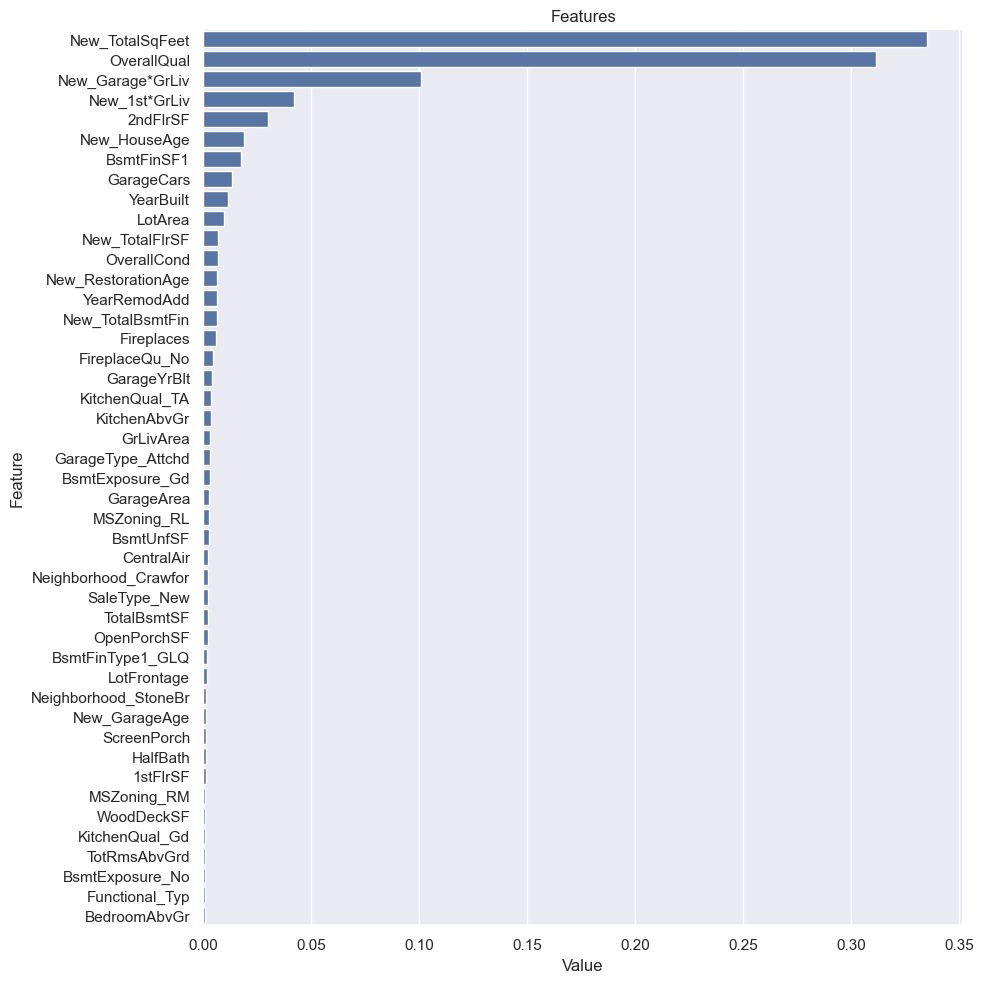

In [348]:
plot_importance(final_model, X,start=0, num=45)

## 26. Prediction

In [351]:
predictions = final_model.predict(test_df.drop(["Id", "SalePrice"], axis=1))

In [353]:
submission = pd.DataFrame({
    'Id': test_df["Id"],
    'SalePrice': predictions
})

In [355]:
submission.to_csv('submission.csv', index=False)

In [357]:
submission

Id      SalePrice
0     1461  127329.418997
1     1462  157764.618836
2     1463  185207.513311
3     1464  187738.109270
4     1465  182789.782581
...    ...            ...
1454  2915   80201.441960
1455  2916   80068.162231
1456  2917  171225.985299
1457  2918  116632.450741
1458  2919  224643.068855

[1459 rows x 2 columns]